# Import Libraries + Environment Setup

In [2]:
import pandas as pd
import numpy as np
from functools import reduce
import re
import seaborn as sns
import matplotlib.pyplot as plt

#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#sklearn modules for Model Selection:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

#sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


#Standard libraries for data visualization:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Rookie Player Data 2007-2019

| Stat Type  | Description                                                     |
|------------|-----------------------------------------------------------------|
| Tm         | NFL team selecting player
|Round       | Round Selected in Draft (1-7)                                   |
| Pick       | Overall Selection in Draft                                      |
| Position   | Position on the field                                           |
| Age        | Age                                                             |
| AP1        | First-team all-pro selections                                   |
| PB         | Pro Bowl Selections                                             |
| St         | Number of years as primary starter for his team at his position |
| CarAV      | Weighted Career Approximate Value  (See Description Below)      |
| DrAV       | AV accumulated for team that drafted this player                |
| G          | Games Played                                                    |
| Cmp        | Passes Completed                                                |
| Att (Pass) | Passes Attempted                                                |
| Yds (Pass) | Yards Gained by Passing                                         |
| TD (Pass)  | Passing Touchdowns                                              |
| Int        | Interceptions thrown                                            |
| Att (Rush) | Rushing attempts 
| Yds (Rush) | Rushing yards 
| TD (Rush)  | Rushing touchdowns
| Rec        | Receptions (Catches)                                            |
| Yds (Rec)  | Receiving Yards                                                 |
| TD (Rec)   | Receiving Touchdowns                                            |
| Solo       | Tackles                                                         |
| Int (Def)  | Defensive Interceptions                                         |
| Sacks      | When a defender tackles the opposition quarterback                     

🏈  Import CSVs

In [4]:
college_drafted_2019 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2019.csv", header = 1)
college_drafted_2018 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2018.csv", header = 1)
college_drafted_2017 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2017.csv", header = 1)
college_drafted_2016 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2016.csv", header = 1)
college_drafted_2015 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2015.csv", header = 1)
college_drafted_2014 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2014.csv", header = 1)
college_drafted_2013 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2013.csv", header = 1)
college_drafted_2012 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2012.csv", header = 1)
college_drafted_2011 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2011.csv", header = 1)
college_drafted_2010 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2010.csv", header = 1)
college_drafted_2009 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2009.csv", header = 1)
college_drafted_2008 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2008.csv", header = 1)
college_drafted_2007 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2007.csv", header = 1)
college_drafted_2006 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2006.csv", header = 1)
college_drafted_2005 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2005.csv", header = 1)

🏈  Clean and Sort

In [5]:
list_college_drafted = [college_drafted_2019, college_drafted_2018, college_drafted_2017, college_drafted_2016, college_drafted_2015, college_drafted_2014, college_drafted_2013, college_drafted_2012, college_drafted_2011, college_drafted_2010, college_drafted_2009, college_drafted_2008, college_drafted_2007,college_drafted_2006,college_drafted_2005]
year_column = [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005]
j = 0

for i in list_college_drafted:
  i["Year"] = year_column[j]
  i['Player'] = i['Player'].map(lambda x: re.sub(r'([^\\]+$)', '', x))
  i['Player'] = i['Player'].map(lambda x: re.sub(r'\\', '', x))
  i.drop(columns = ["To","Unnamed: 28"], inplace = True)
  i.columns = ['Rnd', 'Pick', 'Team', 'Player', 'Pos', 'Age', 'AP1', 'PB', 'St',
        'CarAV', 'DrAV', 'G', 'Cmp', 'Att (Pass)', 'Yds (Pass)', 'TD (Pass)', 'Int', 'Att (Rush)',
        'Yds (Rush)', 'TD (Rush)', 'Rec', 'Yds (Rec)', 'TD (Rec)', 'Solo', 'Int (Def)', 'Sacks',
        'College/Univ', 'Year']
  j +=1      
  
college_drafted_final = pd.concat(list_college_drafted)


🏈 Concatinate College DataFrames

In [6]:
college_drafted_final = pd.concat(list_college_drafted)
college_drafted_final

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year
0,1,1,ARI,Kyler Murray,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2019
1,1,2,SFO,Nick Bosa,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,2019
2,1,3,NYJ,Quinnen Williams,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,2019
3,1,4,OAK,Clelin Ferrell,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,2019
4,1,5,TAM,Devin White,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,LSU,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,7,251,STL,Madison Hedgecock,FB,24.0,0,0,4,2.0,1.0,84.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,37.0,233.0,2.0,20.0,NaN,NaN,North Carolina,2005
251,7,252,PHI,,LB,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stanford,2005
252,7,253,TAM,,WR,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,2005
253,7,254,SEA,Doug Nienhuis,T,23.0,0,0,0,0.0,NaN,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Oregon St.,2005


🏈 Drop Empty Name Entries

In [7]:
college_drafted_final = college_drafted_final[college_drafted_final.Player != '']
college_drafted_final

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year
0,1,1,ARI,Kyler Murray,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2019
1,1,2,SFO,Nick Bosa,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,2019
2,1,3,NYJ,Quinnen Williams,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,2019
3,1,4,OAK,Clelin Ferrell,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,2019
4,1,5,TAM,Devin White,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,LSU,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,7,248,SFO,Patrick Estes,TE,22.0,0,0,0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Virginia,2005
248,7,249,SFO,Billy Bajema,TE,22.0,0,0,4,2.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,416.0,2.0,11.0,NaN,NaN,Oklahoma St.,2005
249,7,250,STL,Ryan Fitzpatrick,QB,22.0,0,0,10,79.0,1.0,165.0,3069.0,5054.0,34977.0,223.0,169.0,574.0,2621.0,21.0,3.0,-3.0,0.0,NaN,NaN,NaN,Harvard,2005
250,7,251,STL,Madison Hedgecock,FB,24.0,0,0,4,2.0,1.0,84.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,37.0,233.0,2.0,20.0,NaN,NaN,North Carolina,2005


🏈 Filter for Years Between 07-15

In [8]:
college_drafted_final = college_drafted_final[college_drafted_final['Year'] > 2006]
college_drafted_final

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year
0,1,1,ARI,Kyler Murray,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2019
1,1,2,SFO,Nick Bosa,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,2019
2,1,3,NYJ,Quinnen Williams,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,2019
3,1,4,OAK,Clelin Ferrell,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,2019
4,1,5,TAM,Devin White,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,LSU,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,7,250,NYG,Ahmad Bradshaw,RB,21.0,0,0,3,42.0,36.0,103.0,0.0,0.0,0.0,0.0,0.0,1083.0,4928.0,36.0,187.0,1493.0,12.0,18.0,NaN,NaN,Marshall,2007
250,7,251,JAX,Chad Nkang,LB,22.0,0,0,0,1.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,NaN,NaN,Elon,2007
252,7,253,CIN,Nedu Ndukwe,DB,22.0,0,0,2,14.0,14.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,7.0,7.5,Notre Dame,2007
253,7,254,OAK,Jonathan Holland,WR,22.0,0,0,0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,NaN,NaN,Louisiana Tech,2007


🏈  Rename Positions to Match Madden

In [9]:
pos_dict = {"RB":"HB"}
college_drafted_final.replace({"Pos": pos_dict}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


🏈 Create Unique Player Position Key for Later Use

In [10]:
college_drafted_final["Name ID Position"] =  college_drafted_final[['Player','Pos']].apply(lambda x: " ".join(x), axis=1)
college_drafted_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position
0,1,1,ARI,Kyler Murray,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2019,Kyler Murray QB
1,1,2,SFO,Nick Bosa,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,2019,Nick Bosa DE
2,1,3,NYJ,Quinnen Williams,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,2019,Quinnen Williams DT
3,1,4,OAK,Clelin Ferrell,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,2019,Clelin Ferrell DE
4,1,5,TAM,Devin White,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,LSU,2019,Devin White LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,7,250,NYG,Ahmad Bradshaw,HB,21.0,0,0,3,42.0,36.0,103.0,0.0,0.0,0.0,0.0,0.0,1083.0,4928.0,36.0,187.0,1493.0,12.0,18.0,NaN,NaN,Marshall,2007,Ahmad Bradshaw HB
250,7,251,JAX,Chad Nkang,LB,22.0,0,0,0,1.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,NaN,NaN,Elon,2007,Chad Nkang LB
252,7,253,CIN,Nedu Ndukwe,DB,22.0,0,0,2,14.0,14.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,7.0,7.5,Notre Dame,2007,Nedu Ndukwe DB
253,7,254,OAK,Jonathan Holland,WR,22.0,0,0,0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,NaN,NaN,Louisiana Tech,2007,Jonathan Holland WR


# NFL Combine Player Data 2007-2019

🏈 Import CSVS, Conccat, Filter for Appropriate Period (2007-2019)

In [11]:
nfl_combine_87_18 = pd.read_csv("/content/drive/MyDrive/Final Project /Combine Results + University Attended/NFL-Combine-Data-1987-to-2018.csv")
nfl_combine_87_18.drop(columns = ["Unnamed: 16", "Unnamed: 17", "Unnamed: 18"], inplace = True)
nfl_combine_87_18.columns

Index(['Year', 'Name', 'College', 'POS', 'Height (in)', 'Weight (lbs)',
       'Hand Size (in)', 'Arm Length (in)', 'Wonderlic', '40 Yard',
       'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone',
       '60Yd Shuttle'],
      dtype='object')

In [12]:
nfl_combine_19 = pd.read_csv("/content/drive/MyDrive/Final Project /Combine Results + University Attended/2019_nfl_combine_results.csv")
nfl_combine_19.columns = nfl_combine_87_18.columns

In [13]:
nfl_combine_final = pd.concat([nfl_combine_19, nfl_combine_87_18]) 
nfl_combine_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10504 entries, 0 to 10228
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             10502 non-null  float64
 1   Name             10502 non-null  object 
 2   College          10502 non-null  object 
 3   POS              10502 non-null  object 
 4   Height (in)      10502 non-null  float64
 5   Weight (lbs)     10502 non-null  float64
 6   Hand Size (in)   8895 non-null   float64
 7   Arm Length (in)  8577 non-null   float64
 8   Wonderlic        431 non-null    float64
 9   40 Yard          9566 non-null   float64
 10  Bench Press      7180 non-null   float64
 11  Vert Leap (in)   8472 non-null   float64
 12  Broad Jump (in)  8320 non-null   float64
 13  Shuttle          7606 non-null   float64
 14  3Cone            4940 non-null   float64
 15  60Yd Shuttle     3245 non-null   float64
dtypes: float64(13), object(3)
memory usage: 1.4+ MB


In [14]:
nfl_combine_final = nfl_combine_final[nfl_combine_final['Year'] > 2005.0]  
nfl_combine_final

,Year,Name,College,POS,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),Wonderlic,40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,60Yd Shuttle
1,2019.0,Johnathan Abram,Mississippi State,S,71.00,205.0,9.63,31.38,NaN,4.45,NaN,NaN,116.0,NaN,NaN,NaN
2,2019.0,Paul Adams,Missouri,OT,78.00,317.0,10.00,33.50,NaN,5.18,16.0,27.0,103.0,7.68,4.74,NaN
3,2019.0,Nasir Adderley,Delaware,S,72.00,206.0,9.00,31.00,NaN,9.99,NaN,NaN,NaN,9.99,9.99,NaN
4,2019.0,Azeez Al-Shaair,Florida Atlantic,LB,73.00,234.0,9.50,32.38,NaN,9.99,16.0,NaN,NaN,9.99,9.99,NaN
5,2019.0,Otaro Alaka,Texas A&M,LB,75.00,239.0,9.75,33.00,NaN,4.82,20.0,36.0,131.0,9.99,9.99,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,2006.0,Kamerion Wimbley,Florida State,DE,75.88,248.0,10.63,33.75,NaN,4.64,24.0,38.5,129.0,4.48,6.97,11.74
4267,2006.0,Eric Winston,Miami (FL),OT,78.60,310.0,9.25,32.25,NaN,4.96,NaN,29.0,108.0,4.44,7.47,NaN
4268,2006.0,Rodrique Wright,Texas,DT,77.13,300.0,10.75,33.50,NaN,5.11,31.0,32.0,110.0,4.51,7.84,NaN
4269,2006.0,James Wyche,Syracuse,DE,77.40,262.0,9.88,34.00,NaN,4.66,27.0,33.0,116.0,4.51,7.75,NaN


### Data Cleaning

🏈   No Null Values for Year, Name, College, POS, Height, Weight  

🏈   Drop Wonderlic Column (All Null Values)

🏈   Drop 60YD Shuttle. 3896 Null Values out of 4829. Will Shuttle drill as proxy.

🏈   Players who did not have measurements in at least four of these areas (40 Yard, Bench Press, Vert Leap, Broad Jump, Shuttle, 3Cone were removed from the dataset. 

🏈  Many of the players in the dataset completed enough events to qualify but were still missing either physical or testing measures. These players were compared to past players with similar body types and positions (Height, Weight, Pos) using an iterative imputation model which will be explained later 



In [15]:
nfl_combine_final.columns

Index(['Year', 'Name', 'College', 'POS', 'Height (in)', 'Weight (lbs)',
       'Hand Size (in)', 'Arm Length (in)', 'Wonderlic', '40 Yard',
       'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone',
       '60Yd Shuttle'],
      dtype='object')

In [16]:
nfl_combine_final.isnull().sum()

Year                  0
Name                  0
College               0
POS                   0
Height (in)           0
Weight (lbs)          0
Hand Size (in)      976
Arm Length (in)     979
Wonderlic          4234
40 Yard             198
Bench Press        1388
Vert Leap (in)     1035
Broad Jump (in)    1096
Shuttle            1426
3Cone              1546
60Yd Shuttle       3699
dtype: int64

In [17]:
nfl_combine_final.drop(columns = ["Wonderlic", "60Yd Shuttle"], inplace = True)


In [18]:
nfl_combine_final

,Year,Name,College,POS,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
1,2019.0,Johnathan Abram,Mississippi State,S,71.00,205.0,9.63,31.38,4.45,NaN,NaN,116.0,NaN,NaN
2,2019.0,Paul Adams,Missouri,OT,78.00,317.0,10.00,33.50,5.18,16.0,27.0,103.0,7.68,4.74
3,2019.0,Nasir Adderley,Delaware,S,72.00,206.0,9.00,31.00,9.99,NaN,NaN,NaN,9.99,9.99
4,2019.0,Azeez Al-Shaair,Florida Atlantic,LB,73.00,234.0,9.50,32.38,9.99,16.0,NaN,NaN,9.99,9.99
5,2019.0,Otaro Alaka,Texas A&M,LB,75.00,239.0,9.75,33.00,4.82,20.0,36.0,131.0,9.99,9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,2006.0,Kamerion Wimbley,Florida State,DE,75.88,248.0,10.63,33.75,4.64,24.0,38.5,129.0,4.48,6.97
4267,2006.0,Eric Winston,Miami (FL),OT,78.60,310.0,9.25,32.25,4.96,NaN,29.0,108.0,4.44,7.47
4268,2006.0,Rodrique Wright,Texas,DT,77.13,300.0,10.75,33.50,5.11,31.0,32.0,110.0,4.51,7.84
4269,2006.0,James Wyche,Syracuse,DE,77.40,262.0,9.88,34.00,4.66,27.0,33.0,116.0,4.51,7.75


In [19]:
nfl_combine_final["Name ID Position"] = nfl_combine_final[['Name','POS']].apply(lambda x: " ".join(x), axis=1)
nfl_combine_final

,Year,Name,College,POS,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Name ID Position
1,2019.0,Johnathan Abram,Mississippi State,S,71.00,205.0,9.63,31.38,4.45,NaN,NaN,116.0,NaN,NaN,Johnathan Abram S
2,2019.0,Paul Adams,Missouri,OT,78.00,317.0,10.00,33.50,5.18,16.0,27.0,103.0,7.68,4.74,Paul Adams OT
3,2019.0,Nasir Adderley,Delaware,S,72.00,206.0,9.00,31.00,9.99,NaN,NaN,NaN,9.99,9.99,Nasir Adderley S
4,2019.0,Azeez Al-Shaair,Florida Atlantic,LB,73.00,234.0,9.50,32.38,9.99,16.0,NaN,NaN,9.99,9.99,Azeez Al-Shaair LB
5,2019.0,Otaro Alaka,Texas A&M,LB,75.00,239.0,9.75,33.00,4.82,20.0,36.0,131.0,9.99,9.99,Otaro Alaka LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,2006.0,Kamerion Wimbley,Florida State,DE,75.88,248.0,10.63,33.75,4.64,24.0,38.5,129.0,4.48,6.97,Kamerion Wimbley DE
4267,2006.0,Eric Winston,Miami (FL),OT,78.60,310.0,9.25,32.25,4.96,NaN,29.0,108.0,4.44,7.47,Eric Winston OT
4268,2006.0,Rodrique Wright,Texas,DT,77.13,300.0,10.75,33.50,5.11,31.0,32.0,110.0,4.51,7.84,Rodrique Wright DT
4269,2006.0,James Wyche,Syracuse,DE,77.40,262.0,9.88,34.00,4.66,27.0,33.0,116.0,4.51,7.75,James Wyche DE


In [20]:
nfl_combine_final.columns

Index(['Year', 'Name', 'College', 'POS', 'Height (in)', 'Weight (lbs)',
       'Hand Size (in)', 'Arm Length (in)', '40 Yard', 'Bench Press',
       'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone',
       'Name ID Position'],
      dtype='object')

In [21]:
#### Dropping Players who did not participate in 4 or moe events
#nfl_combine_index =nfl_combine_final[nfl_combine_final.columns[8:13]].dropna(thresh=3).index


In [22]:
#nfl_combine_final = nfl_combine_final.iloc[nfl_combine_index]

In [23]:
#nfl_combine_final

## Dealing with Missing Values - Iterative Imputation Model.

🏈  One approach to imputing missing values is to use an **Iterative Imputation Model**

🏈  Iterative imputation refers to a process where each feature is modeled as a function of the other features, e.g. a regression problem where missing values are predicted. Each feature is imputed sequentially, one after the other, allowing prior imputed values to be used as part of a model in predicting subsequent features.





In [24]:
nfl_combine_final

,Year,Name,College,POS,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Name ID Position
1,2019.0,Johnathan Abram,Mississippi State,S,71.00,205.0,9.63,31.38,4.45,NaN,NaN,116.0,NaN,NaN,Johnathan Abram S
2,2019.0,Paul Adams,Missouri,OT,78.00,317.0,10.00,33.50,5.18,16.0,27.0,103.0,7.68,4.74,Paul Adams OT
3,2019.0,Nasir Adderley,Delaware,S,72.00,206.0,9.00,31.00,9.99,NaN,NaN,NaN,9.99,9.99,Nasir Adderley S
4,2019.0,Azeez Al-Shaair,Florida Atlantic,LB,73.00,234.0,9.50,32.38,9.99,16.0,NaN,NaN,9.99,9.99,Azeez Al-Shaair LB
5,2019.0,Otaro Alaka,Texas A&M,LB,75.00,239.0,9.75,33.00,4.82,20.0,36.0,131.0,9.99,9.99,Otaro Alaka LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,2006.0,Kamerion Wimbley,Florida State,DE,75.88,248.0,10.63,33.75,4.64,24.0,38.5,129.0,4.48,6.97,Kamerion Wimbley DE
4267,2006.0,Eric Winston,Miami (FL),OT,78.60,310.0,9.25,32.25,4.96,NaN,29.0,108.0,4.44,7.47,Eric Winston OT
4268,2006.0,Rodrique Wright,Texas,DT,77.13,300.0,10.75,33.50,5.11,31.0,32.0,110.0,4.51,7.84,Rodrique Wright DT
4269,2006.0,James Wyche,Syracuse,DE,77.40,262.0,9.88,34.00,4.66,27.0,33.0,116.0,4.51,7.75,James Wyche DE


🏈 Create Position Name Key For Later Joining

In [25]:
nfl_combine_final["Name ID Position"] =  nfl_combine_final[['Name','POS']].apply(lambda x: " ".join(x), axis=1)
nfl_combine_final

,Year,Name,College,POS,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Name ID Position
1,2019.0,Johnathan Abram,Mississippi State,S,71.00,205.0,9.63,31.38,4.45,NaN,NaN,116.0,NaN,NaN,Johnathan Abram S
2,2019.0,Paul Adams,Missouri,OT,78.00,317.0,10.00,33.50,5.18,16.0,27.0,103.0,7.68,4.74,Paul Adams OT
3,2019.0,Nasir Adderley,Delaware,S,72.00,206.0,9.00,31.00,9.99,NaN,NaN,NaN,9.99,9.99,Nasir Adderley S
4,2019.0,Azeez Al-Shaair,Florida Atlantic,LB,73.00,234.0,9.50,32.38,9.99,16.0,NaN,NaN,9.99,9.99,Azeez Al-Shaair LB
5,2019.0,Otaro Alaka,Texas A&M,LB,75.00,239.0,9.75,33.00,4.82,20.0,36.0,131.0,9.99,9.99,Otaro Alaka LB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,2006.0,Kamerion Wimbley,Florida State,DE,75.88,248.0,10.63,33.75,4.64,24.0,38.5,129.0,4.48,6.97,Kamerion Wimbley DE
4267,2006.0,Eric Winston,Miami (FL),OT,78.60,310.0,9.25,32.25,4.96,NaN,29.0,108.0,4.44,7.47,Eric Winston OT
4268,2006.0,Rodrique Wright,Texas,DT,77.13,300.0,10.75,33.50,5.11,31.0,32.0,110.0,4.51,7.84,Rodrique Wright DT
4269,2006.0,James Wyche,Syracuse,DE,77.40,262.0,9.88,34.00,4.66,27.0,33.0,116.0,4.51,7.75,James Wyche DE


In [26]:
nfl_combine_final.columns

Index(['Year', 'Name', 'College', 'POS', 'Height (in)', 'Weight (lbs)',
       'Hand Size (in)', 'Arm Length (in)', '40 Yard', 'Bench Press',
       'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone',
       'Name ID Position'],
      dtype='object')

In [27]:
nfl_combine_final.isnull().sum()

Year                   0
Name                   0
College                0
POS                    0
Height (in)            0
Weight (lbs)           0
Hand Size (in)       976
Arm Length (in)      979
40 Yard              198
Bench Press         1388
Vert Leap (in)      1035
Broad Jump (in)     1096
Shuttle             1426
3Cone               1546
Name ID Position       0
dtype: int64

🏈 Searching for Missing Values to Fill with Iterative Imputer

In [28]:
# summarize the number of rows with missing values for each column
for i in range(nfl_combine_final.shape[1]):
	# count number of rows with missing values
	n_miss = nfl_combine_final.isnull().sum().values[i]
	perc = (n_miss / nfl_combine_final.shape[0] * 100)
	print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 976 (21.5%)
> 7, Missing: 979 (21.5%)
> 8, Missing: 198 (4.4%)
> 9, Missing: 1388 (30.5%)
> 10, Missing: 1035 (22.8%)
> 11, Missing: 1096 (24.1%)
> 12, Missing: 1426 (31.4%)
> 13, Missing: 1546 (34.0%)
> 14, Missing: 0 (0.0%)


🏈  I employed a **BayesianRidge Model** which operates in a cumulative order with the aid of gain ratio feature selection to select the candidate features to be imputed in place of the missing values in my Combine dataframe. These features are then filled in ascending order, from those with the fewest missing values to those with the most.

In [29]:
# define imputer
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.linear_model import BayesianRidge

imputer = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None, imputation_order='ascending')


🏈 Fit the Dataset

In [30]:

imputer.fit(nfl_combine_final[nfl_combine_final.columns[6:14]])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


IterativeImputer(add_indicator=False,
                 estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                         alpha_init=None, compute_score=False,
                                         copy_X=True, fit_intercept=True,
                                         lambda_1=1e-06, lambda_2=1e-06,
                                         lambda_init=None, n_iter=300,
                                         normalize=False, tol=0.001,
                                         verbose=False),
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=None,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

🏈 Transform Dataset

In [31]:

nfl_combine_transformed = imputer.transform(nfl_combine_final[nfl_combine_final.columns[6:14]])
nfl_combine_transformed

array([[  9.63      ,  31.38      ,   4.45      , ..., 116.        ,
          4.39138171,   7.00208049],
       [ 10.        ,  33.5       ,   5.18      , ..., 103.        ,
          7.68      ,   4.74      ],
       [  9.        ,  31.        ,   9.99      , ...,  73.5421053 ,
          9.99      ,   9.99      ],
       ...,
       [ 10.75      ,  33.5       ,   5.11      , ..., 110.        ,
          4.51      ,   7.84      ],
       [  9.88      ,  34.        ,   4.66      , ..., 116.        ,
          4.51      ,   7.75      ],
       [  9.13      ,  33.25      ,   4.48      , ..., 117.64079641,
          4.41852437,   7.00553193]])

In [32]:
nfl_combine_transformed_part1 = pd.DataFrame(nfl_combine_transformed, columns=['Hand Size (in)', 'Arm Length (in)', '40 Yard', 'Bench Press',
       'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone'])

🏈 Filled Part of NFL Combine Data

In [33]:
nfl_combine_transformed_part1

,Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
0,9.63,31.38,4.45,19.830009,33.685528,116.000000,4.391382,7.002080
1,10.00,33.50,5.18,16.000000,27.000000,103.000000,7.680000,4.740000
2,9.00,31.00,9.99,27.534195,15.282096,73.542105,9.990000,9.990000
3,9.50,32.38,9.99,16.000000,15.831245,77.403791,9.990000,9.990000
4,9.75,33.00,4.82,20.000000,36.000000,131.000000,9.990000,9.990000
...,...,...,...,...,...,...,...,...
4540,10.63,33.75,4.64,24.000000,38.500000,129.000000,4.480000,6.970000
4541,9.25,32.25,4.96,21.252302,29.000000,108.000000,4.440000,7.470000
4542,10.75,33.50,5.11,31.000000,32.000000,110.000000,4.510000,7.840000
4543,9.88,34.00,4.66,27.000000,33.000000,116.000000,4.510000,7.750000


## Evaluating Effectiveness of Iterative Imputer

🏈 There are some downsides to this method. Biases could be formed depending on the data in the other features since the IterativeImputer is going through and ‘fitting’ the values. 

As such I would like to evaluate its effectiveness. 

In [34]:
# # split into input and output elements
# data = nfl_combine_transformed_final.values
# ix = [i for i in range(nfl_combine_transformed_final.shape[1]) if i != 23]
# X, y = data[:, ix], data[:, 23]
# # define modeling pipeline
# model = RandomForestClassifier()
# imputer = IterativeImputer()
# pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
# # define model evaluation
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate model
# scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

# Draft Picks Record 2007-2019

🏈 Import CSVs

In [35]:
draft_picks_2019 = pd.read_csv("/content/drive/MyDrive/Final Project /Draft Pick + University Final/Draft 2019.csv")
draft_picks_2018 = pd.read_csv("/content/drive/MyDrive/Final Project /Draft Pick + University Final/Draft 2018.csv")
draft_picks_2017 = pd.read_csv("/content/drive/MyDrive/Final Project /Draft Pick + University Final/Draft 2017.csv")
draft_picks_2016 = pd.read_csv("/content/drive/MyDrive/Final Project /Draft Pick + University Final/Draft 2016.csv")
draft_picks_05_15 = pd.read_csv("https://raw.githubusercontent.com/seanjtaylor/learning-the-draft/master/data/drafts.csv")

🏈 DataFrame Cleaning 05-15

In [36]:
draft_picks_05_15.columns

Index(['year', 'round', 'pick', 'team', 'player', 'pos', 'age', 'to', 'ap1',
       'pb', 'st', 'carav', 'drav', 'games', 'pass.cmp', 'pass.att',
       'pass.yds', 'pass.tds', 'pass.ints', 'rush.att', 'rush.yds', 'rush.tds',
       'receptions', 'rec.yds', 'rec.tds', 'tackles', 'ints', 'sacks',
       'college', 'stats', 'url'],
      dtype='object')

In [37]:
draft_picks_05_15.drop(columns = ['age', 'to', 'ap1',
       'pb', 'st', 'carav', 'drav', 'games', 'pass.cmp', 'pass.att',
       'pass.yds', 'pass.tds', 'pass.ints', 'rush.att', 'rush.yds', 'rush.tds',
       'receptions', 'rec.yds', 'rec.tds', 'tackles', 'ints', 'sacks','stats', 'url'], inplace = True)
draft_picks_05_15.columns

Index(['year', 'round', 'pick', 'team', 'player', 'pos', 'college'], dtype='object')

In [38]:
draft_picks_05_15.columns = ["Year", "Round", "Pick", "NFL Team", "Name", "Position", "College"]
draft_picks_05_15 = draft_picks_05_15[["Year", "Name", "Position", "Round", "Pick", "NFL Team", "College"]]

In [39]:
draft_picks_05_15.sort_values(by=["Year", "Round","Pick"], ascending=[False, True, True], inplace = True)
draft_picks_05_15

,Year,Name,Position,Round,Pick,NFL Team,College
3823,2015,Jameis Winston,QB,1,1,TAM,Florida St.
3824,2015,Marcus Mariota,QB,1,2,TEN,Oregon
3825,2015,Dante Fowler Jr.,OLB,1,3,JAX,Florida
3826,2015,Amari Cooper,WR,1,4,OAK,Alabama
3827,2015,Brandon Scherff,T,1,5,WAS,Iowa
...,...,...,...,...,...,...,...
249,2000,Ethan Howell,WR,7,250,WAS,Oklahoma St.
250,2000,DaShon Polk,LB,7,251,BUF,Arizona
251,2000,Rondell Mealey,RB,7,252,GNB,LSU
252,2000,Alfonso Boone,DT,7,253,DET,Mount San Antonio JC


🏈 DataFrame Cleaning 16-19 

In [40]:
draft_picks_2019.drop(columns = ['collegeAthleteId', 'nflAthleteId', 'collegeId', 'height', 'weight', 'preDraftRanking',
       'preDraftPositionRanking', 'hometownInfo.city',
       'hometownInfo.state', 'hometownInfo.country', 'hometownInfo.latitude',
       'hometownInfo.longitude', 'hometownInfo.countyFips'], inplace = True)


In [41]:
draft_picks_2019.columns

Index(['collegeTeam', 'collegeConference', 'nflTeam', 'year', 'overall',
       'round', 'pick', 'name', 'position', 'preDraftGrade'],
      dtype='object')

In [42]:
draft_picks_2019.columns = ['College', 'Conference', "NFL Team", "Year", "Overall Draft Num", "Round", "Pick", "Name", "Position", "Pre Draft Grade"]
draft_picks_2019.drop(columns = ["Conference", "Overall Draft Num","Pre Draft Grade"], inplace = True)
draft_picks_2019 = draft_picks_2019[["Year", "Name", "Position", "Round", "Pick", "NFL Team", "College"]]

In [43]:
draft_picks_2018.drop(columns = ['collegeAthleteId', 'nflAthleteId', 'collegeId', 'height', 'weight', 'preDraftRanking',
       'preDraftPositionRanking', 'hometownInfo.city',
       'hometownInfo.state', 'hometownInfo.country', 'hometownInfo.latitude',
       'hometownInfo.longitude', 'hometownInfo.countyFips'], inplace = True)
draft_picks_2018.columns = ['College', 'Conference', "NFL Team", "Year", "Overall Draft Num", "Round", "Pick", "Name", "Position", "Pre Draft Grade"]
draft_picks_2018.drop(columns = ["Conference", "Overall Draft Num","Pre Draft Grade"], inplace = True)
draft_picks_2018 = draft_picks_2018[["Year", "Name", "Position", "Round", "Pick", "NFL Team", "College"]]

draft_picks_2017.drop(columns = ['collegeAthleteId', 'nflAthleteId', 'collegeId', 'height', 'weight', 'preDraftRanking',
       'preDraftPositionRanking', 'hometownInfo.city',
       'hometownInfo.state', 'hometownInfo.country', 'hometownInfo.latitude',
       'hometownInfo.longitude', 'hometownInfo.countyFips'], inplace = True)
draft_picks_2017.columns = ['College', 'Conference', "NFL Team", "Year", "Overall Draft Num", "Round", "Pick", "Name", "Position", "Pre Draft Grade"]
draft_picks_2017.drop(columns = ["Conference", "Overall Draft Num","Pre Draft Grade"], inplace = True)
draft_picks_2017 = draft_picks_2017[["Year", "Name", "Position", "Round", "Pick", "NFL Team", "College"]]

draft_picks_2016.drop(columns = ['collegeAthleteId', 'nflAthleteId', 'collegeId', 'height', 'weight', 'preDraftRanking',
       'preDraftPositionRanking', 'hometownInfo.city',
       'hometownInfo.state', 'hometownInfo.country', 'hometownInfo.latitude',
       'hometownInfo.longitude', 'hometownInfo.countyFips'], inplace = True)
draft_picks_2016.columns = ['College', 'Conference', "NFL Team", "Year", "Overall Draft Num", "Round", "Pick", "Name", "Position", "Pre Draft Grade"]
draft_picks_2016.drop(columns = ["Conference", "Overall Draft Num","Pre Draft Grade"], inplace = True)
draft_picks_2016 = draft_picks_2016[["Year", "Name", "Position", "Round", "Pick", "NFL Team", "College"]]

🏈 Concat Dataframes

In [44]:
draft_picks_final = pd.concat([draft_picks_2019, draft_picks_2018, draft_picks_2017, draft_picks_2016, draft_picks_05_15]) 


🏈 Filter for the Correct Years

In [45]:
draft_picks_final = draft_picks_final[draft_picks_final['Year'] > 2006]
draft_picks_final

,Year,Name,Position,Round,Pick,NFL Team,College
0,2019,Kyler Murray,Quarterback,1,1,Arizona,Oklahoma
1,2019,Nick Bosa,Defensive End,1,2,San Francisco,Ohio State
2,2019,Quinnen Williams,Defensive Tackle,1,3,New York,Alabama
3,2019,Clelin Ferrell,Defensive End,1,4,Las Vegas,Clemson
4,2019,Devin White,Inside Linebacker,1,5,Tampa Bay,LSU
...,...,...,...,...,...,...,...
2038,2007,Chad Nkang,LB,7,251,JAX,Elon
2039,2007,Andrew Carnahan,T,7,252,JAX,Arizona St.
2040,2007,Nedu Ndukwe,DB,7,253,CIN,Notre Dame
2041,2007,Jonathan Holland,WR,7,254,OAK,Louisiana Tech


🏈 Matching Position Names of Two DataFrames

In [46]:
position_dict = {"Cornerback":"CB", "Wide Receiver":"WR", "Running Back": "RB", "Defensive Tackle": "DT", "Defensive End":"DE", "Safety": "S", "Outside Linebacker":"OLB", "Offensive Tackle": "T", "Inside Linebacker": "ILB", "Tight End":"TE", "Offensive Guard": "G", "Quarterback":"QB", "Center": "C", "Punter": "P", "Place Kicker":"K", "Fullback": "FB", "Long Snapper":"LS"}
draft_picks_final.replace({"Position": position_dict},inplace= True)
draft_picks_final

,Year,Name,Position,Round,Pick,NFL Team,College
0,2019,Kyler Murray,QB,1,1,Arizona,Oklahoma
1,2019,Nick Bosa,DE,1,2,San Francisco,Ohio State
2,2019,Quinnen Williams,DT,1,3,New York,Alabama
3,2019,Clelin Ferrell,DE,1,4,Las Vegas,Clemson
4,2019,Devin White,ILB,1,5,Tampa Bay,LSU
...,...,...,...,...,...,...,...
2038,2007,Chad Nkang,LB,7,251,JAX,Elon
2039,2007,Andrew Carnahan,T,7,252,JAX,Arizona St.
2040,2007,Nedu Ndukwe,DB,7,253,CIN,Notre Dame
2041,2007,Jonathan Holland,WR,7,254,OAK,Louisiana Tech


🏈 Created a New Column that Combines Round and Pick

In [47]:
draft_picks_final["Round/Pick"] = draft_picks_final['Round'].map(str) + ":" + draft_picks_final['Pick'].map(str)
draft_picks_final

,Year,Name,Position,Round,Pick,NFL Team,College,Round/Pick
0,2019,Kyler Murray,QB,1,1,Arizona,Oklahoma,1:1
1,2019,Nick Bosa,DE,1,2,San Francisco,Ohio State,1:2
2,2019,Quinnen Williams,DT,1,3,New York,Alabama,1:3
3,2019,Clelin Ferrell,DE,1,4,Las Vegas,Clemson,1:4
4,2019,Devin White,ILB,1,5,Tampa Bay,LSU,1:5
...,...,...,...,...,...,...,...,...
2038,2007,Chad Nkang,LB,7,251,JAX,Elon,7:251
2039,2007,Andrew Carnahan,T,7,252,JAX,Arizona St.,7:252
2040,2007,Nedu Ndukwe,DB,7,253,CIN,Notre Dame,7:253
2041,2007,Jonathan Holland,WR,7,254,OAK,Louisiana Tech,7:254


🏈 Split Player Positions into 3 Teams: Offense, Defense and Special Teams

In [48]:
position_team_dict = {"WR": "OFF", "RB":"OFF", "TE": "OFF", "G": "OFF", "QB": "OFF", "OL":"OFF", "C": "OFF", 
                "FB":"OFF", "DB": "DEF", "DE": "DEF", "DT": "DEF", "LB": "DEF", "T": "DEF", "CB": "DEF", 
                "OLB": "DEF", "S": "DEF", "ILB": "DEF", "SS": "DEF", "NT": "DEF", "FS": "DEF", 
                "LS": "DEF", "DL": "DEF", "K":"SPECIAL", "P": "SPECIAL"}
#defense_dict = {"DB": "DEF", "DE": "DEF", "DT": "DEF", "LB": "DEF", "T": "DEF", "CB", "DEF", "OLB", "DEF", "S": "DEF", "ILB": "DEF", "SS": "DEF", "NT": "DEF", "FS": "DEF", "LS": "DEF", "DL", "DEF"}
#special_teams_dict = {"K":"SPECIAL", "P": "SPECIAL"}

draft_picks_final["Position_Team"] = draft_picks_final["Position"].map(position_team_dict)
draft_picks_final

,Year,Name,Position,Round,Pick,NFL Team,College,Round/Pick,Position_Team
0,2019,Kyler Murray,QB,1,1,Arizona,Oklahoma,1:1,OFF
1,2019,Nick Bosa,DE,1,2,San Francisco,Ohio State,1:2,DEF
2,2019,Quinnen Williams,DT,1,3,New York,Alabama,1:3,DEF
3,2019,Clelin Ferrell,DE,1,4,Las Vegas,Clemson,1:4,DEF
4,2019,Devin White,ILB,1,5,Tampa Bay,LSU,1:5,DEF
...,...,...,...,...,...,...,...,...,...
2038,2007,Chad Nkang,LB,7,251,JAX,Elon,7:251,DEF
2039,2007,Andrew Carnahan,T,7,252,JAX,Arizona St.,7:252,DEF
2040,2007,Nedu Ndukwe,DB,7,253,CIN,Notre Dame,7:253,DEF
2041,2007,Jonathan Holland,WR,7,254,OAK,Louisiana Tech,7:254,OFF


# Madden Data 2007-2019

🏈 Import CSVs

In [49]:
#madden_21 = pd.read_excel("/content/drive/MyDrive/Final Project /Madden Player Datasets/Madden Ratings Final/madden_21.xlsx")
#madden_20 = pd.read_csv("/content/drive/MyDrive/Final Project /Madden Player Datasets/Madden Ratings Final (CSV)/madden_nfl_20_-_full_player_ratings.csv")
#madden_05 = pd.read_csv("/content/drive/MyDrive/Final Project /Madden Player Datasets/Madden Ratings Final (CSV)/Madden_ 05_Final.csv")
####################################################################################################################################

madden_20 = pd.read_csv("/content/drive/MyDrive/Final Project /Madden Player Datasets/Madden Ratings Final (CSV)/madden_nfl_20_-_full_player_ratings.csv")
madden_19 = pd.read_csv("/content/drive/MyDrive/Final Project /Madden Player Datasets/Madden Ratings Final (CSV)/madden_nfl_19_-_full_player_ratings_1.csv")
madden_18 = pd.read_csv("/content/drive/MyDrive/Final Project /Madden Player Datasets/Madden Ratings Final (CSV)/madden_nfl_18_-_full_player_ratings (1).csv")
madden_17 = pd.read_csv("/content/drive/MyDrive/Final Project /Madden Player Datasets/Madden Ratings Final (CSV)/madden_nfl_17_-_full_player_ratings.csv")
madden_16 = pd.read_csv("/content/drive/MyDrive/Final Project /Madden Player Datasets/Madden Ratings Final (CSV)/madden_nfl_16_-_full_player_ratings.csv")
madden_15 = pd.read_csv("/content/drive/MyDrive/Final Project /Madden Player Datasets/Madden Ratings Final (CSV)/madden_nfl_15_-_full_player_ratings.csv")
madden_14 = pd.read_csv("/content/drive/MyDrive/Final Project /Madden Player Datasets/Madden Ratings Final (CSV)/madden_nfl_14_-_full_player_ratings.csv")
madden_13 = pd.read_csv("/content/drive/MyDrive/Final Project /Madden Player Datasets/Madden Ratings Final (CSV)/madden_nfl_13_-_full_player_ratings.csv")
madden_12 = pd.read_excel("/content/drive/MyDrive/Final Project /Madden Player Datasets/Madden Ratings Final (CSV)/Madden_12_Ratings.xlsx")
madden_11 = pd.read_csv("/content/drive/MyDrive/Final Project /Madden Player Datasets/Madden Ratings Final (CSV)/Madden_11_Final.csv")
madden_10 = pd.read_csv("/content/drive/MyDrive/Final Project /Madden Player Datasets/Madden Ratings Final (CSV)/madden-10-player-ratings (1).csv")
madden_09 = pd.read_csv("/content/drive/MyDrive/Final Project /Madden Player Datasets/Madden Ratings Final (CSV)/Madden_09_Final.csv")
madden_08 = pd.read_csv("/content/drive/MyDrive/Final Project /Madden Player Datasets/Madden Ratings Final (CSV)/Madden_08_Final.csv")
madden_07 = pd.read_csv("/content/drive/MyDrive/Final Project /Madden Player Datasets/Madden Ratings Final (CSV)/Madden_07_Final.csv")


### Cleaning Null Values and Duplicates

| Year      | Null Values | Duplicated Rows | Total Rows | Null as % of Total | Duplicated as % of Total |
|-----------|-------------|-----------------|------------|--------------------|--------------------------|
| Madden 07 | 31          | 60              | 1789       | 1.7                | 3.3                      |
| Madden 08 | 31          | 60              | 1783       | 1.7                | 3.3                      |
| Madden 09 | 31          | 60              | 1787       | 1.7                | 3.3                      |
| Madden 10 | 0           | 0               | 1716       | 0                  | 0                        |
| Madden 11 | 32          | 59              | 1810       | 1.7                | 3.2                      |
| Madden 12 | 671         | 1331            | 3646       | 18                 | 36                       |
| Madden 13 | 0           | 0               | 2367       | 0                  | 0                        |
| Madden 14 | 0           | 0               | 2243       | 0                  | 0                        |
| Madden 15 | 0           | 0               | 2219       | 0                  | 0                        |
| Madden 16 | 0           | 0               | 2326       | 0                  | 0                        |
| Madden 17 | 0           | 0               | 2363       | 0                  | 0                        |
| Madden 18 | 0           | 0               | 2342       | 0                  | 0                        |
| Madden 19 | 0           | 0               | 2368       | 0                  | 0                        |
| Madden 20 | 0           | 0               | 2344       | 0                  | 0                        |
                      |

### 🏈  The Null Values and Duplicated Rows that present themselves are as a result of slightly inaccurate web scraping. 

### 🏈  2005-2012 proved a challenging period as I was unable to find succinct csv tables with player ratings. As such I had to manually combine all 32 teams ratings sheets from each of these years into one final csv file for each year. 

### 🏈  For the 2005,2007,2008,2009 and 2011 iterations of the game the null values and duplicated rows will be dropped as they are such a small percentage of the overall rows of data. 

### 🏈  The duplicated rows and null values in 2012 can be explained by the format in which the csv file was presented. Players where not only divided by team but by position too. This along with columns for player stats not aligning with one another explains the inaccuracies detailed in the table above. As I am only going to focus on players overall ratings (which has no NAN values) I will drop the null values and remove all duplicated rows. 

### 🏈  In addition, as hard as I tried my final table with Madden's 2006 and 2005 video game ratings contained corrupted values that would not show up. If these had been later iterations of the game with more columns of data I would have taken steps to recify this. Furthermore, as it was one of the earliest years I have on record and the fact I already have 14 other years of data I decided not to include them. 

🏈 Duplicates and Null Values

In [50]:
madden_20_cleaned = madden_20
madden_19_cleaned = madden_19
madden_18_cleaned = madden_18
madden_17_cleaned = madden_17
madden_16_cleaned = madden_16
madden_15_cleaned = madden_15
madden_14_cleaned = madden_14
madden_13_cleaned = madden_13

madden_12_cleaned = madden_12[~madden_12.Name.str.contains("Name")]

madden_11_cleaned = madden_11.drop_duplicates()
madden_11_cleaned = madden_11_cleaned.dropna()

madden_10_cleaned = madden_10

madden_09_cleaned = madden_09.drop_duplicates()
madden_09_cleaned = madden_09_cleaned.dropna()

madden_08_cleaned = madden_08.drop_duplicates()
madden_08_cleaned = madden_08_cleaned.dropna()

madden_07_cleaned = madden_07.drop_duplicates()
madden_07_cleaned = madden_07_cleaned.dropna()



🏈 Cropping Madden DataFrames to Include:  Name, Team, Position,Overall Rating and Jersey Number

In [51]:
madden_20_cropped = madden_20_cleaned[["Name","Team", "Position","Overall", "Jersey"]]
madden_19_cropped = madden_19_cleaned[["Name", "Team","Position","Overall", "Jersey #"]]
madden_18_cropped = madden_18_cleaned[["Team","First Name", "Last Name","Position","Overall", "Jersey Number"]]
madden_17_cropped = madden_17_cleaned[["Team","First Name","Last Name","Position","Overall"]]
madden_16_cropped = madden_16_cleaned[["Team","First Name","Last Name","Position","OVR", "Jersey Number"]]
madden_15_cropped = madden_15_cleaned[["Team","First Name","Last Name","Position","Overall", "Jersey"]]
madden_14_cropped = madden_14_cleaned[["Team","First Name","Last Name","Position","Overall", "Jersey"]]
madden_13_cropped = madden_13_cleaned[["Team","First Name","Last Name","Position","Overall"]]
madden_12_cropped = madden_12_cleaned[["Name","Position",	"Overall"]]
madden_11_cropped = madden_11_cleaned[["TEAM","FIRST NAME","LAST NAME","POSITION", "OVERALL RATING", "JERSEY #"]]
madden_10_cropped = madden_10_cleaned[["TEAM","FIRST NAME","LAST NAME", "OVR","POS", "JERSEY #"]]
madden_09_cropped = madden_09_cleaned[["FIRSTNAME","LASTNAME","Position","OVERALL", "JERSEYNUM"]]
madden_08_cropped = madden_08_cleaned[["First_Name","Last_Name","Position","Overall_Rating", "Jersey_#"]]
madden_07_cropped = madden_07_cleaned[["PLYR_FIRSTNAME","PLYR_LASTNAME","Position","PLYR_OVERALLRATING", "PLYR_JERSEYNUM"]]


## Renaming Columns, Reordering Columns, Sorting Columns by Name (Please excuse this!)

In [52]:
madden_20_cropped.columns = ["Name","Team(20)", "Position","Overall Rating(20)", "Jersey(20)"]
#madden_20_cropped.sort_values(by=["Name", "Jersey(20)"], ascending=False)
madden_20_cropped = madden_20_cropped[["Team(20)", "Name", "Position","Overall Rating(20)", "Jersey(20)"]]
madden_20_cropped = madden_20_cropped[madden_20_cropped['Overall Rating(20)'] > 40]

madden_19_cropped.columns = ["Name","Team(19)", "Position","Overall Rating(19)", "Jersey(19)"]
#madden_19_cropped.sort_values(by=["Name", "Jersey(19)"] , ascending=False)
madden_19_cropped = madden_19_cropped[["Team(19)", "Name", "Position","Overall Rating(19)", "Jersey(19)"]]
madden_19_cropped = madden_19_cropped[madden_19_cropped['Overall Rating(19)'] > 40]

madden_18_cropped.columns = ["Team(18)","First Name(18)", "Last Name(18)","Position","Overall Rating(18)", "Jersey(18)"]
madden_18_cropped["Name"] = madden_18_cropped[["First Name(18)","Last Name(18)"]].apply(lambda x: " ".join(x), axis=1)
#madden_18_cropped.sort_values(by=["Name", "Jersey(18)"], ascending=False)
madden_18_cropped.drop(columns=["First Name(18)","Last Name(18)"])
madden_18_cropped = madden_18_cropped[["Team(18)", "Name", "Position","Overall Rating(18)", "Jersey(18)"]]
madden_18_cropped = madden_18_cropped[madden_18_cropped['Overall Rating(18)'] > 40]

madden_17_cropped.columns = ["Team(17)","First Name(17)", "Last Name(17)","Position","Overall Rating(17)"]
madden_17_cropped["Name"] = madden_17_cropped[["First Name(17)","Last Name(17)"]].apply(lambda x: " ".join(x), axis=1)
#madden_17_cropped.sort_values(by="Name", ascending=False)
madden_17_cropped.drop(columns=["First Name(17)","Last Name(17)"])
madden_17_cropped = madden_17_cropped[["Team(17)", "Name", "Position","Overall Rating(17)"]]
madden_17_cropped = madden_17_cropped[madden_17_cropped['Overall Rating(17)'] > 40]

madden_16_cropped.columns = ["Team(16)","First Name(16)","Last Name(16)","Position","Overall Rating(16)", "Jersey(16)"]
madden_16_cropped["Name"] = madden_16_cropped[["First Name(16)","Last Name(16)"]].apply(lambda x: " ".join(x), axis=1)
#madden_16_cropped.sort_values(by=["Name", "Jersey(16)"], ascending=False)
madden_16_cropped.drop(columns=["First Name(16)","Last Name(16)"])
madden_16_cropped = madden_16_cropped[["Team(16)", "Name", "Position","Overall Rating(16)", "Jersey(16)"]]
madden_16_cropped = madden_16_cropped[madden_16_cropped['Overall Rating(16)'] > 40]

madden_15_cropped.columns = ["Team(15)","First Name(15)","Last Name(15)","Position","Overall Rating(15)", "Jersey(15)"]
madden_15_cropped["Name"] = madden_15_cropped[["First Name(15)","Last Name(15)"]].apply(lambda x: " ".join(x), axis=1)
#madden_15_cropped.sort_values(by=["Name", "Jersey(15)"], ascending=False)
madden_15_cropped.drop(columns=["First Name(15)","Last Name(15)"])
madden_15_cropped = madden_15_cropped[["Team(15)", "Name", "Position","Overall Rating(15)", "Jersey(15)"]]
madden_15_cropped = madden_15_cropped[madden_15_cropped['Overall Rating(15)'] > 40]

madden_14_cropped.columns = ["Team(14)","First Name(14)","Last Name(14)","Position","Overall Rating(14)", "Jersey(14)"]
madden_14_cropped["Name"] = madden_14_cropped[['First Name(14)','Last Name(14)']].apply(lambda x: " ".join(x), axis=1)
#madden_14_cropped.sort_values(by=["Name", "Jersey(14)"], ascending=False)
madden_14_cropped.drop(columns=["First Name(14)","Last Name(14)"])
madden_14_cropped = madden_14_cropped[["Team(14)", "Name", "Position","Overall Rating(14)", "Jersey(14)"]]
madden_14_cropped = madden_14_cropped[madden_14_cropped['Overall Rating(14)'] > 40]

madden_13_cropped.columns = ["Team(13)","First Name(13)","Last Name(13)","Position","Overall Rating(13)"]
madden_13_cropped["Name"] = madden_13_cropped[['First Name(13)','Last Name(13)']].apply(lambda x: " ".join(x), axis=1)
#madden_13_cropped.sort_values(by="Name", ascending=False)
madden_13_cropped.drop(columns=["First Name(13)","Last Name(13)"])
madden_13_cropped = madden_13_cropped[["Team(13)", "Name", "Position","Overall Rating(13)"]]
madden_13_cropped = madden_13_cropped[madden_13_cropped['Overall Rating(13)'] > 40]

madden_12_cropped.columns = ["Name","Position","Overall(12)"]
#madden_12_cropped.sort_values(by="Name", ascending=False)
madden_12_cropped = madden_12_cropped[madden_12_cropped['Overall(12)'] > 40]

madden_11_cropped.columns = ["Team(11)","First Name(11)","Last Name(11)","Position", "Overall Rating(11)", "Jersey(11)"]
madden_11_cropped["Name"] = madden_11_cropped[['First Name(11)','Last Name(11)']].apply(lambda x: " ".join(x), axis=1)
#madden_11_cropped.sort_values(by=["Name", "Jersey(11)"], ascending=False)
madden_11_cropped.drop(columns=["First Name(11)","Last Name(11)"])
madden_11_cropped = madden_11_cropped[["Team(11)", "Name", "Position","Overall Rating(11)", "Jersey(11)"]]
madden_11_cropped = madden_11_cropped[~madden_11_cropped.Position.str.contains("POSITION")] 
#madden_11_cropped = madden_11_cropped[madden_11_cropped['Overall Rating(11)'] > 40]

madden_10_cropped.columns = ["Team(10)","First Name(10)","Last Name(10)", "Overall Rating(10)","Position", "Jersey(10)"]
madden_10_cropped["Name"] = madden_10_cropped[['First Name(10)','Last Name(10)']].apply(lambda x: " ".join(x), axis=1)
#madden_10_cropped.sort_values(by=["Name", "Jersey(10)"], ascending=False)
madden_10_cropped.drop(columns=["First Name(10)","Last Name(10)"])
madden_10_cropped = madden_10_cropped[["Team(10)", "Name", "Position","Overall Rating(10)", "Jersey(10)"]]
madden_10_cropped = madden_10_cropped[madden_10_cropped['Overall Rating(10)'] > 40]

madden_09_cropped.columns = ["First Name(09)","Last Name(09)","Position","Overall Rating(09)", "Jersey(09)"]
madden_09_cropped["Name"] = madden_09_cropped[["First Name(09)","Last Name(09)"]].apply(lambda x: " ".join(x), axis=1)
#madden_09_cropped.sort_values(by=["Name", "Jersey(09)"], ascending=False)
madden_09_cropped.drop(columns=["First Name(09)","Last Name(09)"])
madden_09_cropped = madden_09_cropped[["Name", "Position","Overall Rating(09)", "Jersey(09)"]]
madden_09_cropped = madden_09_cropped[~madden_09_cropped.Position.str.contains("Position")] 
#madden_09_cropped = madden_09_cropped[madden_09_cropped['Overall Rating(09)'] > 40]

madden_08_cropped.columns = ["First Name(08)","Last Name(08)","Position","Overall Rating(08)", "Jersey(08)"]
madden_08_cropped["Name"] = madden_08_cropped[["First Name(08)","Last Name(08)"]].apply(lambda x: " ".join(x), axis=1)
#madden_08_cropped.sort_values(by=["Name", "Jersey(08)"], ascending=False)
madden_08_cropped.drop(columns=["First Name(08)","Last Name(08)"])
madden_08_cropped = madden_08_cropped[["Name", "Position","Overall Rating(08)", "Jersey(08)"]]
madden_08_cropped = madden_08_cropped[~madden_08_cropped.Position.str.contains("Position")] 
#madden_08_cropped = madden_08_cropped[madden_08_cropped['Overall Rating(08)'] > 40]


madden_07_cropped.columns = ["First Name(07)","Last Name(07)","Position","Overall Rating(07)", "Jersey(07)"]
madden_07_cropped["Name"] = madden_07_cropped[["First Name(07)","Last Name(07)"]].apply(lambda x: " ".join(x), axis=1)
#madden_07_cropped.sort_values(by=["Name", "Jersey(07)"], ascending=False)
madden_07_cropped.drop(columns=["First Name(07)","Last Name(07)"])
madden_07_cropped = madden_07_cropped[["Name", "Position","Overall Rating(07)", "Jersey(07)"]]
madden_07_cropped = madden_07_cropped[~madden_07_cropped.Position.str.contains("Position")] 
#madden_07_cropped = madden_07_cropped[madden_07_cropped['Overall Rating(07)'] > 40]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

🏈 Changing Madden Positions in Order to Match College DataFrame

In [53]:
madden_ratings_list = [madden_20_cropped, madden_19_cropped, madden_18_cropped, madden_17_cropped, madden_16_cropped, 
                                madden_15_cropped, madden_14_cropped, madden_13_cropped, madden_12_cropped, madden_11_cropped, 
                                madden_10_cropped, madden_09_cropped, madden_08_cropped, madden_07_cropped]
position_dict = {"MLB":"ILB", "LE":"DE", "RE": "DE", "SS": "S", "ROLB":"OLB", "LOLB": "OLB", "FS":"S", "LG": "G", "RG": "G", "RT":"T", "LT": "T", "LS":"S"}

for i in madden_ratings_list:
  i.replace({"Position": position_dict},inplace= True)
  i["Name ID Position"] =  i[['Name','Position']].apply(lambda x: " ".join(x), axis=1)
  

In [54]:
final_madden_result = reduce(lambda  left,right: pd.merge(left,right,on=['Name ID Position'],
                                            how='outer'), madden_ratings_list)

In [55]:
final_madden_result.drop_duplicates(subset=['Name ID Position'], inplace = True)

🏈 Madden Ratings Tables from 2007-2019 Combined

In [56]:
final_madden_result

,Team(20),Name_x,Position_x,Overall Rating(20),Jersey(20),Name ID Position,Team(19),Name_y,Position_y,Overall Rating(19),Jersey(19),Team(18),Name_x,Position_x,Overall Rating(18),Jersey(18),Team(17),Name_y,Position_y,Overall Rating(17),Team(16),Name_x,Position_x,Overall Rating(16),Jersey(16),Team(15),Name_y,Position_y,Overall Rating(15),Jersey(15),Team(14),Name_x,Position_x,Overall Rating(14),Jersey(14),Team(13),Name_y,Position_y,Overall Rating(13),Name_x,Position_x,Overall(12),Team(11),Name_y,Position_y,Overall Rating(11),Jersey(11),Team(10),Name_x,Position_x,Overall Rating(10),Jersey(10),Name_y,Position_y,Overall Rating(09),Jersey(09),Name_x,Position_x,Overall Rating(08),Jersey(08),Name_y,Position_y,Overall Rating(07),Jersey(07)
0,Chicago Bears,Khalil Mack,OLB,99.0,52.0,Khalil Mack OLB,NaN,NaN,NaN,NaN,NaN,Raiders,Khalil Mack,OLB,97.0,52.0,Raiders,Khalil Mack,OLB,94.0,Raiders,Khalil Mack,OLB,91.0,52.0,Raiders,Khalil Mack,OLB,81.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Los Angeles Rams,Aaron Donald,DE,99.0,99.0,Aaron Donald DE,Rams,Aaron Donald,DE,99.0,99.0,Rams,Aaron Donald,DE,99.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Seattle Seahawks,Bobby Wagner,ILB,99.0,54.0,Bobby Wagner ILB,Seahawks,Bobby Wagner,ILB,97.0,54.0,Seahawks,Bobby Wagner,ILB,93.0,54.0,Seahawks,Bobby Wagner,ILB,88.0,Seahawks,Bobby Wagner,ILB,92.0,54.0,Seahawks,Bobby Wagner,ILB,88.0,54.0,Seahawks,Bobby Wagner,ILB,88.0,54.0,Seahawks,Bobby Wagner,ILB,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Houston Texans,DeAndre Hopkins,WR,99.0,10.0,DeAndre Hopkins WR,Texans,DeAndre Hopkins,WR,94.0,10.0,Texans,DeAndre Hopkins,WR,91.0,10.0,Texans,DeAndre Hopkins,WR,93.0,Texans,DeAndre Hopkins,WR,88.0,10.0,Texans,DeAndre Hopkins,WR,75.0,10.0,Texans,DeAndre Hopkins,WR,74.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Atlanta Falcons,Julio Jones,WR,98.0,11.0,Julio Jones WR,Falcons,Julio Jones,WR,98.0,11.0,Falcons,Julio Jones,WR,98.0,11.0,Falcons,Julio Jones,WR,96.0,Falcons,Julio Jones,WR,94.0,11.0,Falcons,Julio Jones,WR,92.0,11.0,Falcons,Julio Jones,WR,92.0,11.0,Falcons,Julio Jones,WR,88.0,Julio Jones,WR,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9511,NaN,NaN,NaN,NaN,NaN,Orlando Huff OLB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Orlando Huff,OLB,78,57
9512,NaN,NaN,NaN,NaN,NaN,Isaac Keys OLB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Isaac Keys,OLB,64,53
9513,NaN,NaN,NaN,NaN,NaN,Fred Wakefield T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fred Wakefield,T,66,78
9514,NaN,NaN,NaN,NaN,NaN,Eric Edwards TE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eric Edwards,TE,73,83


# 15 Tables of Year on Year Combinations of Rookie and Madden DataFrames

🏈  Import College DataFrames Once More

In [57]:
college_drafted_2019 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2019.csv", header = 1)
college_drafted_2018 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2018.csv", header = 1)
college_drafted_2017 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2017.csv", header = 1)
college_drafted_2016 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2016.csv", header = 1)
college_drafted_2015 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2015.csv", header = 1)
college_drafted_2014 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2014.csv", header = 1)
college_drafted_2013 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2013.csv", header = 1)
college_drafted_2012 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2012.csv", header = 1)
college_drafted_2011 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2011.csv", header = 1)
college_drafted_2010 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2010.csv", header = 1)
college_drafted_2009 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2009.csv", header = 1)
college_drafted_2008 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2008.csv", header = 1)
college_drafted_2007 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2007.csv", header = 1)
college_drafted_2006 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2006.csv", header = 1)
college_drafted_2005 = pd.read_csv("/content/drive/MyDrive/Final Project /College Player Data (Drafted)/College Player Data (Drafted)/college_drafted_2005.csv", header = 1)

🏈  Preparing Tables To Be Joined

In [58]:
list_college_drafted = [college_drafted_2019, college_drafted_2018, college_drafted_2017, college_drafted_2016, college_drafted_2015, college_drafted_2014, college_drafted_2013, college_drafted_2012, college_drafted_2011, college_drafted_2010, college_drafted_2009, college_drafted_2008, college_drafted_2007,college_drafted_2006,college_drafted_2005]
year_column = [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005]
j = 0
pos_dict = {"RB":"HB"}

for i in list_college_drafted:
  i["Year"] = year_column[j]
  i['Player'] = i['Player'].map(lambda x: re.sub(r'([^\\]+$)', '', x))
  i['Player'] = i['Player'].map(lambda x: re.sub(r'\\', '', x))
  i.drop(columns = ["To","Unnamed: 28"], inplace = True)
  i.columns = ['Rnd', 'Pick', 'Team', 'Player', 'Pos', 'Age', 'AP1', 'PB', 'St',
        'CarAV', 'DrAV', 'G', 'Cmp', 'Att (Pass)', 'Yds (Pass)', 'TD (Pass)', 'Int', 'Att (Rush)',
        'Yds (Rush)', 'TD (Rush)', 'Rec', 'Yds (Rec)', 'TD (Rec)', 'Solo', 'Int (Def)', 'Sacks',
        'College/Univ', 'Year']
  i[i.Player != '']
  i.replace({"Pos": pos_dict}, inplace=True)
  i["Name ID Position"] =  i[['Player','Pos']].apply(lambda x: " ".join(x), axis=1)
  j +=1  

### College Madden 2019 (Included and Missing Players)

In [59]:
college_madden_2019 = pd.merge(college_drafted_2019, madden_20_cropped, on= "Name ID Position",how = "inner")
college_madden_2019.drop(columns = "Jersey(20)", inplace = True)
college_madden_2019

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Team(20),Name,Position,Overall Rating(20)
0,1,1,ARI,Kyler Murray,QB,22,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2019,Kyler Murray QB,Arizona Cardinals,Kyler Murray,QB,73
1,1,2,SFO,Nick Bosa,DE,21,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,2019,Nick Bosa DE,San Francisco 49ers,Nick Bosa,DE,78
2,1,3,NYJ,Quinnen Williams,DT,21,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,2019,Quinnen Williams DT,New York Jets,Quinnen Williams,DT,80
3,1,4,OAK,Clelin Ferrell,DE,22,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,2019,Clelin Ferrell DE,Oakland Raiders,Clelin Ferrell,DE,74
4,1,6,NYG,Daniel Jones,QB,22,0,0,2,18.0,18.0,27.0,564.0,907.0,5970.0,35.0,22.0,110.0,702.0,3.0,0.0,0.0,0.0,NaN,NaN,NaN,Duke,2019,Daniel Jones QB,New York Giants,Daniel Jones,QB,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,7,247,MIN,Olabisi Johnson,WR,22,0,0,0,5.0,5.0,32.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,45.0,483.0,3.0,NaN,NaN,NaN,Colorado St.,2019,Olabisi Johnson WR,Minnesota Vikings,Olabisi Johnson,WR,64
165,7,248,ARI,Joshua Miles,T,23,0,0,0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Morgan St.,2019,Joshua Miles T,Arizona Cardinals,Joshua Miles,T,56
166,7,249,ARI,Michael Dogbe,DE,23,0,0,0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,NaN,1.0,Temple,2019,Michael Dogbe DE,Arizona Cardinals,Michael Dogbe,DE,66
167,7,252,NWE,Ken Webster,CB,23,0,0,0,3.0,NaN,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,NaN,NaN,Mississippi,2019,Ken Webster CB,New England Patriots,Ken Webster,CB,63


In [60]:
college_madden_2019_missing = pd.merge(college_drafted_2019, madden_20_cropped,
                     how = 'outer',
                     left_on = ["Name ID Position"],
                     right_on = ["Name ID Position"], 
                     indicator = True)

college_madden_missing_2019 = college_madden_2019_missing.loc[college_madden_2019_missing._merge == "left_only",]
college_madden_missing_2019

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Team(20),Name,Position,Overall Rating(20),Jersey(20),_merge
4,1.0,5.0,TAM,Devin White,LB,21.0,0.0,0.0,2.0,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,LSU,2019.0,Devin White LB,NaN,NaN,NaN,NaN,NaN,left_only
6,1.0,7.0,JAX,Josh Allen,LB,22.0,0.0,1.0,1.0,9.0,9.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,NaN,13.0,Kentucky,2019.0,Josh Allen LB,NaN,NaN,NaN,NaN,NaN,left_only
8,1.0,9.0,BUF,Ed Oliver,DT,21.0,0.0,0.0,1.0,13.0,13.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,8.0,Houston,2019.0,Ed Oliver DT,NaN,NaN,NaN,NaN,NaN,left_only
9,1.0,10.0,PIT,Devin Bush Jr.,LB,21.0,0.0,0.0,0.0,12.0,12.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,2.0,2.0,Michigan,2019.0,Devin Bush Jr. LB,NaN,NaN,NaN,NaN,NaN,left_only
10,1.0,11.0,CIN,Jonah Williams,G,21.0,0.0,0.0,1.0,4.0,4.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Alabama,2019.0,Jonah Williams G,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,7.0,245.0,NYG,Chris Slayton,DT,23.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Syracuse,2019.0,Chris Slayton DT,NaN,NaN,NaN,NaN,NaN,left_only
246,7.0,246.0,IND,Javon Patterson,C,22.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Mississippi,2019.0,Javon Patterson C,NaN,NaN,NaN,NaN,NaN,left_only
250,7.0,250.0,MIN,Austin Cutting,LS,22.0,0.0,0.0,0.0,1.0,1.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,Air Force,2019.0,Austin Cutting LS,NaN,NaN,NaN,NaN,NaN,left_only
251,7.0,251.0,LAR,Dakota Allen,LB,23.0,0.0,0.0,0.0,1.0,NaN,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,NaN,NaN,Texas Tech,2019.0,Dakota Allen LB,NaN,NaN,NaN,NaN,NaN,left_only


In [61]:
madden_20_cropped[madden_20_cropped["Name"]=="Devin White"]

,Team(20),Name,Position,Overall Rating(20),Jersey(20),Name ID Position
701,Tampa Bay Buccaneers,Devin White,ILB,74,45,Devin White ILB


### College Madden 2018 (Included and Missing Players)

In [62]:
college_madden_2018 = pd.merge(college_drafted_2018, madden_19_cropped, on= "Name ID Position",how = "inner")
college_madden_2018.drop(columns = "Jersey(19)", inplace = True)
college_madden_2018

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Team(19),Name,Position,Overall Rating(19)
0,1,1,CLE,Baker Mayfield,QB,23,0,0,3,30.0,30.0,46.0,932.0,1506.0,11115.0,75.0,43.0,121.0,437.0,4.0,1.0,6.0,0.0,NaN,NaN,NaN,Oklahoma,2018,Baker Mayfield QB,Browns,Baker Mayfield,QB,81
1,1,2,NYG,Saquon Barkley,HB,21,0,1,2,24.0,24.0,31.0,0.0,0.0,0.0,0.0,0.0,497.0,2344.0,17.0,149.0,1219.0,6.0,NaN,NaN,NaN,Penn St.,2018,Saquon Barkley HB,Giants,Saquon Barkley,HB,82
2,1,3,NYJ,Sam Darnold,QB,21,0,0,3,16.0,16.0,38.0,729.0,1219.0,8097.0,45.0,39.0,114.0,417.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,USC,2018,Sam Darnold QB,Jets,Sam Darnold,QB,75
3,1,4,CLE,Denzel Ward,CB,21,0,1,3,17.0,17.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,7.0,NaN,Ohio St.,2018,Denzel Ward CB,Browns,Denzel Ward,CB,80
4,1,5,DEN,Bradley Chubb,DE,22,0,1,2,18.0,18.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0,NaN,20.5,North Carolina St.,2018,Bradley Chubb DE,Broncos,Bradley Chubb,DE,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,7,252,CIN,Rod Taylor,G,23,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mississippi,2018,Rod Taylor G,Bengals,Rod Taylor,G,63
187,7,253,CIN,Auden Tate,WR,21,0,0,1,5.0,5.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,760.0,1.0,NaN,NaN,NaN,Florida St.,2018,Auden Tate WR,Bengals,Auden Tate,WR,68
188,7,254,ARI,Korey Cunningham,T,23,0,0,0,3.0,2.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Cincinnati,2018,Korey Cunningham T,Cardinals,Korey Cunningham,T,64
189,7,255,BUF,Austin Proehl,WR,22,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,North Carolina,2018,Austin Proehl WR,Bills,Austin Proehl,WR,67


In [63]:
college_madden_2018_missing = pd.merge(college_drafted_2018, madden_19_cropped,
                     how = 'outer',
                     left_on = ["Name ID Position"],
                     right_on = ["Name ID Position"], 
                     indicator = True)

college_madden_missing_2018 = college_madden_2018_missing.loc[college_madden_2018_missing._merge == "left_only",]
college_madden_missing_2018

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Team(19),Name,Position,Overall Rating(19),Jersey(19),_merge
10,1.0,11.0,MIA,Minkah Fitzpatrick,S,21.0,2.0,2.0,2.0,33.0,5.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,11.0,NaN,Alabama,2018.0,Minkah Fitzpatrick S,NaN,NaN,NaN,NaN,NaN,left_only
12,1.0,13.0,WAS,Daron Payne,DT,21.0,0.0,0.0,3.0,20.0,20.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,1.0,10.0,Alabama,2018.0,Daron Payne DT,NaN,NaN,NaN,NaN,NaN,left_only
32,2.0,33.0,CLE,Austin Corbett,C,23.0,0.0,0.0,2.0,11.0,1.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Nevada,2018.0,Austin Corbett C,NaN,NaN,NaN,NaN,NaN,left_only
35,2.0,36.0,IND,Darius Leonard,LB,23.0,2.0,2.0,3.0,40.0,40.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,268.0,7.0,15.0,South Carolina St.,2018.0,Darius Leonard LB,NaN,NaN,NaN,NaN,NaN,left_only
45,2.0,46.0,KAN,Breeland Speaks,DE,22.0,0.0,0.0,0.0,3.0,3.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,NaN,1.5,Mississippi,2018.0,Breeland Speaks DE,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,7.0,231.0,LAR,Travin Howard,OLB,22.0,0.0,0.0,0.0,1.0,1.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,NaN,NaN,TCU,2018.0,Travin Howard OLB,NaN,NaN,NaN,NaN,NaN,left_only
231,7.0,232.0,GNB,James Looney,DE,23.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,California,2018.0,James Looney DE,NaN,NaN,NaN,NaN,NaN,left_only
234,7.0,235.0,IND,Zaire Franklin,LB,22.0,0.0,0.0,0.0,5.0,5.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,NaN,NaN,Syracuse,2018.0,Zaire Franklin LB,NaN,NaN,NaN,NaN,NaN,left_only
236,7.0,237.0,DET,Nick Bawden,HB,22.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,17.0,0.0,1.0,NaN,NaN,San Diego St.,2018.0,Nick Bawden HB,NaN,NaN,NaN,NaN,NaN,left_only


### College Madden 2017 (Included and Missing Players)

In [64]:
college_madden_2017 = pd.merge(college_drafted_2017, madden_18_cropped, on= "Name ID Position",how = "inner")
college_madden_2017.drop(columns = "Jersey(18)", inplace = True)
college_madden_2017

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Team(18),Name,Position,Overall Rating(18)
0,1,1,CLE,Myles Garrett,DE,21,1,2,4,34.0,34.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.0,NaN,42.5,Texas A&M,2017,Myles Garrett DE,Browns,Myles Garrett,DE,83
1,1,2,CHI,Mitchell Trubisky,QB,23,0,1,4,33.0,33.0,51.0,1010.0,1577.0,10609.0,64.0,37.0,190.0,1057.0,8.0,0.0,0.0,0.0,NaN,NaN,NaN,North Carolina,2017,Mitchell Trubisky QB,Bears,Mitchell Trubisky,QB,77
2,1,4,JAX,Leonard Fournette,HB,22,0,0,3,25.0,20.0,49.0,0.0,0.0,0.0,0.0,0.0,763.0,2998.0,23.0,170.0,1242.0,2.0,NaN,NaN,NaN,LSU,2017,Leonard Fournette HB,Jaguars,Leonard Fournette,HB,81
3,1,5,TEN,Corey Davis,WR,22,0,0,4,25.0,25.0,56.0,0.0,0.0,0.0,0.0,0.0,6.0,55.0,0.0,207.0,2851.0,11.0,NaN,NaN,NaN,Western Michigan,2017,Corey Davis WR,Titans,Corey Davis,WR,79
4,1,6,NYJ,Jamal Adams,S,21,1,3,4,36.0,29.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,269.0,2.0,21.5,LSU,2017,Jamal Adams S,Jets,Jamal Adams,S,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,7,249,SEA,Chris Carson,HB,22,0,0,3,27.0,27.0,45.0,0.0,0.0,0.0,0.0,0.0,715.0,3270.0,21.0,101.0,775.0,7.0,NaN,NaN,NaN,Oklahoma St.,2017,Chris Carson HB,Seahawks,Chris Carson,HB,66
197,7,250,DET,Pat O'Connor,DE,23,0,0,0,2.0,NaN,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,NaN,1.0,East. Michigan,2017,Pat O'Connor DE,Lions,Pat O'Connor,DE,64
198,7,251,CIN,Mason Schreck,TE,23,0,0,0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,Buffalo,2017,Mason Schreck TE,Bengals,Mason Schreck,TE,68
199,7,252,CLE,Matthew Dayes,HB,23,0,0,0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,5.0,13.0,0.0,4.0,29.0,0.0,9.0,NaN,NaN,North Carolina St.,2017,Matthew Dayes HB,Browns,Matthew Dayes,HB,63


In [65]:
college_madden_2017_missing = pd.merge(college_drafted_2018, madden_19_cropped,
                     how = 'outer',
                     left_on = ["Name ID Position"],
                     right_on = ["Name ID Position"], 
                     indicator = True)

college_madden_missing_2017 = college_madden_2017_missing.loc[college_madden_2017_missing._merge == "left_only",]
college_madden_missing_2017

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Team(19),Name,Position,Overall Rating(19),Jersey(19),_merge
10,1.0,11.0,MIA,Minkah Fitzpatrick,S,21.0,2.0,2.0,2.0,33.0,5.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,11.0,NaN,Alabama,2018.0,Minkah Fitzpatrick S,NaN,NaN,NaN,NaN,NaN,left_only
12,1.0,13.0,WAS,Daron Payne,DT,21.0,0.0,0.0,3.0,20.0,20.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,1.0,10.0,Alabama,2018.0,Daron Payne DT,NaN,NaN,NaN,NaN,NaN,left_only
32,2.0,33.0,CLE,Austin Corbett,C,23.0,0.0,0.0,2.0,11.0,1.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Nevada,2018.0,Austin Corbett C,NaN,NaN,NaN,NaN,NaN,left_only
35,2.0,36.0,IND,Darius Leonard,LB,23.0,2.0,2.0,3.0,40.0,40.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,268.0,7.0,15.0,South Carolina St.,2018.0,Darius Leonard LB,NaN,NaN,NaN,NaN,NaN,left_only
45,2.0,46.0,KAN,Breeland Speaks,DE,22.0,0.0,0.0,0.0,3.0,3.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,NaN,1.5,Mississippi,2018.0,Breeland Speaks DE,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,7.0,231.0,LAR,Travin Howard,OLB,22.0,0.0,0.0,0.0,1.0,1.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,NaN,NaN,TCU,2018.0,Travin Howard OLB,NaN,NaN,NaN,NaN,NaN,left_only
231,7.0,232.0,GNB,James Looney,DE,23.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,California,2018.0,James Looney DE,NaN,NaN,NaN,NaN,NaN,left_only
234,7.0,235.0,IND,Zaire Franklin,LB,22.0,0.0,0.0,0.0,5.0,5.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,NaN,NaN,Syracuse,2018.0,Zaire Franklin LB,NaN,NaN,NaN,NaN,NaN,left_only
236,7.0,237.0,DET,Nick Bawden,HB,22.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,17.0,0.0,1.0,NaN,NaN,San Diego St.,2018.0,Nick Bawden HB,NaN,NaN,NaN,NaN,NaN,left_only


### College Madden 2016 (Included and Missing Players)

In [66]:
college_madden_2016 = pd.merge(college_drafted_2016, madden_17_cropped, on= "Name ID Position",how = "inner")
college_madden_2016

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Team(17),Name,Position,Overall Rating(17)
0,1,1,LAR,Jared Goff,QB,21,0,2,4,49.0,49.0,69.0,1536.0,2421.0,18171.0,107.0,55.0,163.0,314.0,10.0,0.0,0.0,0.0,NaN,NaN,NaN,California,2016,Jared Goff QB,Rams,Jared Goff,QB,77
1,1,2,PHI,Carson Wentz,QB,23,0,1,5,44.0,44.0,68.0,1562.0,2492.0,16811.0,113.0,50.0,258.0,1061.0,8.0,2.0,11.0,0.0,NaN,NaN,NaN,North Dakota St.,2016,Carson Wentz QB,Eagles,Carson Wentz,QB,76
2,1,3,SDG,Joey Bosa,DE,21,0,3,5,38.0,38.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,177.0,NaN,47.5,Ohio St.,2016,Joey Bosa DE,Chargers,Joey Bosa,DE,79
3,1,4,DAL,Ezekiel Elliott,HB,21,1,3,5,53.0,53.0,71.0,0.0,0.0,0.0,0.0,0.0,1413.0,6384.0,46.0,241.0,1957.0,10.0,NaN,NaN,NaN,Ohio St.,2016,Ezekiel Elliott HB,Cowboys,Ezekiel Elliott,HB,80
4,1,5,JAX,Jalen Ramsey,CB,21,2,4,5,53.0,29.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,249.0,11.0,NaN,Florida St.,2016,Jalen Ramsey CB,Jaguars,Jalen Ramsey,CB,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,7,248,IND,Austin Blythe,C,24,0,0,3,27.0,1.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Iowa,2016,Austin Blythe C,Colts,Austin Blythe,C,63
198,7,250,CLE,Scooby Wright III,ILB,22,0,0,0,1.0,NaN,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,NaN,NaN,Arizona,2016,Scooby Wright III ILB,Browns,Scooby Wright III,ILB,68
199,7,251,PHI,Joe Walker,ILB,23,0,0,1,8.0,2.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,NaN,NaN,Oregon,2016,Joe Walker ILB,Eagles,Joe Walker,ILB,60
200,7,252,CAR,Beau Sandland,TE,23,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Montana St.,2016,Beau Sandland TE,Panthers,Beau Sandland,TE,65


In [67]:
college_madden_2016_missing = pd.merge(college_drafted_2016, madden_17_cropped,
                     how = 'outer',
                     left_on = ["Name ID Position"],
                     right_on = ["Name ID Position"], 
                     indicator = True)

college_madden_missing_2016 = college_madden_2016_missing.loc[college_madden_2016_missing._merge == "left_only",]
college_madden_missing_2016

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Team(17),Name,Position,Overall Rating(17),_merge
12,1.0,13.0,MIA,Laremy Tunsil,T,22.0,0.0,2.0,5.0,34.0,15.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Mississippi,2016.0,Laremy Tunsil T,NaN,NaN,NaN,NaN,left_only
19,1.0,20.0,NYJ,Darron Lee,OLB,21.0,0.0,0.0,3.0,18.0,16.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178.0,3.0,4.0,Ohio St.,2016.0,Darron Lee OLB,NaN,NaN,NaN,NaN,left_only
20,1.0,21.0,HOU,Will Fuller,WR,22.0,0.0,0.0,5.0,24.0,24.0,53.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,0.0,209.0,3110.0,24.0,NaN,NaN,NaN,Notre Dame,2016.0,Will Fuller WR,NaN,NaN,NaN,NaN,left_only
28,1.0,29.0,ARI,Robert Nkemdiche,DT,21.0,0.0,0.0,0.0,5.0,5.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,NaN,4.5,Mississippi,2016.0,Robert Nkemdiche DT,NaN,NaN,NaN,NaN,left_only
31,2.0,32.0,CLE,Emmanuel Ogbah,DE,22.0,0.0,0.0,4.0,26.0,15.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.0,NaN,27.0,Oklahoma St.,2016.0,Emmanuel Ogbah DE,NaN,NaN,NaN,NaN,left_only
32,2.0,33.0,TEN,Kevin Dodd,DE,24.0,0.0,0.0,0.0,2.0,2.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,NaN,1.0,Clemson,2016.0,Kevin Dodd DE,NaN,NaN,NaN,NaN,left_only
33,2.0,34.0,DAL,Jaylon Smith,OLB,21.0,0.0,1.0,3.0,30.0,30.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,304.0,2.0,9.0,Notre Dame,2016.0,Jaylon Smith OLB,NaN,NaN,NaN,NaN,left_only
40,2.0,41.0,BUF,Reggie Ragland,ILB,22.0,0.0,0.0,3.0,16.0,NaN,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0,1.0,3.5,Alabama,2016.0,Reggie Ragland ILB,NaN,NaN,NaN,NaN,left_only
41,2.0,42.0,BAL,Kamalei Correa,DE,22.0,0.0,0.0,1.0,12.0,4.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,NaN,8.5,Boise St.,2016.0,Kamalei Correa DE,NaN,NaN,NaN,NaN,left_only
42,2.0,43.0,TEN,Austin Johnson,NT,22.0,0.0,0.0,1.0,11.0,9.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,NaN,3.5,Penn St.,2016.0,Austin Johnson NT,NaN,NaN,NaN,NaN,left_only


In [68]:
madden_17_cropped[madden_17_cropped["Name"]=="Laremy Tunsil"]

,Team(17),Name,Position,Overall Rating(17),Name ID Position
920,Dolphins,Laremy Tunsil,G,78,Laremy Tunsil G


### College Madden 2015 (Included and Missing Players)

In [69]:
college_madden_2015 = pd.merge(college_drafted_2015, madden_16_cropped, on= "Name ID Position",how = "inner")
college_madden_2015.drop(columns = "Jersey(16)", inplace = True)
college_madden_2015

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Team(16),Name,Position,Overall Rating(16)
0,1,1,TAM,Jameis Winston,QB,21.0,0,1,5,54.0,54.0,76.0,1570.0,2559.0,19812.0,121.0,88.0,256.0,1038.0,10.0,0.0,0.0,0.0,NaN,NaN,NaN,Florida St.,2015,Jameis Winston QB,Buccaneers,Jameis Winston,QB,81
1,1,2,TEN,Marcus Mariota,QB,21.0,0,0,4,45.0,44.0,64.0,1127.0,1793.0,13433.0,77.0,45.0,251.0,1487.0,12.0,2.0,62.0,1.0,NaN,NaN,NaN,Oregon,2015,Marcus Mariota QB,Titans,Marcus Mariota,QB,78
2,1,4,OAK,Amari Cooper,WR,21.0,0,4,6,45.0,23.0,93.0,0.0,0.0,0.0,0.0,0.0,14.0,41.0,0.0,449.0,6211.0,38.0,NaN,NaN,NaN,Alabama,2015,Amari Cooper WR,Raiders,Amari Cooper,WR,82
3,1,5,WAS,Brandon Scherff,T,23.0,1,4,6,42.0,42.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Iowa,2015,Brandon Scherff T,Redskins,Brandon Scherff,T,80
4,1,6,NYJ,Leonard Williams,DE,21.0,0,1,5,47.0,37.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,164.0,1.0,29.0,USC,2015,Leonard Williams DE,Jets,Leonard Williams,DE,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,7,246,DAL,Geoff Swaim,TE,21.0,0,0,1,4.0,3.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,484.0,2.0,NaN,NaN,NaN,Texas,2015,Geoff Swaim TE,Cowboys,Geoff Swaim,TE,64
191,7,247,NWE,Darryl Roberts,CB,24.0,0,0,1,11.0,NaN,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,189.0,4.0,NaN,Marshall,2015,Darryl Roberts CB,Patriots,Darryl Roberts,CB,65
192,7,250,DEN,Trevor Siemian,QB,23.0,0,0,2,13.0,13.0,27.0,498.0,841.0,5689.0,30.0,24.0,60.0,183.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,Northwestern,2015,Trevor Siemian QB,Broncos,Trevor Siemian,QB,64
193,7,255,IND,Denzelle Good,T,24.0,0,0,2,22.0,11.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Mars Hill,2015,Denzelle Good T,Colts,Denzelle Good,T,58


In [70]:
college_madden_2015_missing = pd.merge(college_drafted_2015, madden_16_cropped,
                     how = 'outer',
                     left_on = ["Name ID Position"],
                     right_on = ["Name ID Position"], 
                     indicator = True)

college_madden_missing_2015 = college_madden_2015_missing.loc[college_madden_2015_missing._merge == "left_only",]
college_madden_missing_2015

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Team(16),Name,Position,Overall Rating(16),Jersey(16),_merge
2,1.0,3.0,JAX,Dante Fowler,OLB,21.0,0.0,0.0,2.0,19.0,4.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116.0,NaN,30.5,Florida,2015.0,Dante Fowler OLB,NaN,NaN,NaN,NaN,NaN,left_only
7,1.0,8.0,ATL,Vic Beasley,OLB,23.0,1.0,1.0,5.0,36.0,36.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.0,1.0,37.5,Clemson,2015.0,Vic Beasley OLB,NaN,NaN,NaN,NaN,NaN,left_only
11,1.0,12.0,CLE,Danny Shelton,NT,22.0,0.0,0.0,5.0,34.0,17.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.0,NaN,5.5,Washington,2015.0,Danny Shelton NT,NaN,NaN,NaN,NaN,NaN,left_only
16,1.0,17.0,SFO,Arik Armstead,DT,21.0,0.0,0.0,4.0,28.0,28.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125.0,NaN,22.5,Oregon,2015.0,Arik Armstead DT,NaN,NaN,NaN,NaN,NaN,left_only
22,1.0,23.0,DEN,Shane Ray,DE,22.0,0.0,0.0,1.0,13.0,13.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,NaN,14.0,Missouri,2015.0,Shane Ray DE,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,7.0,249.0,ATL,Akeem King,DB,23.0,0.0,0.0,0.0,3.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,NaN,NaN,San Jose St.,2015.0,Akeem King DB,NaN,NaN,NaN,NaN,NaN,left_only
250,7.0,251.0,DEN,Taurean Nixon,DB,24.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,Tulane,2015.0,Taurean Nixon DB,NaN,NaN,NaN,NaN,NaN,left_only
251,7.0,252.0,DEN,Josh Furman,DB,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oklahoma St.,2015.0,Josh Furman DB,NaN,NaN,NaN,NaN,NaN,left_only
252,7.0,253.0,NWE,Xzavier Dickson,OLB,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alabama,2015.0,Xzavier Dickson OLB,NaN,NaN,NaN,NaN,NaN,left_only


### College Madden 2014 (Included and Missing Players)

In [71]:
college_madden_2014 = pd.merge(college_drafted_2014, madden_15_cropped, on= "Name ID Position",how = "inner")
college_madden_2014.drop(columns = "Jersey(15)", inplace = True)
college_madden_2014

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Team(15),Name,Position,Overall Rating(15)
0,1,3,JAX,Blake Bortles,QB,22,0,0,5,44.0,44.0,78.0,1562.0,2634.0,17649.0,103.0,75.0,283.0,1766.0,8.0,1.0,20.0,1.0,NaN,NaN,NaN,Central Florida,2014,Blake Bortles QB,Jaguars,Blake Bortles,QB,78
1,1,4,BUF,Sammy Watkins,WR,21,0,0,5,39.0,19.0,86.0,0.0,1.0,0.0,0.0,1.0,11.0,76.0,0.0,321.0,4665.0,33.0,NaN,NaN,NaN,Clemson,2014,Sammy Watkins WR,Bills,Sammy Watkins,WR,80
2,1,6,ATL,Jake Matthews,T,22,0,1,7,59.0,59.0,111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Texas A&M,2014,Jake Matthews T,Falcons,Jake Matthews,T,81
3,1,7,TAM,Mike Evans,WR,21,0,3,7,55.0,55.0,106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,532.0,8266.0,61.0,NaN,NaN,NaN,Texas A&M,2014,Mike Evans WR,Buccaneers,Mike Evans,WR,78
4,1,10,DET,Eric Ebron,TE,21,0,1,4,27.0,15.0,98.0,0.0,1.0,0.0,0.0,0.0,4.0,-7.0,2.0,339.0,3753.0,32.0,NaN,NaN,NaN,North Carolina,2014,Eric Ebron TE,Lions,Eric Ebron,TE,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,7,243,SFO,Kaleb Ramsey,DE,25,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Boston Col.,2014,Kaleb Ramsey DE,49ers,Kaleb Ramsey,DE,64
128,7,244,NWE,Jeremy Gallon,WR,24,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Michigan,2014,Jeremy Gallon WR,Patriots,Jeremy Gallon,WR,62
129,7,245,SFO,Trey Millard,FB,23,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2014,Trey Millard FB,49ers,Trey Millard,FB,65
130,7,249,STL,Michael Sam,DE,24,0,0,0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Missouri,2014,Michael Sam DE,Rams,Michael Sam,DE,66


In [72]:
college_madden_2014_missing = pd.merge(college_drafted_2014, madden_15_cropped,
                     how = 'outer',
                     left_on = ["Name ID Position"],
                     right_on = ["Name ID Position"], 
                     indicator = True)

college_madden_missing_2014 = college_madden_2014_missing.loc[college_madden_2014_missing._merge == "left_only",]
college_madden_missing_2014

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Team(15),Name,Position,Overall Rating(15),Jersey(15),_merge
0,1.0,1.0,HOU,Jadeveon Clowney,DE,21.0,0.0,3.0,5.0,47.0,39.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,186.0,1.0,32.0,South Carolina,2014.0,Jadeveon Clowney DE,NaN,NaN,NaN,NaN,NaN,left_only
1,1.0,2.0,STL,Greg Robinson,T,21.0,0.0,0.0,5.0,28.0,14.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Auburn,2014.0,Greg Robinson T,NaN,NaN,NaN,NaN,NaN,left_only
4,1.0,5.0,OAK,Khalil Mack,LB,23.0,3.0,6.0,7.0,81.0,45.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,337.0,3.0,70.5,Buffalo,2014.0,Khalil Mack LB,NaN,NaN,NaN,NaN,NaN,left_only
7,1.0,8.0,CLE,Justin Gilbert,DB,22.0,0.0,0.0,0.0,3.0,3.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,1.0,NaN,Oklahoma St.,2014.0,Justin Gilbert DB,NaN,NaN,NaN,NaN,NaN,left_only
8,1.0,9.0,MIN,Anthony Barr,LB,22.0,0.0,4.0,5.0,50.0,50.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,297.0,2.0,15.0,UCLA,2014.0,Anthony Barr LB,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,7.0,252.0,CIN,Lavelle Westbrooks,DB,22.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Georgia Southern,2014.0,Lavelle Westbrooks DB,NaN,NaN,NaN,NaN,NaN,left_only
252,7.0,253.0,ATL,Yawin Smallwood,LB,22.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Connecticut,2014.0,Yawin Smallwood LB,NaN,NaN,NaN,NaN,NaN,left_only
253,7.0,254.0,DAL,Terrance Mitchell,DB,22.0,0.0,0.0,2.0,12.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,7.0,1.0,Oregon,2014.0,Terrance Mitchell DB,NaN,NaN,NaN,NaN,NaN,left_only
254,7.0,255.0,ATL,Tyler Starr,LB,23.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,South Dakota,2014.0,Tyler Starr LB,NaN,NaN,NaN,NaN,NaN,left_only


### College Madden 2013 (Included and Missing Players)

In [73]:
college_madden_2013 = pd.merge(college_drafted_2013, madden_14_cropped, on= "Name ID Position",how = "inner")
college_madden_2013.drop(columns = "Jersey(14)", inplace = True)
college_madden_2013

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Team(14),Name,Position,Overall Rating(14)
0,1,1,KAN,Eric Fisher,T,22,0,2,7,61.0,61.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-3.0,1.0,NaN,NaN,NaN,Central Michigan,2013,Eric Fisher T,Chiefs,Eric Fisher,T,84
1,1,2,JAX,Luke Joeckel,T,21,0,0,3,19.0,15.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,Texas A&M,2013,Luke Joeckel T,Jaguars,Luke Joeckel,T,83
2,1,3,MIA,Dion Jordan,DE,23,0,0,0,10.0,4.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0,NaN,13.5,Oregon,2013,Dion Jordan DE,Dolphins,Dion Jordan,DE,83
3,1,4,PHI,Lane Johnson,T,23,1,3,6,54.0,54.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2013,Lane Johnson T,Eagles,Lane Johnson,T,79
4,1,5,DET,Ezekiel Ansah,DE,24,0,1,5,41.0,39.0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174.0,NaN,50.5,BYU,2013,Ezekiel Ansah DE,Lions,Ezekiel Ansah,DE,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,7,238,BAL,Aaron Mellette,WR,23,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Elon,2013,Aaron Mellette WR,Ravens,Aaron Mellette,WR,63
133,7,242,SEA,Michael Bowie,T,21,0,0,0,4.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2013,Michael Bowie T,Seahawks,Michael Bowie,T,64
134,7,249,ATL,Sean Renfree,QB,23,0,0,0,0.0,0.0,2.0,3.0,7.0,11.0,0.0,1.0,1.0,-4.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Duke,2013,Sean Renfree QB,Falcons,Sean Renfree,QB,70
135,7,253,NYG,Michael Cox,HB,24,0,0,0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,26.0,76.0,0.0,5.0,21.0,0.0,3.0,NaN,NaN,Massachusetts,2013,Michael Cox HB,Giants,Michael Cox,HB,64


In [74]:
college_madden_2013_missing = pd.merge(college_drafted_2013, madden_14_cropped,
                     how = 'outer',
                     left_on = ["Name ID Position"],
                     right_on = ["Name ID Position"], 
                     indicator = True)

college_madden_missing_2013 = college_madden_2013_missing.loc[college_madden_2013_missing._merge == "left_only",]
college_madden_missing_2013

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Team(14),Name,Position,Overall Rating(14),Jersey(14),_merge
5,1.0,6.0,CLE,Barkevious Mingo,LB,22.0,0.0,0.0,2.0,23.0,10.0,126.0,0.0,0.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,179.0,1.0,12.5,LSU,2013.0,Barkevious Mingo LB,NaN,NaN,NaN,NaN,NaN,left_only
8,1.0,9.0,NYJ,Dee Milliner,DB,21.0,0.0,0.0,1.0,6.0,6.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,3.0,NaN,Alabama,2013.0,Dee Milliner DB,NaN,NaN,NaN,NaN,NaN,left_only
11,1.0,12.0,OAK,D.J. Hayden,DB,23.0,0.0,0.0,2.0,14.0,7.0,91.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,282.0,4.0,4.5,Houston,2013.0,D.J. Hayden DB,NaN,NaN,NaN,NaN,NaN,left_only
12,1.0,13.0,NYJ,Sheldon Richardson,DT,22.0,0.0,1.0,8.0,61.0,36.0,121.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,0.0,0.0,0.0,273.0,1.0,31.0,Missouri,2013.0,Sheldon Richardson DT,NaN,NaN,NaN,NaN,NaN,left_only
14,1.0,15.0,NOR,Kenny Vaccaro,DB,22.0,0.0,0.0,7.0,35.0,21.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,437.0,10.0,11.5,Texas,2013.0,Kenny Vaccaro DB,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,7.0,247.0,BAL,Marc Anthony,DB,23.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,California,2013.0,Marc Anthony DB,NaN,NaN,NaN,NaN,NaN,left_only
247,7.0,248.0,TEN,Daimion Stafford,DB,22.0,0.0,0.0,0.0,8.0,8.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,2.0,3.0,Nebraska,2013.0,Daimion Stafford DB,NaN,NaN,NaN,NaN,NaN,left_only
249,7.0,250.0,MIA,Don Jones,DB,23.0,0.0,0.0,0.0,1.0,1.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,NaN,NaN,Arkansas St.,2013.0,Don Jones DB,NaN,NaN,NaN,NaN,NaN,left_only
250,7.0,251.0,CIN,T.J. Johnson,C,23.0,0.0,0.0,0.0,3.0,3.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,South Carolina,2013.0,T.J. Johnson C,NaN,NaN,NaN,NaN,NaN,left_only


### College Madden 2012 (Included and Missing Players)

In [75]:
college_madden_2012 = pd.merge(college_drafted_2012, madden_13_cropped, on= "Name ID Position",how = "inner")
college_madden_2012

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Team(13),Name,Position,Overall Rating(13)
0,1,1,IND,Andrew Luck,QB,22.0,0,4,5,71.0,71.0,86.0,2000.0,3290.0,23671.0,171.0,83.0,332.0,1590.0,14.0,1.0,4.0,0.0,NaN,NaN,NaN,Stanford,2012,Andrew Luck QB,Colts,Andrew Luck,QB,84
1,1,2,WAS,Robert Griffin III,QB,22.0,0,1,3,37.0,32.0,56.0,799.0,1268.0,9271.0,43.0,30.0,307.0,1809.0,10.0,0.0,0.0,0.0,NaN,NaN,NaN,Baylor,2012,Robert Griffin III QB,Redskins,Robert Griffin III,QB,83
2,1,3,CLE,Trent Richardson,HB,22.0,0,0,3,17.0,7.0,46.0,0.0,0.0,0.0,0.0,0.0,614.0,2032.0,17.0,113.0,912.0,2.0,NaN,NaN,NaN,Alabama,2012,Trent Richardson HB,Browns,Trent Richardson,HB,83
3,1,4,MIN,Matt Kalil,T,23.0,0,1,5,41.0,34.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,USC,2012,Matt Kalil T,Vikings,Matt Kalil,T,80
4,1,5,JAX,Justin Blackmon,WR,22.0,0,0,1,9.0,9.0,20.0,0.0,0.0,0.0,0.0,0.0,3.0,22.0,0.0,93.0,1280.0,6.0,NaN,NaN,NaN,Oklahoma St.,2012,Justin Blackmon WR,Jaguars,Justin Blackmon,WR,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,7,249,ATL,Travian Robertson,DT,23.0,0,0,0,1.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,NaN,NaN,South Carolina,2012,Travian Robertson DT,Falcons,Travian Robertson,DT,61
132,7,250,SDG,Edwin Baker,HB,21.0,0,0,0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,44.0,173.0,2.0,8.0,57.0,0.0,NaN,NaN,NaN,Michigan St.,2012,Edwin Baker HB,Chargers,Edwin Baker,HB,62
133,7,251,BUF,John Potter,K,22.0,0,0,0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,West. Michigan,2012,John Potter K,Bills,John Potter,K,60
134,7,252,STL,Daryl Richardson,HB,22.0,0,0,0,7.0,7.0,27.0,0.0,0.0,0.0,0.0,0.0,169.0,697.0,0.0,38.0,284.0,0.0,NaN,NaN,NaN,Abilene Christian,2012,Daryl Richardson HB,Rams,Daryl Richardson,HB,63


In [76]:
college_madden_2012_missing = pd.merge(college_drafted_2012, madden_13_cropped,
                     how = 'outer',
                     left_on = ["Name ID Position"],
                     right_on = ["Name ID Position"], 
                     indicator = True)

college_madden_missing_2012 = college_madden_2012_missing.loc[college_madden_2012_missing._merge == "left_only",]
college_madden_missing_2012

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Team(13),Name,Position,Overall Rating(13),_merge
5,1.0,6.0,DAL,Morris Claiborne,DB,22.0,0.0,0.0,5.0,26.0,15.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,213.0,7.0,NaN,LSU,2012.0,Morris Claiborne DB,NaN,NaN,NaN,NaN,left_only
6,1.0,7.0,TAM,Mark Barron,DB,22.0,0.0,0.0,7.0,39.0,9.0,119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,541.0,9.0,12.0,Alabama,2012.0,Mark Barron DB,NaN,NaN,NaN,NaN,left_only
8,1.0,9.0,CAR,Luke Kuechly,LB,21.0,5.0,7.0,8.0,92.0,92.0,118.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,690.0,18.0,12.5,Boston Col.,2012.0,Luke Kuechly LB,NaN,NaN,NaN,NaN,left_only
9,1.0,10.0,BUF,Stephon Gilmore,DB,21.0,2.0,4.0,9.0,68.0,25.0,124.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,359.0,25.0,1.0,South Carolina,2012.0,Stephon Gilmore DB,NaN,NaN,NaN,NaN,left_only
16,1.0,17.0,CIN,Dre Kirkpatrick,DB,22.0,0.0,0.0,5.0,32.0,27.0,113.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,307.0,13.0,3.0,Alabama,2012.0,Dre Kirkpatrick DB,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,7.0,241.0,GNB,Andrew Datko,OL,22.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Florida St.,2012.0,Andrew Datko OL,NaN,NaN,NaN,NaN,left_only
241,7.0,242.0,NYJ,Antonio Allen,DB,23.0,0.0,0.0,2.0,9.0,9.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,1.0,2.5,South Carolina,2012.0,Antonio Allen DB,NaN,NaN,NaN,NaN,left_only
244,7.0,245.0,CLE,Trevin Wade,DB,23.0,0.0,0.0,0.0,3.0,1.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0,NaN,NaN,Arizona,2012.0,Trevin Wade DB,NaN,NaN,NaN,NaN,left_only
245,7.0,246.0,PIT,Terrence Frederick,DB,22.0,0.0,0.0,0.0,1.0,NaN,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,NaN,NaN,Texas A&M,2012.0,Terrence Frederick DB,NaN,NaN,NaN,NaN,left_only


### College Madden 2011 (Included and Missing Players)

In [77]:
college_madden_2011 = pd.merge(college_drafted_2011, madden_12_cropped, on= "Name ID Position",how = "inner")
college_madden_2011

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Name,Position,Overall(12)
0,1,1,CAR,Cam Newton,QB,22,1,3,9,111.0,103.0,140.0,2613.0,4348.0,31698.0,190.0,118.0,1071.0,5398.0,70.0,3.0,68.0,1.0,NaN,NaN,NaN,Auburn,2011,Cam Newton QB,Cam Newton,QB,77
1,1,4,CIN,A.J. Green,WR,23,0,7,9,70.0,70.0,127.0,0.0,0.0,0.0,0.0,0.0,11.0,93.0,0.0,649.0,9430.0,65.0,NaN,NaN,NaN,Georgia,2011,A.J. Green WR,A.J. Green,WR,80
2,1,6,ATL,Julio Jones,WR,22,2,7,8,97.0,97.0,135.0,0.0,0.0,0.0,0.0,0.0,19.0,118.0,0.0,848.0,12896.0,60.0,NaN,NaN,NaN,Alabama,2011,Julio Jones WR,Julio Jones,WR,78
3,1,8,TEN,Jake Locker,QB,23,0,0,1,15.0,15.0,30.0,408.0,709.0,4967.0,27.0,22.0,95.0,644.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,Washington,2011,Jake Locker QB,Jake Locker,QB,74
4,1,9,DAL,Tyron Smith,T,20,2,7,9,85.0,85.0,133.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,USC,2011,Tyron Smith T,Tyron Smith,T,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,7,238,TAM,Daniel Hardy,TE,24,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Idaho,2011,Daniel Hardy TE,Daniel Hardy,TE,59
120,7,241,OAK,David Ausberry,WR,23,0,0,0,1.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0,1.0,-2.0,0.0,11.0,120.0,0.0,12.0,NaN,NaN,USC,2011,David Ausberry WR,David Ausberry,WR,59
121,7,244,CAR,Lee Ziemba,T,22,0,0,0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Auburn,2011,Lee Ziemba T,Lee Ziemba,T,65
122,7,249,ARI,DeMarco Sampson,WR,25,0,0,0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,36.0,0.0,1.0,NaN,NaN,San Diego St.,2011,DeMarco Sampson WR,DeMarco Sampson,WR,60


In [78]:
college_madden_2011_missing = pd.merge(college_drafted_2011, madden_12_cropped,
                     how = 'outer',
                     left_on = ["Name ID Position"],
                     right_on = ["Name ID Position"], 
                     indicator = True)

college_madden_missing_2011 = college_madden_2011_missing.loc[college_madden_2011_missing._merge == "left_only",]
college_madden_missing_2011

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Name,Position,Overall(12),_merge
1,1.0,2.0,DEN,Von Miller,LB,22.0,3.0,8.0,9.0,100.0,100.0,135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,380.0,2.0,106.0,Texas A&M,2011.0,Von Miller LB,NaN,NaN,NaN,left_only
2,1.0,3.0,BUF,Marcell Dareus,DT,21.0,1.0,2.0,7.0,57.0,47.0,121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0,NaN,37.5,Alabama,2011.0,Marcell Dareus DT,NaN,NaN,NaN,left_only
4,1.0,5.0,ARI,Patrick Peterson,DB,21.0,3.0,8.0,10.0,91.0,91.0,154.0,1.0,1.0,17.0,0.0,0.0,7.0,34.0,0.0,10.0,64.0,0.0,447.0,28.0,4.0,LSU,2011.0,Patrick Peterson DB,NaN,NaN,NaN,left_only
6,1.0,7.0,SFO,Aldon Smith,DE,21.0,1.0,1.0,4.0,34.0,24.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172.0,1.0,52.5,Missouri,2011.0,Aldon Smith DE,NaN,NaN,NaN,left_only
14,1.0,15.0,MIA,Mike Pouncey,G,22.0,0.0,4.0,7.0,47.0,35.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Florida,2011.0,Mike Pouncey G,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,7.0,248.0,CLE,Eric Hagg,DB,21.0,0.0,0.0,0.0,3.0,3.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,NaN,NaN,Nebraska,2011.0,Eric Hagg DB,NaN,NaN,NaN,left_only
249,7.0,250.0,SFO,Curtis Holcomb,DB,23.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Florida A&M,2011.0,Curtis Holcomb DB,NaN,NaN,NaN,left_only
250,7.0,251.0,TEN,Tommie Campbell,DB,23.0,0.0,0.0,0.0,4.0,4.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,NaN,NaN,Pittsburgh,2011.0,Tommie Campbell DB,NaN,NaN,NaN,left_only
251,7.0,252.0,DAL,Bill Nagy,G,23.0,0.0,0.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Wisconsin,2011.0,Bill Nagy G,NaN,NaN,NaN,left_only


### College Madden 2010 (Included and Missing Players)

In [79]:
college_madden_2010 = pd.merge(college_drafted_2010, madden_11_cropped, on= "Name ID Position",how = "inner")
college_madden_2010.drop(columns = "Jersey(11)", inplace = True)
college_madden_2010

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Team(11),Name,Position,Overall Rating(11)
0,1,1,STL,Sam Bradford,QB,22.0,0,0,5,44.0,23.0,83.0,1855.0,2967.0,19449.0,103.0,61.0,146.0,340.0,2.0,1.0,5.0,0.0,NaN,NaN,NaN,Oklahoma,2010,Sam Bradford QB,Rams,Sam Bradford,QB,80
1,1,2,DET,Ndamukong Suh,DT,23.0,3,5,11,93.0,57.0,174.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,373.0,1.0,64.5,Nebraska,2010,Ndamukong Suh DT,Lions,Ndamukong Suh,DT,85
2,1,3,TAM,Gerald McCoy,DT,22.0,1,6,10,70.0,66.0,139.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,235.0,NaN,59.5,Oklahoma,2010,Gerald McCoy DT,Buccaneers,Gerald McCoy,DT,84
3,1,4,WAS,Trent Williams,T,22.0,0,8,10,73.0,67.0,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2010,Trent Williams T,Redskins,Trent Williams,T,80
4,1,6,SEA,Russell Okung,T,21.0,0,2,8,63.0,36.0,131.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,Oklahoma St.,2010,Russell Okung T,Seahawks,Russell Okung,T,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,7,235,SDG,Dedrick Epps,TE,22.0,0,0,0,0.0,NaN,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,0.0,NaN,NaN,NaN,Miami (FL),2010,Dedrick Epps TE,Chargers,Dedrick Epps,TE,54
107,7,239,NOR,Sean Canfield,QB,24.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oregon St.,2010,Sean Canfield QB,Saints,Sean Canfield,QB,64
108,7,243,PHI,Jeff Owens,DT,23.0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Georgia,2010,Jeff Owens DT,Eagles,Jeff Owens,DT,55
109,7,247,NWE,Brandon Deaderick,DE,23.0,0,0,0,8.0,7.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,NaN,5.5,Alabama,2010,Brandon Deaderick DE,Patriots,Brandon Deaderick,DE,62


In [80]:
college_madden_2010_missing = pd.merge(college_drafted_2010, madden_11_cropped,
                     how = 'outer',
                     left_on = ["Name ID Position"],
                     right_on = ["Name ID Position"], 
                     indicator = True)

college_madden_missing_2010 = college_madden_2010_missing.loc[college_madden_2010_missing._merge == "left_only",]
college_madden_missing_2010

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Team(11),Name,Position,Overall Rating(11),Jersey(11),_merge
4,1.0,5.0,KAN,Eric Berry,DB,21.0,3.0,5.0,5.0,50.0,50.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,377.0,14.0,5.5,Tennessee,2010.0,Eric Berry DB,NaN,NaN,NaN,NaN,NaN,left_only
6,1.0,7.0,CLE,Joe Haden,DB,21.0,0.0,3.0,9.0,59.0,37.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,478.0,29.0,3.0,Florida,2010.0,Joe Haden DB,NaN,NaN,NaN,NaN,NaN,left_only
7,1.0,8.0,OAK,Rolando McClain,LB,21.0,0.0,0.0,5.0,26.0,15.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,288.0,4.0,9.5,Alabama,2010.0,Rolando McClain LB,NaN,NaN,NaN,NaN,NaN,left_only
13,1.0,14.0,SEA,Earl Thomas,DB,21.0,3.0,7.0,9.0,77.0,72.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,497.0,30.0,2.0,Texas,2010.0,Earl Thomas DB,NaN,NaN,NaN,NaN,NaN,left_only
18,1.0,19.0,ATL,Sean Weatherspoon,LB,22.0,0.0,0.0,2.0,22.0,21.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,244.0,2.0,8.0,Missouri,2010.0,Sean Weatherspoon LB,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,7.0,251.0,OAK,Stevie Brown,DB,23.0,0.0,0.0,1.0,10.0,1.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,8.0,1.0,Michigan,2010.0,Stevie Brown DB,NaN,NaN,NaN,NaN,NaN,left_only
251,7.0,252.0,MIA,Austin Spitler,LB,23.0,0.0,0.0,0.0,5.0,5.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,NaN,NaN,Ohio St.,2010.0,Austin Spitler LB,NaN,NaN,NaN,NaN,NaN,left_only
252,7.0,253.0,TAM,Erik Lorig,DE,23.0,0.0,0.0,1.0,1.0,1.0,66.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,39.0,220.0,2.0,19.0,NaN,NaN,Stanford,2010.0,Erik Lorig DE,NaN,NaN,NaN,NaN,NaN,left_only
253,7.0,254.0,STL,Josh Hull,LB,23.0,0.0,0.0,0.0,3.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN,Penn St.,2010.0,Josh Hull LB,NaN,NaN,NaN,NaN,NaN,left_only


### College Madden 2009 (Included and Missing Players)

In [81]:
college_madden_2009 = pd.merge(college_drafted_2009, madden_10_cropped, on= "Name ID Position",how = "inner")
college_madden_2009.drop(columns = "Jersey(10)", inplace = True)
college_madden_2009

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Team(10),Name,Position,Overall Rating(10)
0,1,1,DET,Matthew Stafford,QB,21.0,0,1,11,102.0,102.0,165.0,3898.0,6224.0,45109.0,282.0,144.0,345.0,1198.0,14.0,2.0,-3.0,0.0,NaN,NaN,NaN,Georgia,2009,Matthew Stafford QB,Lions,Matthew Stafford,QB,79
1,1,2,STL,Jason Smith,T,23.0,0,0,2,12.0,11.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Baylor,2009,Jason Smith T,Rams,Jason Smith,T,84
2,1,3,KAN,Tyson Jackson,DE,23.0,0,0,7,36.0,24.0,122.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167.0,NaN,9.0,LSU,2009,Tyson Jackson DE,Chiefs,Tyson Jackson,DE,77
3,1,5,NYJ,Mark Sanchez,QB,22.0,0,0,4,34.0,27.0,79.0,1314.0,2320.0,15357.0,86.0,89.0,170.0,457.0,13.0,0.0,0.0,0.0,NaN,NaN,NaN,USC,2009,Mark Sanchez QB,Jets,Mark Sanchez,QB,78
4,1,6,CIN,Andre Smith,T,22.0,0,0,8,42.0,40.0,116.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Alabama,2009,Andre Smith T,Bengals,Andre Smith,T,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,7,233,TAM,Sammie Stroughter,WR,23.0,0,0,0,5.0,5.0,33.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,60.0,639.0,1.0,3.0,NaN,NaN,Oregon St.,2009,Sammie Stroughter WR,Bucs,Sammie Stroughter,WR,61
105,7,248,SEA,Cameron Morrah,TE,22.0,0,0,0,2.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,16.0,194.0,0.0,2.0,NaN,NaN,California,2009,Cameron Morrah TE,Seahawks,Cameron Morrah,TE,56
106,7,250,JAX,Rashad Jennings,HB,24.0,0,0,5,31.0,8.0,93.0,0.0,0.0,0.0,0.0,0.0,930.0,3772.0,23.0,191.0,1469.0,2.0,2.0,NaN,NaN,Liberty,2009,Rashad Jennings HB,Jaguars,Rashad Jennings,HB,69
107,7,253,JAX,Tiquan Underwood,WR,22.0,0,0,1,9.0,1.0,45.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,63.0,1006.0,6.0,2.0,NaN,NaN,Rutgers,2009,Tiquan Underwood WR,Jaguars,Tiquan Underwood,WR,60


In [82]:
college_madden_2009_missing = pd.merge(college_drafted_2009, madden_10_cropped,
                     how = 'outer',
                     left_on = ["Name ID Position"],
                     right_on = ["Name ID Position"], 
                     indicator = True)

college_madden_missing_2009 = college_madden_2009_missing.loc[college_madden_2009_missing._merge == "left_only",]
college_madden_missing_2009

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Team(10),Name,Position,Overall Rating(10),Jersey(10),_merge
3,1.0,4.0,SEA,Aaron Curry,LB,23.0,0.0,0.0,3.0,16.0,12.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163.0,NaN,5.5,Wake Forest,2009.0,Aaron Curry LB,NaN,NaN,NaN,NaN,NaN,left_only
12,1.0,13.0,WAS,Brian Orakpo,LB,23.0,0.0,4.0,8.0,58.0,32.0,132.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,294.0,1.0,66.0,Texas,2009.0,Brian Orakpo LB,NaN,NaN,NaN,NaN,NaN,left_only
13,1.0,14.0,NOR,Malcolm Jenkins,DB,21.0,0.0,3.0,11.0,65.0,25.0,183.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,751.0,20.0,12.5,Ohio St.,2009.0,Malcolm Jenkins DB,NaN,NaN,NaN,NaN,NaN,left_only
14,1.0,15.0,HOU,Brian Cushing,LB,22.0,0.0,1.0,7.0,53.0,53.0,104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,424.0,8.0,13.5,USC,2009.0,Brian Cushing LB,NaN,NaN,NaN,NaN,NaN,left_only
15,1.0,16.0,SDG,Larry English,LB,23.0,0.0,0.0,1.0,7.0,7.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,NaN,12.0,Northern Illinois,2009.0,Larry English LB,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,7.0,246.0,CHI,Lance Louis,G,24.0,0.0,0.0,2.0,17.0,11.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,NaN,NaN,NaN,San Diego St.,2009.0,Lance Louis G,NaN,NaN,NaN,NaN,NaN,left_only
248,7.0,247.0,SEA,Nick Reed,DE,22.0,0.0,0.0,0.0,3.0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,NaN,1.0,Oregon,2009.0,Nick Reed DE,NaN,NaN,NaN,NaN,NaN,left_only
250,7.0,249.0,CIN,Clinton McDonald,DT,22.0,0.0,0.0,2.0,26.0,1.0,121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,178.0,2.0,21.0,Memphis,2009.0,Clinton McDonald DT,NaN,NaN,NaN,NaN,NaN,left_only
254,7.0,255.0,DET,Dan Gronkowski,TE,24.0,0.0,0.0,0.0,1.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,69.0,0.0,4.0,NaN,NaN,Maryland,2009.0,Dan Gronkowski TE,NaN,NaN,NaN,NaN,NaN,left_only


### College Madden 2008 (Included and Missing Players)

In [83]:
college_madden_2008 = pd.merge(college_drafted_2008, madden_09_cropped, on= "Name ID Position",how = "inner")
college_madden_2008.drop(columns = "Jersey(09)", inplace = True)
college_madden_2008

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Name,Position,Overall Rating(09)
0,1,1,MIA,Jake Long,T,23.0,1,4,6,60.0,51.0,104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Michigan,2008,Jake Long T,Jake Long,T,85
1,1,2,STL,Chris Long,DE,23.0,0,0,6,49.0,41.0,162.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,252.0,NaN,70.0,Virginia,2008,Chris Long DE,Chris Long,DE,84
2,1,3,ATL,Matt Ryan,QB,23.0,1,4,13,140.0,140.0,205.0,4867.0,7443.0,55767.0,347.0,158.0,447.0,1387.0,11.0,1.0,5.0,1.0,NaN,NaN,NaN,Boston Col.,2008,Matt Ryan QB,Matt Ryan,QB,83
3,1,4,OAK,Darren McFadden,HB,21.0,0,0,4,39.0,32.0,103.0,1.0,4.0,16.0,1.0,0.0,1302.0,5421.0,28.0,254.0,2114.0,5.0,NaN,NaN,NaN,Arkansas,2008,Darren McFadden HB,Darren McFadden,HB,85
4,1,5,KAN,Glenn Dorsey,DT,23.0,0,0,7,38.0,27.0,104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223.0,NaN,7.0,LSU,2008,Glenn Dorsey DT,Glenn Dorsey,DT,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,7,230,PHI,King Dunlap,T,22.0,0,0,4,36.0,10.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Auburn,2008,King Dunlap T,King Dunlap,T,60
122,7,235,SEA,Brandon Coutu,K,23.0,0,0,0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Georgia,2008,Brandon Coutu K,Brandon Coutu,K,75
123,7,237,NOR,Adrian Arrington,WR,22.0,0,0,0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,110.0,0.0,NaN,NaN,NaN,Michigan,2008,Adrian Arrington WR,Adrian Arrington,WR,68
124,7,246,CIN,Mario Urrutia,WR,22.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,2008,Mario Urrutia WR,Mario Urrutia,WR,70


In [84]:
college_madden_2008_missing = pd.merge(college_drafted_2008, madden_09_cropped,
                     how = 'outer',
                     left_on = ["Name ID Position"],
                     right_on = ["Name ID Position"], 
                     indicator = True)

college_madden_missing_2008 = college_madden_2008_missing.loc[college_madden_2008_missing._merge == "left_only",]
college_madden_missing_2008

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Name,Position,Overall Rating(09),Jersey(09),_merge
5,1.0,6.0,NYJ,Vernon Gholston,DE,22.0,0.0,0.0,0.0,8.0,8.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,NaN,NaN,Ohio St.,2008.0,Vernon Gholston DE,NaN,NaN,NaN,NaN,left_only
8,1.0,9.0,CIN,Keith Rivers,LB,22.0,0.0,0.0,4.0,24.0,15.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,189.0,2.0,3.0,USC,2008.0,Keith Rivers LB,NaN,NaN,NaN,NaN,left_only
9,1.0,10.0,NWE,Jerod Mayo,LB,22.0,1.0,2.0,7.0,52.0,52.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,3.0,11.0,Tennessee,2008.0,Jerod Mayo LB,NaN,NaN,NaN,NaN,left_only
10,1.0,11.0,BUF,Leodis McKelvin,DB,23.0,0.0,0.0,4.0,30.0,24.0,111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,15.0,NaN,Troy,2008.0,Leodis McKelvin DB,NaN,NaN,NaN,NaN,left_only
14,1.0,15.0,KAN,Branden Albert,G,23.0,0.0,2.0,9.0,50.0,32.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Virginia,2008.0,Branden Albert G,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,7.0,248.0,CHI,Marcus Monk,WR,22.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arkansas,2008.0,Marcus Monk WR,NaN,NaN,NaN,NaN,left_only
248,7.0,249.0,WAS,Chris Horton,DB,23.0,0.0,0.0,1.0,8.0,8.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.0,3.0,1.0,UCLA,2008.0,Chris Horton DB,NaN,NaN,NaN,NaN,left_only
249,7.0,250.0,CAR,Mackenzy Bernadeau,G,22.0,0.0,0.0,2.0,23.0,8.0,111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Bentley College,2008.0,Mackenzy Bernadeau G,NaN,NaN,NaN,NaN,left_only
250,7.0,251.0,BUF,Kennard Cox,DB,23.0,0.0,0.0,0.0,2.0,NaN,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,NaN,0.5,Pittsburgh,2008.0,Kennard Cox DB,NaN,NaN,NaN,NaN,left_only


### College Madden 2007 (Included and Missing Players)

In [85]:
college_madden_2007 = pd.merge(college_drafted_2007, madden_08_cropped, on= "Name ID Position",how = "inner")
college_madden_2007.drop(columns = "Jersey(08)", inplace = True)
college_madden_2007

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Name,Position,Overall Rating(08)
0,1,1,OAK,JaMarcus Russell,QB,22.0,0,0,2,6.0,6.0,31.0,354.0,680.0,4083.0,18.0,23.0,40.0,175.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,LSU,2007,JaMarcus Russell QB,JaMarcus Russell,QB,82
1,1,3,CLE,Joe Thomas,T,22.0,6,10,10,91.0,91.0,167.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Wisconsin,2007,Joe Thomas T,Joe Thomas,T,83
2,1,4,TAM,Gaines Adams,DE,24.0,0,0,1,17.0,17.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,2.0,13.5,Clemson,2007,Gaines Adams DE,Gaines Adams,DE,84
3,1,5,ARI,Levi Brown,T,23.0,0,0,5,36.0,36.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,NaN,NaN,NaN,Penn St.,2007,Levi Brown T,Levi Brown,T,81
4,1,7,MIN,Adrian Peterson,HB,22.0,4,7,11,99.0,87.0,180.0,0.0,0.0,0.0,0.0,0.0,3192.0,14820.0,118.0,301.0,2466.0,6.0,NaN,NaN,NaN,Oklahoma,2007,Adrian Peterson HB,Adrian Peterson,HB,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,7,228,GNB,DeShawn Wynn,HB,23.0,0,0,0,3.0,3.0,23.0,0.0,0.0,0.0,0.0,0.0,64.0,332.0,5.0,14.0,122.0,0.0,2.0,NaN,NaN,Florida,2007,DeShawn Wynn HB,DeShawn Wynn,HB,72
103,7,235,NYJ,Chansi Stuckey,WR,23.0,0,0,0,10.0,5.0,55.0,0.0,0.0,0.0,0.0,0.0,6.0,16.0,1.0,106.0,1062.0,5.0,1.0,NaN,NaN,Clemson,2007,Chansi Stuckey WR,Chansi Stuckey,WR,69
104,7,243,GNB,Clark Harris,TE,23.0,0,1,0,10.0,NaN,188.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,NaN,NaN,Rutgers,2007,Clark Harris TE,Clark Harris,TE,62
105,7,246,TAM,Kenneth Darby,HB,24.0,0,0,0,4.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,95.0,408.0,2.0,49.0,356.0,1.0,18.0,NaN,NaN,Alabama,2007,Kenneth Darby HB,Kenneth Darby,HB,72


In [86]:
college_madden_2007_missing = pd.merge(college_drafted_2007, madden_08_cropped,
                     how = 'outer',
                     left_on = ["Name ID Position"],
                      right_on = ["Name ID Position"], 
                      indicator = True)

college_madden_missing_2007 = college_madden_2007_missing.loc[college_madden_2007_missing._merge == "left_only",]
college_madden_missing_2007

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Name,Position,Overall Rating(08),Jersey(08),_merge
1,1.0,2.0,DET,Calvin Johnson HOF,WR,21.0,3.0,6.0,9.0,78.0,78.0,135.0,0.0,0.0,0.0,0.0,0.0,19.0,167.0,1.0,731.0,11619.0,83.0,NaN,NaN,NaN,Georgia Tech,2007.0,Calvin Johnson HOF WR,NaN,NaN,NaN,NaN,left_only
5,1.0,6.0,WAS,LaRon Landry,DB,22.0,0.0,1.0,7.0,37.0,24.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,467.0,6.0,8.0,LSU,2007.0,LaRon Landry DB,NaN,NaN,NaN,NaN,left_only
11,1.0,11.0,SFO,Patrick Willis,LB,22.0,5.0,7.0,7.0,91.0,91.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,733.0,8.0,20.5,Mississippi,2007.0,Patrick Willis LB,NaN,NaN,NaN,NaN,left_only
13,1.0,13.0,STL,Adam Carriker,DE,23.0,0.0,0.0,3.0,22.0,9.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0,NaN,9.0,Nebraska,2007.0,Adam Carriker DE,NaN,NaN,NaN,NaN,left_only
14,1.0,14.0,NYJ,Darrelle Revis,DB,22.0,4.0,7.0,9.0,92.0,75.0,145.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,411.0,29.0,2.0,Pittsburgh,2007.0,Darrelle Revis DB,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,7.0,249.0,STL,Derek Stanley,WR,22.0,0.0,0.0,0.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,6.0,119.0,1.0,2.0,NaN,NaN,Wisconsin–Whitewater,2007.0,Derek Stanley WR,NaN,NaN,NaN,NaN,left_only
253,7.0,251.0,JAX,Chad Nkang,LB,22.0,0.0,0.0,0.0,1.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,NaN,NaN,Elon,2007.0,Chad Nkang LB,NaN,NaN,NaN,NaN,left_only
254,7.0,253.0,CIN,Nedu Ndukwe,DB,22.0,0.0,0.0,2.0,14.0,14.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,7.0,7.5,Notre Dame,2007.0,Nedu Ndukwe DB,NaN,NaN,NaN,NaN,left_only
255,7.0,254.0,OAK,Jonathan Holland,WR,22.0,0.0,0.0,0.0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,NaN,NaN,Louisiana Tech,2007.0,Jonathan Holland WR,NaN,NaN,NaN,NaN,left_only


### College Madden 2006 (Included and Missing Players)

In [87]:
college_madden_2006 = pd.merge(college_drafted_2006, madden_07_cropped, on= "Name ID Position",how = "inner")
college_madden_2006.drop(columns = "Jersey(07)", inplace = True)
college_madden_2006

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Name,Position,Overall Rating(07)
0,1,1,HOU,Mario Williams,DE,21.0,1,4,9,76.0,34.0,158.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317.0,NaN,97.5,North Carolina St.,2006,Mario Williams DE,Mario Williams,DE,86
1,1,2,NOR,Reggie Bush,HB,21.0,0,0,8,61.0,34.0,134.0,0.0,1.0,0.0,0.0,1.0,1286.0,5490.0,36.0,477.0,3598.0,18.0,NaN,NaN,NaN,USC,2006,Reggie Bush HB,Reggie Bush,HB,87
2,1,3,TEN,Vince Young,QB,23.0,0,2,4,33.0,31.0,60.0,755.0,1304.0,8964.0,46.0,51.0,282.0,1459.0,12.0,0.0,0.0,0.0,NaN,NaN,NaN,Texas,2006,Vince Young QB,Vince Young,QB,82
3,1,4,NYJ,D'Brickashaw Ferguson,T,22.0,0,3,10,61.0,61.0,160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Virginia,2006,D'Brickashaw Ferguson T,D'Brickashaw Ferguson,T,85
4,1,6,SFO,Vernon Davis,TE,22.0,0,2,11,51.0,41.0,198.0,0.0,0.0,0.0,0.0,0.0,6.0,15.0,0.0,583.0,7562.0,63.0,NaN,NaN,NaN,Maryland,2006,Vernon Davis TE,Vernon Davis,TE,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,6,206,NWE,Le Kevin Smith,DT,24.0,0,0,0,5.0,3.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,NaN,1.0,Nebraska,2006,Le Kevin Smith DT,Le Kevin Smith,DT,69
78,7,225,SDG,Chase Page,DT,23.0,0,0,0,0.0,NaN,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,NaN,NaN,North Carolina,2006,Chase Page DT,Chase Page,DT,66
79,7,237,CAR,Stanley McClover,DE,21.0,0,0,0,1.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,NaN,1.0,Auburn,2006,Stanley McClover DE,Stanley McClover,DE,71
80,7,242,STL,Mark Setterstrom,G,22.0,0,0,0,5.0,5.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Minnesota,2006,Mark Setterstrom G,Mark Setterstrom,G,71


In [88]:
college_madden_2006_missing = pd.merge(college_drafted_2006, madden_07_cropped,
                    how = 'outer',
                    left_on = ["Name ID Position"],
                    right_on = ["Name ID Position"], 
                    indicator = True)

college_madden_missing_2006 = college_madden_2006_missing.loc[college_madden_2006_missing._merge == "left_only",]
college_madden_missing_2006

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Name,Position,Overall Rating(07),Jersey(07),_merge
4,1.0,5.0,GNB,A.J. Hawk,LB,22.0,0.0,0.0,10.0,59.0,56.0,159.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,645.0,9.0,20.0,Ohio St.,2006.0,A.J. Hawk LB,NaN,NaN,NaN,NaN,left_only
6,1.0,7.0,OAK,Michael Huff,DB,23.0,0.0,0.0,6.0,33.0,33.0,118.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,371.0,11.0,5.5,Texas,2006.0,Michael Huff DB,NaN,NaN,NaN,NaN,left_only
7,1.0,8.0,BUF,Donte Whitner,DB,21.0,0.0,2.0,10.0,49.0,17.0,157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,668.0,11.0,3.0,Ohio St.,2006.0,Donte Whitner DB,NaN,NaN,NaN,NaN,left_only
8,1.0,9.0,DET,Ernie Sims,LB,21.0,0.0,0.0,4.0,30.0,19.0,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,420.0,1.0,5.5,Florida St.,2006.0,Ernie Sims LB,NaN,NaN,NaN,NaN,left_only
12,1.0,13.0,CLE,Kamerion Wimbley,DE,22.0,0.0,0.0,8.0,44.0,23.0,140.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322.0,2.0,53.5,Florida St.,2006.0,Kamerion Wimbley DE,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,7.0,248.0,BUF,Aaron Merz,G,23.0,0.0,0.0,0.0,1.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,California,2006.0,Aaron Merz G,NaN,NaN,NaN,NaN,left_only
251,7.0,250.0,WAS,,LB,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tennessee,2006.0,LB,NaN,NaN,NaN,NaN,left_only
252,7.0,251.0,HOU,David Anderson,WR,23.0,0.0,0.0,0.0,7.0,6.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,965.0,4.0,8.0,NaN,NaN,Colorado St.,2006.0,David Anderson WR,NaN,NaN,NaN,NaN,left_only
253,7.0,252.0,NOR,Marques Colston,WR,23.0,0.0,0.0,7.0,73.0,73.0,146.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,0.0,711.0,9759.0,72.0,1.0,NaN,NaN,Hofstra,2006.0,Marques Colston WR,NaN,NaN,NaN,NaN,left_only


In [89]:
madden_07_cropped[madden_07_cropped["Name"]=="A.J. Hawk"]

,Name,Position,Overall Rating(07),Jersey(07),Name ID Position
1143,A.J. Hawk,OLB,85,50,A.J. Hawk OLB


### MASTER TABLE (15 Year on Years Combined)

In [90]:
college_madden_list = [college_madden_2019, college_madden_2018, college_madden_2017, college_madden_2016, college_madden_2015, college_madden_2014, college_madden_2013, college_madden_2012, college_madden_2011, college_madden_2010, college_madden_2009, college_madden_2008, college_madden_2007, college_madden_2006]
college_madden_missing_list = [college_madden_missing_2019, college_madden_missing_2018, college_madden_missing_2017, college_madden_missing_2016, college_madden_missing_2015, college_madden_missing_2014, college_madden_missing_2013, college_madden_missing_2012, college_madden_missing_2011, college_madden_missing_2010, college_madden_missing_2009, college_madden_missing_2008, college_madden_missing_2007, college_madden_missing_2006]

master_college_madden = pd.concat(college_madden_list)
#master_college_madden_missing = pd.concat(college_madden_missing_list, axis= 0)

In [91]:
master_college_madden

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Team(20),Name,Position,Overall Rating(20),Team(19),Overall Rating(19),Team(18),Overall Rating(18),Team(17),Overall Rating(17),Team(16),Overall Rating(16),Team(15),Overall Rating(15),Team(14),Overall Rating(14),Team(13),Overall Rating(13),Overall(12),Team(11),Overall Rating(11),Team(10),Overall Rating(10),Overall Rating(09),Overall Rating(08),Overall Rating(07)
0,1,1,ARI,Kyler Murray,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2019,Kyler Murray QB,Arizona Cardinals,Kyler Murray,QB,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,SFO,Nick Bosa,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,2019,Nick Bosa DE,San Francisco 49ers,Nick Bosa,DE,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,NYJ,Quinnen Williams,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,2019,Quinnen Williams DT,New York Jets,Quinnen Williams,DT,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,OAK,Clelin Ferrell,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,2019,Clelin Ferrell DE,Oakland Raiders,Clelin Ferrell,DE,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,6,NYG,Daniel Jones,QB,22.0,0,0,2,18.0,18.0,27.0,564.0,907.0,5970.0,35.0,22.0,110.0,702.0,3.0,0.0,0.0,0.0,NaN,NaN,NaN,Duke,2019,Daniel Jones QB,New York Giants,Daniel Jones,QB,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,6,206,NWE,Le Kevin Smith,DT,24.0,0,0,0,5.0,3.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,NaN,1.0,Nebraska,2006,Le Kevin Smith DT,NaN,Le Kevin Smith,DT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69
78,7,225,SDG,Chase Page,DT,23.0,0,0,0,0.0,NaN,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,NaN,NaN,North Carolina,2006,Chase Page DT,NaN,Chase Page,DT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66
79,7,237,CAR,Stanley McClover,DE,21.0,0,0,0,1.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,NaN,1.0,Auburn,2006,Stanley McClover DE,NaN,Stanley McClover,DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
80,7,242,STL,Mark Setterstrom,G,22.0,0,0,0,5.0,5.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Minnesota,2006,Mark Setterstrom G,NaN,Mark Setterstrom,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71


In [92]:
master_college_madden[master_college_madden["Player"]== "Cam Newton"]

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,Team(20),Name,Position,Overall Rating(20),Team(19),Overall Rating(19),Team(18),Overall Rating(18),Team(17),Overall Rating(17),Team(16),Overall Rating(16),Team(15),Overall Rating(15),Team(14),Overall Rating(14),Team(13),Overall Rating(13),Overall(12),Team(11),Overall Rating(11),Team(10),Overall Rating(10),Overall Rating(09),Overall Rating(08),Overall Rating(07)
0,1,1,CAR,Cam Newton,QB,22.0,1,3,9,111.0,103.0,140.0,2613.0,4348.0,31698.0,190.0,118.0,1071.0,5398.0,70.0,3.0,68.0,1.0,NaN,NaN,NaN,Auburn,2011,Cam Newton QB,NaN,Cam Newton,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Rookie - Madden Final Table 

🏈  Data Cleaning 

In [93]:
# Drop all the duplicates

madden_07_cropped = madden_07_cropped[~madden_07_cropped.duplicated()]
madden_08_cropped = madden_08_cropped[~madden_08_cropped.duplicated()]
madden_09_cropped = madden_09_cropped[~madden_09_cropped.duplicated()]
madden_10_cropped = madden_10_cropped[~madden_10_cropped.duplicated()]
madden_11_cropped = madden_11_cropped[~madden_11_cropped.duplicated()]
madden_12_cropped = madden_12_cropped[~madden_12_cropped.duplicated()]
madden_13_cropped = madden_13_cropped[~madden_13_cropped.duplicated()]
madden_14_cropped = madden_14_cropped[~madden_14_cropped.duplicated()]
madden_15_cropped = madden_15_cropped[~madden_15_cropped.duplicated()]
madden_16_cropped = madden_16_cropped[~madden_16_cropped.duplicated()]
madden_17_cropped = madden_17_cropped[~madden_17_cropped.duplicated()]
madden_18_cropped = madden_18_cropped[~madden_18_cropped.duplicated()]
madden_19_cropped = madden_19_cropped[~madden_19_cropped.duplicated()]


In [94]:
college_drafted_final['Player'].value_counts().value_counts()

1    3205
2      25
3       1
Name: Player, dtype: int64

🏈 25 pairs of players that share the same name and one triple-players share the same name.

In [95]:
college_drafted_final.duplicated(subset='Player').sum() / college_drafted_final.shape[0]

0.008287292817679558

🏈  They occupy only 0.8% players. Well, drop them.

In [96]:
college_drafted_final = college_drafted_final[~college_drafted_final.duplicated(subset='Player', keep=False)]

🏈 Standardize the format of all the madden tables. Change all the madden column names into ['Name', 'Position', 'Rating', 'Jersey', 'NameIdPosition'].


In [97]:
year_madden = ["20", "19", "18", "17", "16", "15", "14", "13" , "12" , "11", "10" , "09", "08", "07"]
for y in year_madden:
    if y in ["07", "08", "09", "12"]:
        eval(f"madden_{y}_cropped")['Team'] = np.nan 

    if y in ['12', '13', '17']: #without Jersey
        eval(f"madden_{y}_cropped")['Jersey'] = np.nan
    

    eval(f"madden_{y}_cropped").sort_index(axis=1, inplace = True)
    eval(f"madden_{y}_cropped").columns = ['Jersey', 'Name', 'Name ID Position', 'Overall Rating', 'Position', 'Team']

🏈 Okay, the strategy from now, look up madden data:
- If there are more than 1 record of that player found in one year madden data --> Use NameIdPosition to look up.
- If there only one record found on that year. Purrfect! Use name to lookup.

🏈 Function To Look Up Values of Madden Ratings for Year 1-4 of College Players Professional Careers

In [98]:
def lookup_table(row, year_in_career, mode):
    """ row: one row in the combine college dataset
        year_in_career: 1, 2, 3, or 4 -- Year in career.
    """
    # Get the values on the apply row
    name = row['Player']
    name_id_position = row['Name ID Position']
    picked_year = row['Year']
    
    # Calculate year of rating in madden data
    year_rating = int(picked_year) + int(year_in_career)
    
    # If year exceed out data range:
    if year_rating > 2020: 
        return None
    else: 
        prefix = str(year_rating)[-2:] # Get the last number of the year for the table name
        madden_df = eval(f"madden_{prefix}_cropped")

        # Check if the athlete is in the madden data of that year
        if name not in madden_df['Name'].unique():
            return None
        
        else:
            player_record = madden_df[madden_df['Name'] == name]
            
            # Found more than 1 record
            if player_record.shape[0] > 1: 
                # Look-up using ID
                player_record = player_record[player_record['Name ID Position'] == name_id_position]
                if player_record.shape[0] == 1: 
                    if mode == 'rating':
                        rating = player_record['Overall Rating'].values
                        return rating
                    elif mode == 'position':
                        position = player_record['Position'].values[0]
                        return position
                    elif mode == 'jersey':
                        jersey = player_record['Jersey'].values[0]
                        return jersey 
                elif player_record.shape[0] > 1: #Still duplicate when using ID
                    print(f'Duplicated record of {name} in the {year_in_career} year - {year_rating}')
                else: # No ID match found
                    print(f'No match found for {name} in the {year_in_career} year - {year_rating}')
                    return None
            
            # Found only one record
            elif player_record.shape[0] == 1:
                if mode == 'rating':
                    rating = player_record['Overall Rating'].values[0]
                    return rating
                elif mode == 'position':
                    position = player_record['Position'].values[0]
                    return position
                elif mode == 'jersey':
                    jersey = player_record['Jersey'].values[0]
                    return jersey

🏈 Applies Function to College Player Dataset

In [99]:
# Apply on df

# Compute Year 1 
college_drafted_final['rating_1'] = college_drafted_final[['Player', 'Name ID Position', 'Year']].apply(lambda x: lookup_table(x, 1, 'rating'), axis=1)
college_drafted_final['position_1'] = college_drafted_final[['Player', 'Name ID Position', 'Year']].apply(lambda x: lookup_table(x, 1, 'position'), axis=1)
college_drafted_final['jersey_1'] = college_drafted_final[['Player', 'Name ID Position', 'Year']].apply(lambda x: lookup_table(x, 1, 'jersey'), axis=1)


# Compute Year 2
college_drafted_final['rating_2'] = college_drafted_final[['Player', 'Name ID Position', 'Year']].apply(lambda x: lookup_table(x, 2, 'rating'), axis=1)
college_drafted_final['position_2'] = college_drafted_final[['Player', 'Name ID Position', 'Year']].apply(lambda x: lookup_table(x, 2, 'position'), axis=1)
college_drafted_final['jersey_2'] = college_drafted_final[['Player', 'Name ID Position', 'Year']].apply(lambda x: lookup_table(x, 2, 'jersey'), axis=1)

# Compute Year 3
college_drafted_final['rating_3'] = college_drafted_final[['Player', 'Name ID Position', 'Year']].apply(lambda x: lookup_table(x, 3, 'rating'), axis=1)
college_drafted_final['position_3'] = college_drafted_final[['Player', 'Name ID Position', 'Year']].apply(lambda x: lookup_table(x, 3, 'position'), axis=1)
college_drafted_final['jersey_3'] = college_drafted_final[['Player', 'Name ID Position', 'Year']].apply(lambda x: lookup_table(x, 3, 'jersey'), axis=1)

# Compute Year 4
college_drafted_final['rating_4'] = college_drafted_final[['Player', 'Name ID Position', 'Year']].apply(lambda x: lookup_table(x, 4, 'rating'), axis=1)
college_drafted_final['position_4'] = college_drafted_final[['Player', 'Name ID Position', 'Year']].apply(lambda x: lookup_table(x, 4, 'position'), axis=1)
college_drafted_final['jersey_4'] = college_drafted_final[['Player', 'Name ID Position', 'Year']].apply(lambda x: lookup_table(x, 4, 'jersey'), axis=1)

No match found for Michael Jordan in the 1 year - 2020
No match found for Austin Johnson in the 1 year - 2017
No match found for C.J. Mosley in the 1 year - 2015
No match found for Will Smith in the 1 year - 2015
No match found for Brandon Marshall in the 1 year - 2013
No match found for Chris White in the 1 year - 2012
No match found for Greg Jones in the 1 year - 2012
No match found for Chris Clemons in the 1 year - 2010
Duplicated record of Adrian Peterson in the 1 year - 2008
Duplicated record of Steve Smith in the 1 year - 2008


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


No match found for Michael Jordan in the 1 year - 2020
No match found for Austin Johnson in the 1 year - 2017
No match found for C.J. Mosley in the 1 year - 2015
No match found for Will Smith in the 1 year - 2015
No match found for Brandon Marshall in the 1 year - 2013
No match found for Chris White in the 1 year - 2012
No match found for Greg Jones in the 1 year - 2012
No match found for Chris Clemons in the 1 year - 2010
Duplicated record of Adrian Peterson in the 1 year - 2008
Duplicated record of Steve Smith in the 1 year - 2008


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


No match found for Michael Jordan in the 1 year - 2020
No match found for Austin Johnson in the 1 year - 2017
No match found for C.J. Mosley in the 1 year - 2015
No match found for Will Smith in the 1 year - 2015
No match found for Brandon Marshall in the 1 year - 2013
No match found for Chris White in the 1 year - 2012
No match found for Greg Jones in the 1 year - 2012
No match found for Chris Clemons in the 1 year - 2010
Duplicated record of Adrian Peterson in the 1 year - 2008
Duplicated record of Steve Smith in the 1 year - 2008


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


No match found for Austin Johnson in the 2 year - 2018
No match found for C.J. Mosley in the 2 year - 2016
No match found for Nick Williams in the 2 year - 2015
No match found for Zach Brown in the 2 year - 2014
Duplicated record of Chris Givens in the 2 year - 2014
No match found for Brandon Marshall in the 2 year - 2014
No match found for Mike Harris in the 2 year - 2014
No match found for Chris White in the 2 year - 2013
No match found for Greg Jones in the 2 year - 2013
No match found for Chris Clemons in the 2 year - 2011
Duplicated record of Adrian Peterson in the 2 year - 2009
Duplicated record of Steve Smith in the 2 year - 2009
No match found for Buster Davis in the 2 year - 2009


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


No match found for Austin Johnson in the 2 year - 2018
No match found for C.J. Mosley in the 2 year - 2016
No match found for Nick Williams in the 2 year - 2015
No match found for Zach Brown in the 2 year - 2014
Duplicated record of Chris Givens in the 2 year - 2014
No match found for Brandon Marshall in the 2 year - 2014
No match found for Mike Harris in the 2 year - 2014
No match found for Chris White in the 2 year - 2013
No match found for Greg Jones in the 2 year - 2013
No match found for Chris Clemons in the 2 year - 2011
Duplicated record of Adrian Peterson in the 2 year - 2009
Duplicated record of Steve Smith in the 2 year - 2009
No match found for Buster Davis in the 2 year - 2009


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


No match found for Austin Johnson in the 2 year - 2018
No match found for C.J. Mosley in the 2 year - 2016
No match found for Nick Williams in the 2 year - 2015
No match found for Zach Brown in the 2 year - 2014
Duplicated record of Chris Givens in the 2 year - 2014
No match found for Brandon Marshall in the 2 year - 2014
No match found for Mike Harris in the 2 year - 2014
No match found for Chris White in the 2 year - 2013
No match found for Greg Jones in the 2 year - 2013
No match found for Chris Clemons in the 2 year - 2011
Duplicated record of Adrian Peterson in the 2 year - 2009
Duplicated record of Steve Smith in the 2 year - 2009
No match found for Buster Davis in the 2 year - 2009


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


No match found for Austin Johnson in the 3 year - 2019
No match found for Nick Williams in the 3 year - 2016
No match found for Brandon Marshall in the 3 year - 2015
No match found for Mike Harris in the 3 year - 2015
No match found for Greg Jones in the 3 year - 2014
No match found for Jason Williams in the 3 year - 2012
No match found for Chris Clemons in the 3 year - 2012
Duplicated record of Adrian Peterson in the 3 year - 2010
Duplicated record of Steve Smith in the 3 year - 2010


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


No match found for Austin Johnson in the 3 year - 2019
No match found for Nick Williams in the 3 year - 2016
No match found for Brandon Marshall in the 3 year - 2015
No match found for Mike Harris in the 3 year - 2015
No match found for Greg Jones in the 3 year - 2014
No match found for Jason Williams in the 3 year - 2012
No match found for Chris Clemons in the 3 year - 2012
Duplicated record of Adrian Peterson in the 3 year - 2010
Duplicated record of Steve Smith in the 3 year - 2010


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


No match found for Austin Johnson in the 3 year - 2019
No match found for Nick Williams in the 3 year - 2016
No match found for Brandon Marshall in the 3 year - 2015
No match found for Mike Harris in the 3 year - 2015
No match found for Greg Jones in the 3 year - 2014
No match found for Jason Williams in the 3 year - 2012
No match found for Chris Clemons in the 3 year - 2012
Duplicated record of Adrian Peterson in the 3 year - 2010
Duplicated record of Steve Smith in the 3 year - 2010


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


No match found for Nick Williams in the 4 year - 2017
No match found for Brandon Marshall in the 4 year - 2016
No match found for Mike Harris in the 4 year - 2016
No match found for Chris Clemons in the 4 year - 2013
Duplicated record of Steve Smith in the 4 year - 2011


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


No match found for Nick Williams in the 4 year - 2017
No match found for Brandon Marshall in the 4 year - 2016
No match found for Mike Harris in the 4 year - 2016
No match found for Chris Clemons in the 4 year - 2013
Duplicated record of Steve Smith in the 4 year - 2011


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


No match found for Nick Williams in the 4 year - 2017
No match found for Brandon Marshall in the 4 year - 2016
No match found for Mike Harris in the 4 year - 2016
No match found for Chris Clemons in the 4 year - 2013
Duplicated record of Steve Smith in the 4 year - 2011


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [100]:
college_drafted_final = college_drafted_final.fillna(np.nan)
college_drafted_final.head()

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,rating_1,position_1,jersey_1,rating_2,position_2,jersey_2,rating_3,position_3,jersey_3,rating_4,position_4,jersey_4
0,1,1,ARI,Kyler Murray,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2019,Kyler Murray QB,73,QB,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,SFO,Nick Bosa,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,2019,Nick Bosa DE,78,DE,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,NYJ,Quinnen Williams,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,2019,Quinnen Williams DT,80,DT,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,OAK,Clelin Ferrell,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,2019,Clelin Ferrell DE,74,DE,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,TAM,Devin White,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,LSU,2019,Devin White LB,74,ILB,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


🏈  Removing Jersey Columns

In [101]:
college_drafted_final.drop(['jersey_1', 'jersey_2', "jersey_3", "jersey_4"], axis=1,inplace= True)

🏈  College - Madden Final Table

In [102]:
college_drafted_final

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position,rating_1,position_1,rating_2,position_2,rating_3,position_3,rating_4,position_4
0,1,1,ARI,Kyler Murray,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2019,Kyler Murray QB,73,QB,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,SFO,Nick Bosa,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,2019,Nick Bosa DE,78,DE,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,NYJ,Quinnen Williams,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,2019,Quinnen Williams DT,80,DT,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,OAK,Clelin Ferrell,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,2019,Clelin Ferrell DE,74,DE,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,TAM,Devin White,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,LSU,2019,Devin White LB,74,ILB,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,7,250,NYG,Ahmad Bradshaw,HB,21.0,0,0,3,42.0,36.0,103.0,0.0,0.0,0.0,0.0,0.0,1083.0,4928.0,36.0,187.0,1493.0,12.0,18.0,NaN,NaN,Marshall,2007,Ahmad Bradshaw HB,69,HB,82,HB,73,HB,78,HB
250,7,251,JAX,Chad Nkang,LB,22.0,0,0,0,1.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,NaN,NaN,Elon,2007,Chad Nkang LB,NaN,NaN,66,S,NaN,NaN,NaN,NaN
252,7,253,CIN,Nedu Ndukwe,DB,22.0,0,0,2,14.0,14.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,7.0,7.5,Notre Dame,2007,Nedu Ndukwe DB,NaN,NaN,80,S,74,S,NaN,NaN
253,7,254,OAK,Jonathan Holland,WR,22.0,0,0,0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,NaN,NaN,Louisiana Tech,2007,Jonathan Holland WR,NaN,NaN,NaN,NaN,NaN,NaN,56,WR


# Merge Combine Data with Final Rookie - Madden Table

In [103]:
nfl_combine_final.rename(columns={'Name': 'Player'}, inplace=True)
nfl_combine_final.drop(columns = ["Year", "College", "POS"], inplace = True)

In [104]:
combine_college_madden_final = pd.merge(college_drafted_final,nfl_combine_final,on='Player',how='left')
combine_college_madden_final

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position_x,rating_1,position_1,rating_2,position_2,rating_3,position_3,rating_4,position_4,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Name ID Position_y
0,1,1,ARI,Kyler Murray,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2019,Kyler Murray QB,73,QB,NaN,NaN,NaN,NaN,NaN,NaN,70.0,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99,Kyler Murray QB
1,1,2,SFO,Nick Bosa,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,2019,Nick Bosa DE,78,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.0,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14,Nick Bosa DE
2,1,3,NYJ,Quinnen Williams,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,2019,Quinnen Williams DT,80,DT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,OAK,Clelin Ferrell,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,2019,Clelin Ferrell DE,74,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.0,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40,Clelin Ferrell DE
4,1,5,TAM,Devin White,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,LSU,2019,Devin White LB,74,ILB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3220,7,250,NYG,Ahmad Bradshaw,HB,21.0,0,0,3,42.0,36.0,103.0,0.0,0.0,0.0,0.0,0.0,1083.0,4928.0,36.0,187.0,1493.0,12.0,18.0,NaN,NaN,Marshall,2007,Ahmad Bradshaw HB,69,HB,82,HB,73,HB,78,HB,69.5,198.0,8.50,31.50,4.61,NaN,34.0,112.0,4.09,6.70,Ahmad Bradshaw RB
3221,7,251,JAX,Chad Nkang,LB,22.0,0,0,0,1.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,NaN,NaN,Elon,2007,Chad Nkang LB,NaN,NaN,66,S,NaN,NaN,NaN,NaN,71.5,220.0,NaN,NaN,4.52,23.0,36.5,118.0,4.34,7.10,Chad Nkang SS
3222,7,253,CIN,Nedu Ndukwe,DB,22.0,0,0,2,14.0,14.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,7.0,7.5,Notre Dame,2007,Nedu Ndukwe DB,NaN,NaN,80,S,74,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3223,7,254,OAK,Jonathan Holland,WR,22.0,0,0,0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,NaN,NaN,Louisiana Tech,2007,Jonathan Holland WR,NaN,NaN,NaN,NaN,NaN,NaN,56,WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
combine_college_madden_final = combine_college_madden_final[combine_college_madden_final["G"] <= 50]
combine_college_madden_final

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position_x,rating_1,position_1,rating_2,position_2,rating_3,position_3,rating_4,position_4,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Name ID Position_y
0,1,1,ARI,Kyler Murray,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2019,Kyler Murray QB,73,QB,NaN,NaN,NaN,NaN,NaN,NaN,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99,Kyler Murray QB
1,1,2,SFO,Nick Bosa,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,2019,Nick Bosa DE,78,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14,Nick Bosa DE
2,1,3,NYJ,Quinnen Williams,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,2019,Quinnen Williams DT,80,DT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,OAK,Clelin Ferrell,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,2019,Clelin Ferrell DE,74,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40,Clelin Ferrell DE
4,1,5,TAM,Devin White,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,LSU,2019,Devin White LB,74,ILB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,7,246,TAM,Kenneth Darby,HB,24.0,0,0,0,4.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,95.0,408.0,2.0,49.0,356.0,1.0,18.0,NaN,NaN,Alabama,2007,Kenneth Darby HB,72,HB,NaN,NaN,66,HB,66,HB,70.38,211.0,9.00,30.50,4.76,19.0,30.0,108.0,4.53,7.25,Kenneth Darby RB
3219,7,249,STL,Derek Stanley,WR,22.0,0,0,0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,6.0,119.0,1.0,2.0,NaN,NaN,Wisconsin–Whitewater,2007,Derek Stanley WR,NaN,NaN,NaN,NaN,55,WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3221,7,251,JAX,Chad Nkang,LB,22.0,0,0,0,1.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,NaN,NaN,Elon,2007,Chad Nkang LB,NaN,NaN,66,S,NaN,NaN,NaN,NaN,71.50,220.0,NaN,NaN,4.52,23.0,36.5,118.0,4.34,7.10,Chad Nkang SS
3223,7,254,OAK,Jonathan Holland,WR,22.0,0,0,0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,NaN,NaN,Louisiana Tech,2007,Jonathan Holland WR,NaN,NaN,NaN,NaN,NaN,NaN,56,WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


SAVE TO CSV

In [106]:
combine_college_madden_final.to_csv(r'C:\Users\Admin\Desktop\export_dataframe.csv', index = False, header=True)


SAVE TO CSV

In [107]:
combine_college_madden_final.to_csv(r'C:\Users\Admin\Desktop\rookies.csv', index=False)

In [108]:
combine_college_madden_final["rating_1"].isnull().sum()

208

In [109]:
combine_college_madden_final["rating_2"].isnull().sum()

396

In [110]:
combine_college_madden_final["rating_3"].isnull().sum()

726

In [111]:
combine_college_madden_final["rating_4"].isnull().sum()

1028

In [112]:
combine_college_madden_final_vets = combine_college_madden_final[combine_college_madden_final["G"] > 50]
combine_college_madden_final_vets

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position_x,rating_1,position_1,rating_2,position_2,rating_3,position_3,rating_4,position_4,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Name ID Position_y


SAVE TO CSV

In [113]:
combine_college_madden_final_vets.to_csv(r'C:\Users\Admin\Desktop\vets.csv', index=False)

# Model Attempt 1: Random Forest Regressor (All player data in 1 Model---- Year 1 Output)

## Data Preprocessing

In [114]:
test_model = combine_college_madden_final.copy()
test_model

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position_x,rating_1,position_1,rating_2,position_2,rating_3,position_3,rating_4,position_4,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Name ID Position_y
0,1,1,ARI,Kyler Murray,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2019,Kyler Murray QB,73,QB,NaN,NaN,NaN,NaN,NaN,NaN,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99,Kyler Murray QB
1,1,2,SFO,Nick Bosa,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,2019,Nick Bosa DE,78,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14,Nick Bosa DE
2,1,3,NYJ,Quinnen Williams,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,2019,Quinnen Williams DT,80,DT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,OAK,Clelin Ferrell,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,2019,Clelin Ferrell DE,74,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40,Clelin Ferrell DE
4,1,5,TAM,Devin White,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,LSU,2019,Devin White LB,74,ILB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,7,246,TAM,Kenneth Darby,HB,24.0,0,0,0,4.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,95.0,408.0,2.0,49.0,356.0,1.0,18.0,NaN,NaN,Alabama,2007,Kenneth Darby HB,72,HB,NaN,NaN,66,HB,66,HB,70.38,211.0,9.00,30.50,4.76,19.0,30.0,108.0,4.53,7.25,Kenneth Darby RB
3219,7,249,STL,Derek Stanley,WR,22.0,0,0,0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,6.0,119.0,1.0,2.0,NaN,NaN,Wisconsin–Whitewater,2007,Derek Stanley WR,NaN,NaN,NaN,NaN,55,WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3221,7,251,JAX,Chad Nkang,LB,22.0,0,0,0,1.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,NaN,NaN,Elon,2007,Chad Nkang LB,NaN,NaN,66,S,NaN,NaN,NaN,NaN,71.50,220.0,NaN,NaN,4.52,23.0,36.5,118.0,4.34,7.10,Chad Nkang SS
3223,7,254,OAK,Jonathan Holland,WR,22.0,0,0,0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,NaN,NaN,Louisiana Tech,2007,Jonathan Holland WR,NaN,NaN,NaN,NaN,NaN,NaN,56,WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


🏈  Get the shape of the DataFrame

In [115]:
print('The shape of our features is:', test_model.shape)


The shape of our features is: (1701, 48)


## Create Label and Features 

🏈 Label

In [116]:
label = test_model['rating_1'].astype('float')
label = label.ffill().bfill()
label

0       73.0
1       78.0
2       80.0
3       74.0
4       74.0
        ... 
3218    72.0
3219    72.0
3221    72.0
3223    72.0
3224    72.0
Name: rating_1, Length: 1701, dtype: float64

🏈  Features

In [117]:
test_model.drop(columns = ["Team", "Player", "Year", "Name ID Position_x", 'rating_1', 'position_1', 'rating_2',
       'position_2', 'rating_3', 'position_3', 'rating_4', 'position_4', "Name ID Position_y"], inplace = True)

In [118]:
test_model["College/Univ"].fillna(("Unknown"), inplace = True)
test_model["College/Univ"].isnull().sum()

0

In [119]:
test_model

,Rnd,Pick,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
0,1,1,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99
1,1,2,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14
2,1,3,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,76.00,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40
4,1,5,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,LSU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,7,246,HB,24.0,0,0,0,4.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,95.0,408.0,2.0,49.0,356.0,1.0,18.0,NaN,NaN,Alabama,70.38,211.0,9.00,30.50,4.76,19.0,30.0,108.0,4.53,7.25
3219,7,249,WR,22.0,0,0,0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,6.0,119.0,1.0,2.0,NaN,NaN,Wisconsin–Whitewater,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3221,7,251,LB,22.0,0,0,0,1.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,NaN,NaN,Elon,71.50,220.0,NaN,NaN,4.52,23.0,36.5,118.0,4.34,7.10
3223,7,254,WR,22.0,0,0,0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,NaN,NaN,Louisiana Tech,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


🏈  Label Encoding Categorical Features

In [120]:
# Label Encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [121]:
x = MultiColumnLabelEncoder(columns = ['Pos','College/Univ']) #fit_transform(combine_college_madden_final)

In [122]:
test_model = x.fit_transform(test_model)

In [123]:
features = test_model.values
features       

array([[  1.  ,   1.  ,  17.  , ...,    nan,   9.99,   9.99],
       [  1.  ,   2.  ,   3.  , ..., 116.  ,   7.1 ,   4.14],
       [  1.  ,   3.  ,   5.  , ...,    nan,    nan,    nan],
       ...,
       [  7.  , 251.  ,  11.  , ..., 118.  ,   4.34,   7.1 ],
       [  7.  , 254.  ,  21.  , ...,    nan,    nan,    nan],
       [  7.  , 255.  ,   2.  , ...,    nan,    nan,    nan]])

🏈 Convert Feature Array back into Pandas

In [124]:
features = pd.DataFrame(features, columns=['Rnd', 'Pick', 'Pos', 'Age', 'AP1', 'PB', 'St', 'CarAV', 'DrAV', 'G',
       'Cmp', 'Att (Pass)', 'Yds (Pass)', 'TD (Pass)', 'Int', 'Att (Rush)',
       'Yds (Rush)', 'TD (Rush)', 'Rec', 'Yds (Rec)', 'TD (Rec)', 'Solo',
       'Int (Def)', 'Sacks', 'College/Univ', 'Height (in)', 'Weight (lbs)',
       'Hand Size (in)', 'Arm Length (in)', '40 Yard', 'Bench Press',
       'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone'])
features

,Rnd,Pick,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
0,1.0,1.0,17.0,22.0,0.0,1.0,2.0,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,136.0,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99
1,1.0,2.0,3.0,21.0,0.0,1.0,1.0,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,135.0,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14
2,1.0,3.0,5.0,21.0,0.0,0.0,2.0,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,4.0,3.0,22.0,0.0,0.0,2.0,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,36.0,76.00,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40
4,1.0,5.0,11.0,21.0,0.0,0.0,2.0,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,7.0,246.0,8.0,24.0,0.0,0.0,0.0,4.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,95.0,408.0,2.0,49.0,356.0,1.0,18.0,NaN,NaN,4.0,70.38,211.0,9.00,30.50,4.76,19.0,30.0,108.0,4.53,7.25
1697,7.0,249.0,21.0,22.0,0.0,0.0,0.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,6.0,119.0,1.0,2.0,NaN,NaN,215.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1698,7.0,251.0,11.0,22.0,0.0,0.0,0.0,1.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,NaN,NaN,51.0,71.50,220.0,NaN,NaN,4.52,23.0,36.5,118.0,4.34,7.10
1699,7.0,254.0,21.0,22.0,0.0,0.0,0.0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,NaN,NaN,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
features["Yds (Rec)"].describe()

count    1701.000000
mean      103.151675
std       313.506361
min       -15.000000
25%         0.000000
50%         0.000000
75%         9.000000
max      3068.000000
Name: Yds (Rec), dtype: float64

🏈  Imputer to Deal with Missing Values of Features

In [126]:
# summarize the number of rows with missing values for each column
for i in range(features.shape[1]):
	# count number of rows with missing values
	n_miss = features.isnull().sum().values[i]
	perc = (n_miss / features.shape[0] * 100)
	print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 169 (9.9%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 0 (0.0%)
> 12, Missing: 0 (0.0%)
> 13, Missing: 0 (0.0%)
> 14, Missing: 0 (0.0%)
> 15, Missing: 0 (0.0%)
> 16, Missing: 0 (0.0%)
> 17, Missing: 0 (0.0%)
> 18, Missing: 0 (0.0%)
> 19, Missing: 0 (0.0%)
> 20, Missing: 0 (0.0%)
> 21, Missing: 679 (39.9%)
> 22, Missing: 1497 (88.0%)
> 23, Missing: 1355 (79.7%)
> 24, Missing: 0 (0.0%)
> 25, Missing: 448 (26.3%)
> 26, Missing: 448 (26.3%)
> 27, Missing: 641 (37.7%)
> 28, Missing: 645 (37.9%)
> 29, Missing: 520 (30.6%)
> 30, Missing: 761 (44.7%)
> 31, Missing: 660 (38.8%)
> 32, Missing: 686 (40.3%)
> 33, Missing: 785 (46.1%)
> 34, Missing: 808 (47.5%)


🏈  Define Iterative Imputer

In [127]:
# define imputer
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.linear_model import BayesianRidge

imputer_2 = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

🏈  Fit Imputer

In [128]:
imputer_2.fit(features)


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


IterativeImputer(add_indicator=False,
                 estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                         alpha_init=None, compute_score=False,
                                         copy_X=True, fit_intercept=True,
                                         lambda_1=1e-06, lambda_2=1e-06,
                                         lambda_init=None, n_iter=300,
                                         normalize=False, tol=0.001,
                                         verbose=False),
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=None,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

🏈  Transform Imputer

In [129]:
features_transformed = imputer_2.transform(features)
features_transformed

array([[  1.        ,   1.        ,  17.        , ..., 101.15273205,
          9.99      ,   9.99      ],
       [  1.        ,   2.        ,   3.        , ..., 116.        ,
          7.1       ,   4.14      ],
       [  1.        ,   3.        ,   5.        , ..., 112.89492238,
          6.00008991,   7.06893788],
       ...,
       [  7.        , 251.        ,  11.        , ..., 118.        ,
          4.34      ,   7.1       ],
       [  7.        , 254.        ,  21.        , ..., 114.36408899,
          4.92391381,   7.14562342],
       [  7.        , 255.        ,   2.        , ..., 115.91886761,
          4.57468208,   7.29372406]])

## Training and Testing Model

🏈  Train Test Split

In [130]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_transformed, label, test_size=0.2, random_state=0)

🏈  Get the shape of Training and Test Data

In [131]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (1360, 35)
Training Labels Shape: (1360,)
Testing Features Shape: (341, 35)
Testing Labels Shape: (341,)


🏈  Standard Scalar

In [132]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

🏈  Training Random Forest

In [133]:
# Training the Algorithm
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

array([69.15, 77.05, 67.4 , 68.  , 69.15, 71.4 , 67.25, 66.2 , 77.05,
       65.9 , 63.75, 68.55, 64.9 , 67.15, 68.5 , 68.2 , 63.8 , 70.2 ,
       65.75, 64.35, 69.5 , 71.7 , 69.05, 71.1 , 69.75, 74.85, 75.5 ,
       67.9 , 67.3 , 74.9 , 65.25, 66.1 , 64.5 , 64.55, 71.  , 68.45,
       65.95, 69.1 , 74.65, 65.25, 72.45, 75.2 , 70.9 , 70.65, 66.65,
       66.05, 71.65, 80.15, 65.  , 66.75, 70.75, 65.75, 62.7 , 64.35,
       65.85, 68.35, 64.  , 64.  , 62.65, 71.9 , 65.55, 64.2 , 68.3 ,
       68.55, 67.25, 66.6 , 74.95, 65.7 , 67.5 , 61.9 , 65.15, 64.3 ,
       71.1 , 71.4 , 66.55, 74.1 , 66.75, 63.05, 66.9 , 64.45, 63.85,
       69.9 , 67.2 , 73.1 , 64.15, 65.9 , 68.9 , 69.  , 62.45, 66.85,
       66.7 , 72.15, 65.45, 74.  , 68.2 , 65.5 , 78.3 , 68.05, 65.5 ,
       71.8 , 75.9 , 65.8 , 69.9 , 66.65, 68.1 , 67.3 , 67.75, 75.2 ,
       68.3 , 78.55, 71.35, 68.3 , 64.7 , 64.9 , 73.35, 66.6 , 74.9 ,
       65.05, 78.55, 66.95, 67.  , 67.2 , 64.8 , 65.4 , 63.2 , 68.7 ,
       75.85, 70.15,

🏈  Evaluate Test Model

In [134]:
# Evaluating Model
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.096041055718475
Mean Squared Error: 15.797089442815249
Root Mean Squared Error: 3.9745552509450977


🏈  CAVEAT:

In this first attempt at my model there are some major inaccuracies which I will need to address in further iterations of the model.

🏈  I used forward fill and back fill to remove Nan values in my true label column(Ratings for year 1). I will either need to adjust this with another method for imputing missing values or I will need to drop these entries completely

🏈  I used Baysian Iterative Imputation in an attempt to solve for all the missing values which I had in my final dataframe. While I feel as if this method is a better one than simply using zero I may need to look into alternative methods.

🏈  Finally and most importantly I am going to have to split my dataframe further to control for positional stat differences. I cant use a model which iterprets passing yards as an indicator for overall rating for a position which never throws i.e a Wide Reciever. 



# Model Attempt 2: Positional Random Forest Regressor (Year 1 Madden Ratings)

| Stat Type  | Description                                                     |
|------------|-----------------------------------------------------------------|
| Tm         | NFL team selecting player
|Round       | Round Selected in Draft (1-7)                                   |
| Pick       | Overall Selection in Draft                                      |
| Position   | Position on the field                                           |
| Age        | Age                                                             |
| AP1        | First-team all-pro selections                                   |
| PB         | Pro Bowl Selections                                             |
| St         | Number of years as primary starter for his team at his position |
| CarAV      | Weighted Career Approximate Value  (See Description Below)      |
| DrAV       | AV accumulated for team that drafted this player                |
| G          | Games Played                                                    |
| Cmp        | Passes Completed                                                |
| Att (Pass) | Passes Attempted                                                |
| Yds (Pass) | Yards Gained by Passing                                         |
| TD (Pass)  | Passing Touchdowns                                              |
| Int        | Interceptions thrown                                            |
| Att (Rush) | Rushing attempts 
| Yds (Rush) | Rushing yards 
| TD (Rush)  | Rushing touchdowns
| Rec        | Receptions (Catches)                                            |
| Yds (Rec)  | Receiving Yards                                                 |
| TD (Rec)   | Receiving Touchdowns                                            |
| Solo       | Tackles                                                         |
| Int (Def)  | Defensive Interceptions                                         |
| Sacks      | When a defender tackles the opposition quarterback                     

## Quarterback Predictor

###Data Preprocessing

🏈 Sort For Appropriate Columns

In [135]:
quarter_back = combine_college_madden_final.copy()
quarter_back

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position_x,rating_1,position_1,rating_2,position_2,rating_3,position_3,rating_4,position_4,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Name ID Position_y
0,1,1,ARI,Kyler Murray,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2019,Kyler Murray QB,73,QB,NaN,NaN,NaN,NaN,NaN,NaN,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99,Kyler Murray QB
1,1,2,SFO,Nick Bosa,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,2019,Nick Bosa DE,78,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14,Nick Bosa DE
2,1,3,NYJ,Quinnen Williams,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,2019,Quinnen Williams DT,80,DT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,OAK,Clelin Ferrell,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,2019,Clelin Ferrell DE,74,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40,Clelin Ferrell DE
4,1,5,TAM,Devin White,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,LSU,2019,Devin White LB,74,ILB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,7,246,TAM,Kenneth Darby,HB,24.0,0,0,0,4.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,95.0,408.0,2.0,49.0,356.0,1.0,18.0,NaN,NaN,Alabama,2007,Kenneth Darby HB,72,HB,NaN,NaN,66,HB,66,HB,70.38,211.0,9.00,30.50,4.76,19.0,30.0,108.0,4.53,7.25,Kenneth Darby RB
3219,7,249,STL,Derek Stanley,WR,22.0,0,0,0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,6.0,119.0,1.0,2.0,NaN,NaN,Wisconsin–Whitewater,2007,Derek Stanley WR,NaN,NaN,NaN,NaN,55,WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3221,7,251,JAX,Chad Nkang,LB,22.0,0,0,0,1.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,NaN,NaN,Elon,2007,Chad Nkang LB,NaN,NaN,66,S,NaN,NaN,NaN,NaN,71.50,220.0,NaN,NaN,4.52,23.0,36.5,118.0,4.34,7.10,Chad Nkang SS
3223,7,254,OAK,Jonathan Holland,WR,22.0,0,0,0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,NaN,NaN,Louisiana Tech,2007,Jonathan Holland WR,NaN,NaN,NaN,NaN,NaN,NaN,56,WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
quarter_back.drop(columns = ["Team", "Player", "Year", "Name ID Position_x", "Rec", "Yds (Rec)", "TD (Rec)","Solo", "Int (Def)", "Sacks",'position_1', 'rating_2',
       'position_2', 'rating_3', 'position_3', 'rating_4', 'position_4', "Name ID Position_y"], inplace = True)
quarter_back

,Rnd,Pick,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),College/Univ,rating_1,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
0,1,1,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,Oklahoma,73,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99
1,1,2,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ohio St.,78,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14
2,1,3,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Alabama,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Clemson,74,76.00,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40
4,1,5,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LSU,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,7,246,HB,24.0,0,0,0,4.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,95.0,408.0,2.0,Alabama,72,70.38,211.0,9.00,30.50,4.76,19.0,30.0,108.0,4.53,7.25
3219,7,249,WR,22.0,0,0,0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,Wisconsin–Whitewater,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3221,7,251,LB,22.0,0,0,0,1.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Elon,NaN,71.50,220.0,NaN,NaN,4.52,23.0,36.5,118.0,4.34,7.10
3223,7,254,WR,22.0,0,0,0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Louisiana Tech,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


🏈  Sort For Position 

In [137]:
quarter_back = quarter_back[quarter_back["Pos"]== "QB"]
quarter_back

,Rnd,Pick,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),College/Univ,rating_1,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
0,1,1,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,Oklahoma,73,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99
5,1,6,QB,22.0,0,0,2,18.0,18.0,27.0,564.0,907.0,5970.0,35.0,22.0,110.0,702.0,3.0,Duke,63,77.00,221.0,9.75,32.50,4.81,NaN,33.5,120.0,7.00,4.41
13,1,15,QB,22.0,0,0,0,3.0,3.0,16.0,267.0,444.0,2804.0,12.0,14.0,40.0,147.0,1.0,Ohio St.,NaN,75.00,231.0,9.63,33.50,5.04,NaN,28.5,NaN,9.99,9.99
39,2,42,QB,22.0,0,0,1,8.0,8.0,18.0,354.0,599.0,3953.0,23.0,18.0,62.0,232.0,3.0,Missouri,67,76.00,228.0,9.00,32.50,4.69,NaN,31.0,112.0,7.03,4.12
96,3,100,QB,24.0,0,0,0,1.0,1.0,2.0,28.0,52.0,228.0,0.0,4.0,7.0,22.0,0.0,West Virginia,66,74.00,217.0,9.38,31.50,4.84,NaN,34.0,112.0,7.09,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3100,4,103,QB,23.0,0,0,0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Washington,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3144,5,151,QB,23.0,0,0,0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nevada,67,77.25,226.0,NaN,NaN,4.91,NaN,29.5,114.0,4.42,6.72
3166,5,174,QB,23.0,0,0,0,6.0,2.0,20.0,121.0,234.0,1734.0,8.0,5.0,52.0,230.0,3.0,Ohio St.,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3190,6,205,QB,23.0,0,0,0,0.0,NaN,5.0,11.0,18.0,66.0,0.0,2.0,2.0,3.0,0.0,Texas-El Paso,NaN,77.63,231.0,10.00,33.38,4.99,NaN,30.5,104.0,4.58,7.32


### Create Label and Features 

🏈 Label

In [138]:
### This time I will fill the missing values with the mean.
quarter_back['rating_1'] = quarter_back['rating_1'].astype('float')
quarter_back["rating_1"].fillna(quarter_back['rating_1'].mean(), inplace= True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [139]:
label_qb = quarter_back["rating_1"]
label_qb

0       73.0
5       63.0
13      68.7
39      67.0
96      66.0
        ... 
3100    59.0
3144    67.0
3166    69.0
3190    68.7
3196    67.0
Name: rating_1, Length: 96, dtype: float64

🏈  Features

In [140]:
quarter_back.drop(columns = ["rating_1"], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [141]:
quarter_back["College/Univ"].fillna("Unknown", inplace = True)
quarter_back["College/Univ"].isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


0

In [142]:
quarter_back

,Rnd,Pick,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),College/Univ,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
0,1,1,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,Oklahoma,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99
5,1,6,QB,22.0,0,0,2,18.0,18.0,27.0,564.0,907.0,5970.0,35.0,22.0,110.0,702.0,3.0,Duke,77.00,221.0,9.75,32.50,4.81,NaN,33.5,120.0,7.00,4.41
13,1,15,QB,22.0,0,0,0,3.0,3.0,16.0,267.0,444.0,2804.0,12.0,14.0,40.0,147.0,1.0,Ohio St.,75.00,231.0,9.63,33.50,5.04,NaN,28.5,NaN,9.99,9.99
39,2,42,QB,22.0,0,0,1,8.0,8.0,18.0,354.0,599.0,3953.0,23.0,18.0,62.0,232.0,3.0,Missouri,76.00,228.0,9.00,32.50,4.69,NaN,31.0,112.0,7.03,4.12
96,3,100,QB,24.0,0,0,0,1.0,1.0,2.0,28.0,52.0,228.0,0.0,4.0,7.0,22.0,0.0,West Virginia,74.00,217.0,9.38,31.50,4.84,NaN,34.0,112.0,7.09,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3100,4,103,QB,23.0,0,0,0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Washington,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3144,5,151,QB,23.0,0,0,0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nevada,77.25,226.0,NaN,NaN,4.91,NaN,29.5,114.0,4.42,6.72
3166,5,174,QB,23.0,0,0,0,6.0,2.0,20.0,121.0,234.0,1734.0,8.0,5.0,52.0,230.0,3.0,Ohio St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3190,6,205,QB,23.0,0,0,0,0.0,NaN,5.0,11.0,18.0,66.0,0.0,2.0,2.0,3.0,0.0,Texas-El Paso,77.63,231.0,10.00,33.38,4.99,NaN,30.5,104.0,4.58,7.32


🏈  Label Encoding Categorical Features

In [143]:
# Label Encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [144]:
qb = MultiColumnLabelEncoder(columns = ['Pos','College/Univ']) #fit_transform(quarter_back)

In [145]:
quarter_back = qb.fit_transform(quarter_back)

In [146]:
features_qb = quarter_back.values
features_qb       

array([[  1.  ,   1.  ,   0.  , ...,    nan,   9.99,   9.99],
       [  1.  ,   6.  ,   0.  , ..., 120.  ,   7.  ,   4.41],
       [  1.  ,  15.  ,   0.  , ...,    nan,   9.99,   9.99],
       ...,
       [  5.  , 174.  ,   0.  , ...,    nan,    nan,    nan],
       [  6.  , 205.  ,   0.  , ..., 104.  ,   4.58,   7.32],
       [  7.  , 217.  ,   0.  , ...,    nan,    nan,    nan]])

🏈 Convert Feature Array back into Pandas

In [147]:
features_qb = pd.DataFrame(features_qb, columns=["Rnd","Pick","Pos","Age","AP1","PB","St","CarAV","DrAV","G","Cmp","Att (Pass)","Yds (Pass)",	"TD (Pass)","Int","Att (Rush)","Yds (Rush)","TD (Rush)","College/Univ",	"Height (in)","Weight (lbs)",	"Hand Size (in)",	"Arm Length (in)","40 Yard","Bench Press","Vert Leap (in)","Broad Jump (in)",	"Shuttle","3Cone"])
features_qb

,Rnd,Pick,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),College/Univ,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
0,1.0,1.0,0.0,22.0,0.0,1.0,2.0,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,38.0,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99
1,1.0,6.0,0.0,22.0,0.0,0.0,2.0,18.0,18.0,27.0,564.0,907.0,5970.0,35.0,22.0,110.0,702.0,3.0,10.0,77.00,221.0,9.75,32.50,4.81,NaN,33.5,120.0,7.00,4.41
2,1.0,15.0,0.0,22.0,0.0,0.0,0.0,3.0,3.0,16.0,267.0,444.0,2804.0,12.0,14.0,40.0,147.0,1.0,37.0,75.00,231.0,9.63,33.50,5.04,NaN,28.5,NaN,9.99,9.99
3,2.0,42.0,0.0,22.0,0.0,0.0,1.0,8.0,8.0,18.0,354.0,599.0,3953.0,23.0,18.0,62.0,232.0,3.0,29.0,76.00,228.0,9.00,32.50,4.69,NaN,31.0,112.0,7.03,4.12
4,3.0,100.0,0.0,24.0,0.0,0.0,0.0,1.0,1.0,2.0,28.0,52.0,228.0,0.0,4.0,7.0,22.0,0.0,65.0,74.00,217.0,9.38,31.50,4.84,NaN,34.0,112.0,7.09,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,4.0,103.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,5.0,151.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,77.25,226.0,NaN,NaN,4.91,NaN,29.5,114.0,4.42,6.72
93,5.0,174.0,0.0,23.0,0.0,0.0,0.0,6.0,2.0,20.0,121.0,234.0,1734.0,8.0,5.0,52.0,230.0,3.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,6.0,205.0,0.0,23.0,0.0,0.0,0.0,0.0,NaN,5.0,11.0,18.0,66.0,0.0,2.0,2.0,3.0,0.0,58.0,77.63,231.0,10.00,33.38,4.99,NaN,30.5,104.0,4.58,7.32


🏈  Calculate Missing Values of Features

In [148]:
# summarize the number of rows with missing values for each column
for i in range(features_qb.shape[1]):
	# count number of rows with missing values
	n_miss_qb = features_qb.isnull().sum().values[i]
	perc_qb = (n_miss_qb / features_qb.shape[0] * 100)
	print('> %d, Missing: %d (%.1f%%)' % (i, n_miss_qb, perc_qb))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 11 (11.5%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 0 (0.0%)
> 12, Missing: 0 (0.0%)
> 13, Missing: 0 (0.0%)
> 14, Missing: 0 (0.0%)
> 15, Missing: 0 (0.0%)
> 16, Missing: 0 (0.0%)
> 17, Missing: 0 (0.0%)
> 18, Missing: 0 (0.0%)
> 19, Missing: 14 (14.6%)
> 20, Missing: 14 (14.6%)
> 21, Missing: 20 (20.8%)
> 22, Missing: 28 (29.2%)
> 23, Missing: 20 (20.8%)
> 24, Missing: 92 (95.8%)
> 25, Missing: 29 (30.2%)
> 26, Missing: 31 (32.3%)
> 27, Missing: 33 (34.4%)
> 28, Missing: 35 (36.5%)


🏈  Define Iterative Imputer

In [149]:
# define imputer
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.linear_model import BayesianRidge

imputer_qb = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

🏈  Fit Imputer

In [150]:
imputer_qb.fit(features_qb)


IterativeImputer(add_indicator=False,
                 estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                         alpha_init=None, compute_score=False,
                                         copy_X=True, fit_intercept=True,
                                         lambda_1=1e-06, lambda_2=1e-06,
                                         lambda_init=None, n_iter=300,
                                         normalize=False, tol=0.001,
                                         verbose=False),
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=None,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

🏈  Transform Imputer

In [151]:
features_transformed_qb = imputer_qb.transform(features_qb)
features_transformed_qb

array([[  1.        ,   1.        ,   0.        , ..., 122.56687184,
          9.99      ,   9.99      ],
       [  1.        ,   6.        ,   0.        , ..., 120.        ,
          7.        ,   4.41      ],
       [  1.        ,  15.        ,   0.        , ..., 111.01148745,
          9.99      ,   9.99      ],
       ...,
       [  5.        , 174.        ,   0.        , ..., 111.402485  ,
          4.82599298,   6.83396776],
       [  6.        , 205.        ,   0.        , ..., 104.        ,
          4.58      ,   7.32      ],
       [  7.        , 217.        ,   0.        , ..., 112.61304776,
          5.03948933,   6.99373073]])

### Training and Testing Model

🏈  Train Test Split

In [152]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_transformed_qb, label_qb, test_size=0.2, random_state=0)

🏈  Get the shape of Training and Test Data

In [153]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (76, 29)
Training Labels Shape: (76,)
Testing Features Shape: (20, 29)
Testing Labels Shape: (20,)


🏈  Feature Scaling

In [154]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

🏈  Training Quarterback Model

In [155]:
# Training the Algorithm
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

array([70.75 , 67.45 , 73.575, 67.97 , 71.605, 70.735, 65.07 , 65.67 ,
       66.485, 68.05 , 66.05 , 73.47 , 68.3  , 70.425, 60.05 , 67.955,
       67.4  , 73.34 , 66.485, 66.45 ])

🏈  Evaluate Quarterback Model

In [156]:
# Evaluating Model
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.6582500000000016
Mean Squared Error: 12.38865875000001
Root Mean Squared Error: 3.5197526546619735


## Runningback and Wide Reciever Predictor

### Data Preprocessing

🏈  Sort For Appropriate Columns

In [157]:
rb_wr = combine_college_madden_final.copy()
rb_wr

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position_x,rating_1,position_1,rating_2,position_2,rating_3,position_3,rating_4,position_4,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Name ID Position_y
0,1,1,ARI,Kyler Murray,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2019,Kyler Murray QB,73,QB,NaN,NaN,NaN,NaN,NaN,NaN,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99,Kyler Murray QB
1,1,2,SFO,Nick Bosa,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,2019,Nick Bosa DE,78,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14,Nick Bosa DE
2,1,3,NYJ,Quinnen Williams,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,2019,Quinnen Williams DT,80,DT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,OAK,Clelin Ferrell,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,2019,Clelin Ferrell DE,74,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40,Clelin Ferrell DE
4,1,5,TAM,Devin White,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,LSU,2019,Devin White LB,74,ILB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,7,246,TAM,Kenneth Darby,HB,24.0,0,0,0,4.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,95.0,408.0,2.0,49.0,356.0,1.0,18.0,NaN,NaN,Alabama,2007,Kenneth Darby HB,72,HB,NaN,NaN,66,HB,66,HB,70.38,211.0,9.00,30.50,4.76,19.0,30.0,108.0,4.53,7.25,Kenneth Darby RB
3219,7,249,STL,Derek Stanley,WR,22.0,0,0,0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,6.0,119.0,1.0,2.0,NaN,NaN,Wisconsin–Whitewater,2007,Derek Stanley WR,NaN,NaN,NaN,NaN,55,WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3221,7,251,JAX,Chad Nkang,LB,22.0,0,0,0,1.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,NaN,NaN,Elon,2007,Chad Nkang LB,NaN,NaN,66,S,NaN,NaN,NaN,NaN,71.50,220.0,NaN,NaN,4.52,23.0,36.5,118.0,4.34,7.10,Chad Nkang SS
3223,7,254,OAK,Jonathan Holland,WR,22.0,0,0,0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,NaN,NaN,Louisiana Tech,2007,Jonathan Holland WR,NaN,NaN,NaN,NaN,NaN,NaN,56,WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
rb_wr.drop(columns = ["Team", "Player", "Year", "Name ID Position_x", "Cmp",'Att (Pass)', 'Yds (Pass)', 'TD (Pass)',
       'Int',"Solo", "Int (Def)", "Sacks",'position_1', 'rating_2',
       'position_2', 'rating_3', 'position_3', 'rating_4', 'position_4', "Name ID Position_y"], inplace = True)
rb_wr

,Rnd,Pick,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),College/Univ,rating_1,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
0,1,1,QB,22.0,0,1,2,31.0,31.0,32.0,226.0,1363.0,15.0,0.0,0.0,0.0,Oklahoma,73,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99
1,1,2,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Ohio St.,78,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14
2,1,3,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,Alabama,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,Clemson,74,76.00,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40
4,1,5,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,LSU,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,7,246,HB,24.0,0,0,0,4.0,0.0,41.0,95.0,408.0,2.0,49.0,356.0,1.0,Alabama,72,70.38,211.0,9.00,30.50,4.76,19.0,30.0,108.0,4.53,7.25
3219,7,249,WR,22.0,0,0,0,1.0,1.0,15.0,2.0,5.0,0.0,6.0,119.0,1.0,Wisconsin–Whitewater,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3221,7,251,LB,22.0,0,0,0,1.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,Elon,NaN,71.50,220.0,NaN,NaN,4.52,23.0,36.5,118.0,4.34,7.10
3223,7,254,WR,22.0,0,0,0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,Louisiana Tech,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


🏈  Sort by Position 

In [159]:
position_options = ['WR', 'HB']
  
# selecting rows based on condition
rb_wr = rb_wr[rb_wr['Pos'].isin(position_options)]
rb_wr

,Rnd,Pick,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),College/Univ,rating_1,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
22,1,24,HB,21.0,0,1,2,16.0,16.0,28.0,515.0,2215.0,19.0,53.0,404.0,0.0,Alabama,74,70.00,220.0,10.13,31.63,9.99,NaN,NaN,NaN,9.99,9.99
23,1,25,WR,22.0,0,0,1,17.0,17.0,30.0,1.0,1.0,0.0,104.0,1353.0,15.0,Oklahoma,77,69.00,166.0,9.00,30.50,9.99,NaN,NaN,NaN,9.99,9.99
30,1,32,WR,21.0,0,0,1,4.0,4.0,21.0,7.0,49.0,0.0,45.0,414.0,4.0,Arizona St.,74,74.00,228.0,9.50,33.00,4.53,27.0,38.5,122.0,9.99,9.99
34,2,36,WR,23.0,0,0,1,13.0,13.0,22.0,22.0,185.0,3.0,90.0,1193.0,4.0,South Carolina,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,2,51,WR,22.0,0,1,2,23.0,23.0,30.0,3.0,60.0,1.0,122.0,2126.0,19.0,Mississippi,72,72.00,226.0,9.75,32.88,4.49,19.0,36.5,120.0,9.99,9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206,7,229,WR,23.0,0,0,0,2.0,2.0,8.0,0.0,0.0,0.0,4.0,126.0,1.0,San Jose St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3209,7,234,WR,22.0,0,0,0,1.0,1.0,16.0,0.0,0.0,0.0,19.0,182.0,0.0,Arizona,NaN,68.63,194.0,10.00,31.38,4.61,17.0,33.0,NaN,NaN,NaN
3218,7,246,HB,24.0,0,0,0,4.0,0.0,41.0,95.0,408.0,2.0,49.0,356.0,1.0,Alabama,72,70.38,211.0,9.00,30.50,4.76,19.0,30.0,108.0,4.53,7.25
3219,7,249,WR,22.0,0,0,0,1.0,1.0,15.0,2.0,5.0,0.0,6.0,119.0,1.0,Wisconsin–Whitewater,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
rb_wr["Pos"].value_counts()

WR    233
HB    161
Name: Pos, dtype: int64

### Create Label and Features 

🏈 Label

In [161]:
### This time I will fill the missing values with the mean.
rb_wr['rating_1'] = rb_wr['rating_1'].astype('float')
rb_wr["rating_1"].fillna(rb_wr['rating_1'].mean(), inplace = True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [162]:
label_rb_wr = rb_wr["rating_1"]
label_rb_wr

22      74.000000
23      77.000000
30      74.000000
34      71.000000
48      72.000000
          ...    
3206    68.305556
3209    68.305556
3218    72.000000
3219    68.305556
3223    68.305556
Name: rating_1, Length: 394, dtype: float64

🏈  Features

In [163]:
rb_wr.drop(columns = ["rating_1"], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [164]:
rb_wr["College/Univ"].fillna("Unknown", inplace = True)
rb_wr["College/Univ"].isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


0

In [165]:
rb_wr

,Rnd,Pick,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),College/Univ,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
22,1,24,HB,21.0,0,1,2,16.0,16.0,28.0,515.0,2215.0,19.0,53.0,404.0,0.0,Alabama,70.00,220.0,10.13,31.63,9.99,NaN,NaN,NaN,9.99,9.99
23,1,25,WR,22.0,0,0,1,17.0,17.0,30.0,1.0,1.0,0.0,104.0,1353.0,15.0,Oklahoma,69.00,166.0,9.00,30.50,9.99,NaN,NaN,NaN,9.99,9.99
30,1,32,WR,21.0,0,0,1,4.0,4.0,21.0,7.0,49.0,0.0,45.0,414.0,4.0,Arizona St.,74.00,228.0,9.50,33.00,4.53,27.0,38.5,122.0,9.99,9.99
34,2,36,WR,23.0,0,0,1,13.0,13.0,22.0,22.0,185.0,3.0,90.0,1193.0,4.0,South Carolina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,2,51,WR,22.0,0,1,2,23.0,23.0,30.0,3.0,60.0,1.0,122.0,2126.0,19.0,Mississippi,72.00,226.0,9.75,32.88,4.49,19.0,36.5,120.0,9.99,9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206,7,229,WR,23.0,0,0,0,2.0,2.0,8.0,0.0,0.0,0.0,4.0,126.0,1.0,San Jose St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3209,7,234,WR,22.0,0,0,0,1.0,1.0,16.0,0.0,0.0,0.0,19.0,182.0,0.0,Arizona,68.63,194.0,10.00,31.38,4.61,17.0,33.0,NaN,NaN,NaN
3218,7,246,HB,24.0,0,0,0,4.0,0.0,41.0,95.0,408.0,2.0,49.0,356.0,1.0,Alabama,70.38,211.0,9.00,30.50,4.76,19.0,30.0,108.0,4.53,7.25
3219,7,249,WR,22.0,0,0,0,1.0,1.0,15.0,2.0,5.0,0.0,6.0,119.0,1.0,Wisconsin–Whitewater,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


🏈  Label Encoding Categorical Features

In [166]:
# Label Encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [167]:
rb_wr_rb = MultiColumnLabelEncoder(columns = ['Pos','College/Univ']) #fit_transform(quarter_back)

In [168]:
rb_wr = rb_wr_rb.fit_transform(rb_wr)

In [169]:
features_rb_wr = rb_wr.values
features_rb_wr       

array([[  1.  ,  24.  ,   0.  , ...,    nan,   9.99,   9.99],
       [  1.  ,  25.  ,   1.  , ...,    nan,   9.99,   9.99],
       [  1.  ,  32.  ,   1.  , ..., 122.  ,   9.99,   9.99],
       ...,
       [  7.  , 246.  ,   0.  , ..., 108.  ,   4.53,   7.25],
       [  7.  , 249.  ,   1.  , ...,    nan,    nan,    nan],
       [  7.  , 254.  ,   1.  , ...,    nan,    nan,    nan]])

🏈 Convert Feature Array back into Pandas

In [170]:
features_rb_wr = pd.DataFrame(features_rb_wr, columns=["Rnd","Pick","Pos","Age","AP1","PB","St","CarAV","DrAV","G","Att (Rush)","Yds (Rush)","TD (Rush)", "Rec","Rec	Yds (Rec)","TD (Rec)","College/Univ","Height (in)","Weight (lbs)","Hand Size (in)","Arm Length (in)","40 Yard","Bench Press","Vert Leap (in)","Broad Jump (in)","Shuttle","3Cone"])
features_rb_wr

,Rnd,Pick,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Att (Rush),Yds (Rush),TD (Rush),Rec,Rec\tYds (Rec),TD (Rec),College/Univ,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
0,1.0,24.0,0.0,21.0,0.0,1.0,2.0,16.0,16.0,28.0,515.0,2215.0,19.0,53.0,404.0,0.0,1.0,70.00,220.0,10.13,31.63,9.99,NaN,NaN,NaN,9.99,9.99
1,1.0,25.0,1.0,22.0,0.0,0.0,1.0,17.0,17.0,30.0,1.0,1.0,0.0,104.0,1353.0,15.0,81.0,69.00,166.0,9.00,30.50,9.99,NaN,NaN,NaN,9.99,9.99
2,1.0,32.0,1.0,21.0,0.0,0.0,1.0,4.0,4.0,21.0,7.0,49.0,0.0,45.0,414.0,4.0,4.0,74.00,228.0,9.50,33.00,4.53,27.0,38.5,122.0,9.99,9.99
3,2.0,36.0,1.0,23.0,0.0,0.0,1.0,13.0,13.0,22.0,22.0,185.0,3.0,90.0,1193.0,4.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,51.0,1.0,22.0,0.0,1.0,2.0,23.0,23.0,30.0,3.0,60.0,1.0,122.0,2126.0,19.0,63.0,72.00,226.0,9.75,32.88,4.49,19.0,36.5,120.0,9.99,9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,7.0,229.0,1.0,23.0,0.0,0.0,0.0,2.0,2.0,8.0,0.0,0.0,0.0,4.0,126.0,1.0,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,7.0,234.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,16.0,0.0,0.0,0.0,19.0,182.0,0.0,3.0,68.63,194.0,10.00,31.38,4.61,17.0,33.0,NaN,NaN,NaN
391,7.0,246.0,0.0,24.0,0.0,0.0,0.0,4.0,0.0,41.0,95.0,408.0,2.0,49.0,356.0,1.0,1.0,70.38,211.0,9.00,30.50,4.76,19.0,30.0,108.0,4.53,7.25
392,7.0,249.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,15.0,2.0,5.0,0.0,6.0,119.0,1.0,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


🏈  Caluculate Missing Values of Features

In [171]:
# summarize the number of rows with missing values for each column
for i in range(features_rb_wr .shape[1]):
	# count number of rows with missing values
	n_miss_rb_wr = features_rb_wr .isnull().sum().values[i]
	perc_rb_wr = (n_miss_rb_wr / features_rb_wr .shape[0] * 100)
	print('> %d, Missing: %d (%.1f%%)' % (i, n_miss_rb_wr, perc_rb_wr))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 34 (8.6%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 0 (0.0%)
> 12, Missing: 0 (0.0%)
> 13, Missing: 0 (0.0%)
> 14, Missing: 0 (0.0%)
> 15, Missing: 0 (0.0%)
> 16, Missing: 0 (0.0%)
> 17, Missing: 94 (23.9%)
> 18, Missing: 94 (23.9%)
> 19, Missing: 138 (35.0%)
> 20, Missing: 138 (35.0%)
> 21, Missing: 107 (27.2%)
> 22, Missing: 157 (39.8%)
> 23, Missing: 126 (32.0%)
> 24, Missing: 134 (34.0%)
> 25, Missing: 169 (42.9%)
> 26, Missing: 186 (47.2%)


🏈  Define Iterative Imputer

In [172]:
# define imputer
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.linear_model import BayesianRidge

imputer_rb_wr = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

🏈  Fit Imputer

In [173]:
imputer_rb_wr.fit(features_rb_wr)


IterativeImputer(add_indicator=False,
                 estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                         alpha_init=None, compute_score=False,
                                         copy_X=True, fit_intercept=True,
                                         lambda_1=1e-06, lambda_2=1e-06,
                                         lambda_init=None, n_iter=300,
                                         normalize=False, tol=0.001,
                                         verbose=False),
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=None,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

🏈  Feature Transformation through Imputer

In [174]:
features_transformed_rb_wr = imputer_rb_wr.transform(features_rb_wr)
features_transformed_rb_wr

array([[  1.        ,  24.        ,   0.        , ..., 122.33173428,
          9.99      ,   9.99      ],
       [  1.        ,  25.        ,   1.        , ..., 122.38810847,
          9.99      ,   9.99      ],
       [  1.        ,  32.        ,   1.        , ..., 122.        ,
          9.99      ,   9.99      ],
       ...,
       [  7.        , 246.        ,   0.        , ..., 108.        ,
          4.53      ,   7.25      ],
       [  7.        , 249.        ,   1.        , ..., 120.1767485 ,
          4.4693537 ,   6.75018682],
       [  7.        , 254.        ,   1.        , ..., 119.81095208,
          4.49035455,   6.80627773]])

### Training and Testing Running Back, Wide Reciever Model

🏈  Train Test Split

In [175]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_transformed_rb_wr, label_rb_wr, test_size=0.2, random_state=0)

🏈  Get the shape of Training and Test Data

In [176]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (315, 27)
Training Labels Shape: (315,)
Testing Features Shape: (79, 27)
Testing Labels Shape: (79,)


🏈  Feature Scaling

In [177]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

🏈  Training Running Back Wide Reciever Model

In [178]:
# Training the Algorithm
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

array([68.71527778, 68.12222222, 67.61111111, 65.88055556, 67.21111111,
       63.91527778, 65.29583333, 69.11527778, 67.21527778, 68.        ,
       72.25      , 63.54583333, 60.53055556, 63.14583333, 66.76527778,
       66.76527778, 67.85      , 69.23055556, 74.05      , 66.88055556,
       68.41527778, 65.80694444, 72.26527778, 68.81527778, 66.89583333,
       65.83055556, 64.59583333, 58.3       , 65.34583333, 70.5       ,
       64.81527778, 75.85      , 63.56527778, 69.06527778, 70.        ,
       65.93055556, 74.25      , 62.18055556, 74.95      , 71.1       ,
       70.5       , 73.65      , 65.73055556, 73.7       , 66.99583333,
       61.        , 71.75      , 65.21527778, 67.94583333, 69.31527778,
       68.19166667, 70.78055556, 67.81111111, 64.7       , 70.18055556,
       64.74166667, 69.58055556, 69.31111111, 65.8       , 72.5       ,
       69.31527778, 65.36527778, 58.25      , 73.7       , 64.56111111,
       68.08055556, 74.        , 70.45      , 68.12638889, 71.85

🏈  Evaluate Model Running Backs and Wide Recievers Year 1

In [179]:
# Evaluating Model
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.398013361462729
Mean Squared Error: 17.16277003731052
Root Mean Squared Error: 4.1427973686037936


## Offensive Line Predictor

### Data Preprocessing

🏈  Sort For Appropriate Columns

In [180]:
ol = combine_college_madden_final.copy()
ol

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position_x,rating_1,position_1,rating_2,position_2,rating_3,position_3,rating_4,position_4,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Name ID Position_y
0,1,1,ARI,Kyler Murray,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2019,Kyler Murray QB,73,QB,NaN,NaN,NaN,NaN,NaN,NaN,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99,Kyler Murray QB
1,1,2,SFO,Nick Bosa,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,2019,Nick Bosa DE,78,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14,Nick Bosa DE
2,1,3,NYJ,Quinnen Williams,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,2019,Quinnen Williams DT,80,DT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,OAK,Clelin Ferrell,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,2019,Clelin Ferrell DE,74,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40,Clelin Ferrell DE
4,1,5,TAM,Devin White,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,LSU,2019,Devin White LB,74,ILB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,7,246,TAM,Kenneth Darby,HB,24.0,0,0,0,4.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,95.0,408.0,2.0,49.0,356.0,1.0,18.0,NaN,NaN,Alabama,2007,Kenneth Darby HB,72,HB,NaN,NaN,66,HB,66,HB,70.38,211.0,9.00,30.50,4.76,19.0,30.0,108.0,4.53,7.25,Kenneth Darby RB
3219,7,249,STL,Derek Stanley,WR,22.0,0,0,0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,6.0,119.0,1.0,2.0,NaN,NaN,Wisconsin–Whitewater,2007,Derek Stanley WR,NaN,NaN,NaN,NaN,55,WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3221,7,251,JAX,Chad Nkang,LB,22.0,0,0,0,1.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,NaN,NaN,Elon,2007,Chad Nkang LB,NaN,NaN,66,S,NaN,NaN,NaN,NaN,71.50,220.0,NaN,NaN,4.52,23.0,36.5,118.0,4.34,7.10,Chad Nkang SS
3223,7,254,OAK,Jonathan Holland,WR,22.0,0,0,0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,NaN,NaN,Louisiana Tech,2007,Jonathan Holland WR,NaN,NaN,NaN,NaN,NaN,NaN,56,WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
ol.drop(columns = ["Team", "Player", "Year", "Name ID Position_x", "Cmp",'Att (Pass)', 'Yds (Pass)', 'TD (Pass)',
       'Int',"Att (Rush)", "Yds (Rush)", "TD (Rush)", "Rec","Yds (Rec)", "TD (Rec)",'position_1', 'rating_2',
       'position_2', 'rating_3', 'position_3', 'rating_4', 'position_4', "Name ID Position_y"], inplace = True)
ol

,Rnd,Pick,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Solo,Int (Def),Sacks,College/Univ,rating_1,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
0,1,1,QB,22.0,0,1,2,31.0,31.0,32.0,NaN,NaN,NaN,Oklahoma,73,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99
1,1,2,DE,21.0,0,1,1,13.0,13.0,18.0,35.0,1.0,9.0,Ohio St.,78,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14
2,1,3,DT,21.0,0,0,2,12.0,12.0,26.0,47.0,NaN,9.5,Alabama,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,DE,22.0,0,0,2,10.0,10.0,26.0,42.0,NaN,6.5,Clemson,74,76.00,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40
4,1,5,LB,21.0,0,0,2,23.0,23.0,28.0,155.0,1.0,11.5,LSU,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,7,246,HB,24.0,0,0,0,4.0,0.0,41.0,18.0,NaN,NaN,Alabama,72,70.38,211.0,9.00,30.50,4.76,19.0,30.0,108.0,4.53,7.25
3219,7,249,WR,22.0,0,0,0,1.0,1.0,15.0,2.0,NaN,NaN,Wisconsin–Whitewater,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3221,7,251,LB,22.0,0,0,0,1.0,1.0,23.0,20.0,NaN,NaN,Elon,NaN,71.50,220.0,NaN,NaN,4.52,23.0,36.5,118.0,4.34,7.10
3223,7,254,WR,22.0,0,0,0,1.0,1.0,17.0,10.0,NaN,NaN,Louisiana Tech,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
ol["Pos"].value_counts()

WR     233
DB     181
HB     161
LB     156
DE     142
DT     130
T      114
CB     100
TE      97
QB      96
G       83
S       62
C       36
OLB     31
ILB     20
OL      18
K       13
P        9
FB       8
NT       5
LS       3
DL       3
Name: Pos, dtype: int64

🏈  Sort by Position 

In [183]:
position_options = ['C', 'G', "T"]
  
# selecting rows based on condition
ol = ol[ol['Pos'].isin(position_options)]
ol

,Rnd,Pick,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Solo,Int (Def),Sacks,College/Univ,rating_1,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
9,1,11,G,21.0,0,0,1,4.0,4.0,10.0,NaN,NaN,NaN,Alabama,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1,14,G,22.0,0,0,1,9.0,9.0,21.0,NaN,NaN,NaN,Boston Col.,70,76.00,308.0,9.50,34.13,4.91,25.0,30.5,117.0,7.61,4.54
16,1,18,C,24.0,0,0,2,16.0,16.0,32.0,NaN,NaN,NaN,North Carolina St.,73,75.00,306.0,10.50,31.75,4.92,34.0,31.0,104.0,7.41,4.53
20,1,22,T,23.0,0,0,0,3.0,3.0,16.0,NaN,NaN,NaN,Washington St.,70,77.00,315.0,10.00,33.50,4.96,24.0,29.0,118.0,7.44,4.40
21,1,23,T,23.0,0,0,2,12.0,12.0,22.0,NaN,NaN,NaN,Alabama St.,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3174,6,183,G,23.0,0,0,1,7.0,7.0,25.0,NaN,NaN,NaN,Texas,70,74.50,303.0,9.25,31.00,5.22,32.0,NaN,NaN,NaN,NaN
3178,6,189,T,23.0,0,0,0,2.0,2.0,12.0,NaN,NaN,NaN,Oregon St.,NaN,77.13,298.0,10.13,33.25,5.09,20.0,32.0,106.0,4.47,7.44
3184,6,196,T,22.0,0,0,0,1.0,1.0,20.0,NaN,NaN,NaN,TCU,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3192,6,209,T,22.0,0,0,0,9.0,NaN,47.0,NaN,NaN,NaN,Oklahoma St.,NaN,77.25,308.0,10.50,34.88,5.34,28.0,27.0,106.0,4.65,7.45


In [184]:
ol["Pos"].value_counts()

T    114
G     83
C     36
Name: Pos, dtype: int64

### Create Label and Features 

🏈 Label

In [185]:
### This time I will fill the missing values with the mean.
ol['rating_1'] = ol['rating_1'].astype('float')
ol["rating_1"].fillna(ol['rating_1'].mean(), inplace = True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [186]:
label_ol = ol["rating_1"]
label_ol

9       72.000000
12      70.000000
16      73.000000
20      70.000000
21      67.000000
          ...    
3174    70.000000
3178    68.061538
3184    70.000000
3192    68.061538
3207    68.061538
Name: rating_1, Length: 233, dtype: float64

🏈  Features

In [187]:
ol.drop(columns = ["rating_1"], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [188]:
ol["College/Univ"].fillna("Unknown", inplace = True)
ol["College/Univ"].isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


0

In [189]:
ol

,Rnd,Pick,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Solo,Int (Def),Sacks,College/Univ,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
9,1,11,G,21.0,0,0,1,4.0,4.0,10.0,NaN,NaN,NaN,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1,14,G,22.0,0,0,1,9.0,9.0,21.0,NaN,NaN,NaN,Boston Col.,76.00,308.0,9.50,34.13,4.91,25.0,30.5,117.0,7.61,4.54
16,1,18,C,24.0,0,0,2,16.0,16.0,32.0,NaN,NaN,NaN,North Carolina St.,75.00,306.0,10.50,31.75,4.92,34.0,31.0,104.0,7.41,4.53
20,1,22,T,23.0,0,0,0,3.0,3.0,16.0,NaN,NaN,NaN,Washington St.,77.00,315.0,10.00,33.50,4.96,24.0,29.0,118.0,7.44,4.40
21,1,23,T,23.0,0,0,2,12.0,12.0,22.0,NaN,NaN,NaN,Alabama St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3174,6,183,G,23.0,0,0,1,7.0,7.0,25.0,NaN,NaN,NaN,Texas,74.50,303.0,9.25,31.00,5.22,32.0,NaN,NaN,NaN,NaN
3178,6,189,T,23.0,0,0,0,2.0,2.0,12.0,NaN,NaN,NaN,Oregon St.,77.13,298.0,10.13,33.25,5.09,20.0,32.0,106.0,4.47,7.44
3184,6,196,T,22.0,0,0,0,1.0,1.0,20.0,NaN,NaN,NaN,TCU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3192,6,209,T,22.0,0,0,0,9.0,NaN,47.0,NaN,NaN,NaN,Oklahoma St.,77.25,308.0,10.50,34.88,5.34,28.0,27.0,106.0,4.65,7.45


🏈  Label Encoding Categorical Features

In [190]:
# Label Encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [191]:
ol_ol = MultiColumnLabelEncoder(columns = ['Pos','College/Univ']) #fit_transform(quarter_back)

In [192]:
ol = ol_ol.fit_transform(ol)

In [193]:
features_ol = ol.values
features_ol      

array([[  1.  ,  11.  ,   1.  , ...,    nan,    nan,    nan],
       [  1.  ,  14.  ,   1.  , ..., 117.  ,   7.61,   4.54],
       [  1.  ,  18.  ,   0.  , ..., 104.  ,   7.41,   4.53],
       ...,
       [  6.  , 196.  ,   2.  , ...,    nan,    nan,    nan],
       [  6.  , 209.  ,   2.  , ..., 106.  ,   4.65,   7.45],
       [  7.  , 230.  ,   1.  , ..., 102.  ,   4.74,   7.47]])

🏈 Convert Feature Array back into Pandas

In [194]:
features_ol = pd.DataFrame(features_ol, columns=["Rnd","Pick","Pos","Age","AP1","PB","St","CarAV","DrAV","G","Solo","Int (Def)","Sacks","College/Univ","Height (in)","Weight (lbs)","Hand Size (in)","Arm Length (in)","40 Yard","Bench Press","Vert Leap (in)","Broad Jump (in)","Shuttle","3Cone"])
features_ol

,Rnd,Pick,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Solo,Int (Def),Sacks,College/Univ,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
0,1.0,11.0,1.0,21.0,0.0,0.0,1.0,4.0,4.0,10.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,14.0,1.0,22.0,0.0,0.0,1.0,9.0,9.0,21.0,NaN,NaN,NaN,10.0,76.00,308.0,9.50,34.13,4.91,25.0,30.5,117.0,7.61,4.54
2,1.0,18.0,0.0,24.0,0.0,0.0,2.0,16.0,16.0,32.0,NaN,NaN,NaN,53.0,75.00,306.0,10.50,31.75,4.92,34.0,31.0,104.0,7.41,4.53
3,1.0,22.0,2.0,23.0,0.0,0.0,0.0,3.0,3.0,16.0,NaN,NaN,NaN,92.0,77.00,315.0,10.00,33.50,4.96,24.0,29.0,118.0,7.44,4.40
4,1.0,23.0,2.0,23.0,0.0,0.0,2.0,12.0,12.0,22.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,6.0,183.0,1.0,23.0,0.0,0.0,1.0,7.0,7.0,25.0,NaN,NaN,NaN,75.0,74.50,303.0,9.25,31.00,5.22,32.0,NaN,NaN,NaN,NaN
229,6.0,189.0,2.0,23.0,0.0,0.0,0.0,2.0,2.0,12.0,NaN,NaN,NaN,62.0,77.13,298.0,10.13,33.25,5.09,20.0,32.0,106.0,4.47,7.44
230,6.0,196.0,2.0,22.0,0.0,0.0,0.0,1.0,1.0,20.0,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,6.0,209.0,2.0,22.0,0.0,0.0,0.0,9.0,NaN,47.0,NaN,NaN,NaN,60.0,77.25,308.0,10.50,34.88,5.34,28.0,27.0,106.0,4.65,7.45


🏈  Caluculate Missing Values of Features

In [195]:
# summarize the number of rows with missing values for each column
for i in range(features_ol.shape[1]):
	# count number of rows with missing values
	n_miss_ol = features_ol .isnull().sum().values[i]
	perc_ol = (n_miss_ol / features_ol.shape[0] * 100)
	print('> %d, Missing: %d (%.1f%%)' % (i, n_miss_ol, perc_ol))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 26 (11.2%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 228 (97.9%)
> 11, Missing: 233 (100.0%)
> 12, Missing: 233 (100.0%)
> 13, Missing: 0 (0.0%)
> 14, Missing: 65 (27.9%)
> 15, Missing: 65 (27.9%)
> 16, Missing: 84 (36.1%)
> 17, Missing: 82 (35.2%)
> 18, Missing: 76 (32.6%)
> 19, Missing: 90 (38.6%)
> 20, Missing: 102 (43.8%)
> 21, Missing: 110 (47.2%)
> 22, Missing: 102 (43.8%)
> 23, Missing: 106 (45.5%)


🏈  Define Iterative Imputer

In [196]:
# define imputer
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.linear_model import BayesianRidge

imputer_ol = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

🏈  Fit Imputer

In [197]:
imputer_ol.fit(features_ol)


IterativeImputer(add_indicator=False,
                 estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                         alpha_init=None, compute_score=False,
                                         copy_X=True, fit_intercept=True,
                                         lambda_1=1e-06, lambda_2=1e-06,
                                         lambda_init=None, n_iter=300,
                                         normalize=False, tol=0.001,
                                         verbose=False),
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=None,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

🏈  Feature Transformation through Imputer

In [198]:
features_transformed_ol = imputer_ol.transform(features_ol)
features_transformed_ol

array([[  1.        ,  11.        ,   1.        , ..., 102.51184622,
          5.67540875,   7.36345322],
       [  1.        ,  14.        ,   1.        , ..., 117.        ,
          7.61      ,   4.54      ],
       [  1.        ,  18.        ,   0.        , ..., 104.        ,
          7.41      ,   4.53      ],
       ...,
       [  6.        , 196.        ,   2.        , ..., 100.99081109,
          5.17823819,   7.62042022],
       [  6.        , 209.        ,   2.        , ..., 106.        ,
          4.65      ,   7.45      ],
       [  7.        , 230.        ,   1.        , ..., 102.        ,
          4.74      ,   7.47      ]])

### Training and Testing Ofensive Line Model

🏈  Train Test Split

In [199]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_transformed_ol, label_ol, test_size=0.2, random_state=0)

🏈  Get the shape of Training and Test Data

In [200]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (186, 22)
Training Labels Shape: (186,)
Testing Features Shape: (47, 22)
Testing Labels Shape: (47,)


🏈  Feature Scaling

In [201]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

🏈  Training Ofensive Line Model

In [202]:
# Training the Algorithm
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

array([69.95307692, 68.55615385, 62.65923077, 81.85      , 68.01230769,
       70.25307692, 75.05      , 66.33076923, 68.15      , 74.70307692,
       63.25923077, 66.76538462, 68.50615385, 64.81538462, 63.45923077,
       71.15      , 69.35      , 64.26538462, 66.51538462, 76.65      ,
       65.75615385, 71.00923077, 66.22461538, 63.60615385, 70.40615385,
       66.52153846, 74.2       , 66.06230769, 66.55923077, 64.15615385,
       66.45615385, 65.46230769, 72.4       , 66.45923077, 67.41230769,
       69.10923077, 67.52769231, 67.65923077, 67.67461538, 65.25615385,
       74.6       , 65.66538462, 66.82461538, 66.46538462, 65.22153846,
       64.80307692, 69.85307692])

🏈  Evaluate Model Ofensive Line Players Year 1

In [203]:
# Evaluating Model
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.430949263502456
Mean Squared Error: 9.855343308573593
Root Mean Squared Error: 3.139322109719484


## Defensive Player Predictor

### Data Preprocessing

🏈  Sort For Appropriate Columns

In [204]:
defense = combine_college_madden_final.copy()
defense

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position_x,rating_1,position_1,rating_2,position_2,rating_3,position_3,rating_4,position_4,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Name ID Position_y
0,1,1,ARI,Kyler Murray,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2019,Kyler Murray QB,73,QB,NaN,NaN,NaN,NaN,NaN,NaN,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99,Kyler Murray QB
1,1,2,SFO,Nick Bosa,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,2019,Nick Bosa DE,78,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14,Nick Bosa DE
2,1,3,NYJ,Quinnen Williams,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,2019,Quinnen Williams DT,80,DT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,OAK,Clelin Ferrell,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,2019,Clelin Ferrell DE,74,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40,Clelin Ferrell DE
4,1,5,TAM,Devin White,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,LSU,2019,Devin White LB,74,ILB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,7,246,TAM,Kenneth Darby,HB,24.0,0,0,0,4.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,95.0,408.0,2.0,49.0,356.0,1.0,18.0,NaN,NaN,Alabama,2007,Kenneth Darby HB,72,HB,NaN,NaN,66,HB,66,HB,70.38,211.0,9.00,30.50,4.76,19.0,30.0,108.0,4.53,7.25,Kenneth Darby RB
3219,7,249,STL,Derek Stanley,WR,22.0,0,0,0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,6.0,119.0,1.0,2.0,NaN,NaN,Wisconsin–Whitewater,2007,Derek Stanley WR,NaN,NaN,NaN,NaN,55,WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3221,7,251,JAX,Chad Nkang,LB,22.0,0,0,0,1.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,NaN,NaN,Elon,2007,Chad Nkang LB,NaN,NaN,66,S,NaN,NaN,NaN,NaN,71.50,220.0,NaN,NaN,4.52,23.0,36.5,118.0,4.34,7.10,Chad Nkang SS
3223,7,254,OAK,Jonathan Holland,WR,22.0,0,0,0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,NaN,NaN,Louisiana Tech,2007,Jonathan Holland WR,NaN,NaN,NaN,NaN,NaN,NaN,56,WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
defense.drop(columns = ["Team", "Player", "Year", "Name ID Position_x", "Cmp",'Att (Pass)', 'Yds (Pass)', 'TD (Pass)',
       'Int',"Att (Rush)", "Yds (Rush)", "TD (Rush)", "Rec","Yds (Rec)", "TD (Rec)",'position_1', 'rating_2',
       'position_2', 'rating_3', 'position_3', 'rating_4', 'position_4', "Name ID Position_y"], inplace = True)
defense

,Rnd,Pick,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Solo,Int (Def),Sacks,College/Univ,rating_1,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
0,1,1,QB,22.0,0,1,2,31.0,31.0,32.0,NaN,NaN,NaN,Oklahoma,73,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99
1,1,2,DE,21.0,0,1,1,13.0,13.0,18.0,35.0,1.0,9.0,Ohio St.,78,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14
2,1,3,DT,21.0,0,0,2,12.0,12.0,26.0,47.0,NaN,9.5,Alabama,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,DE,22.0,0,0,2,10.0,10.0,26.0,42.0,NaN,6.5,Clemson,74,76.00,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40
4,1,5,LB,21.0,0,0,2,23.0,23.0,28.0,155.0,1.0,11.5,LSU,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,7,246,HB,24.0,0,0,0,4.0,0.0,41.0,18.0,NaN,NaN,Alabama,72,70.38,211.0,9.00,30.50,4.76,19.0,30.0,108.0,4.53,7.25
3219,7,249,WR,22.0,0,0,0,1.0,1.0,15.0,2.0,NaN,NaN,Wisconsin–Whitewater,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3221,7,251,LB,22.0,0,0,0,1.0,1.0,23.0,20.0,NaN,NaN,Elon,NaN,71.50,220.0,NaN,NaN,4.52,23.0,36.5,118.0,4.34,7.10
3223,7,254,WR,22.0,0,0,0,1.0,1.0,17.0,10.0,NaN,NaN,Louisiana Tech,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
defense["Pos"].value_counts()

WR     233
DB     181
HB     161
LB     156
DE     142
DT     130
T      114
CB     100
TE      97
QB      96
G       83
S       62
C       36
OLB     31
ILB     20
OL      18
K       13
P        9
FB       8
NT       5
LS       3
DL       3
Name: Pos, dtype: int64

🏈  Sort by Position 

In [207]:
position_options = ['DB', 'LB', "DE", "DT", "CB","S", "OLB", "ILB", "DL", "NT"]
  
# selecting rows based on condition
defense = defense[defense['Pos'].isin(position_options)]
defense

,Rnd,Pick,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Solo,Int (Def),Sacks,College/Univ,rating_1,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
1,1,2,DE,21.0,0,1,1,13.0,13.0,18.0,35.0,1.0,9.0,Ohio St.,78,76.0,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14
2,1,3,DT,21.0,0,0,2,12.0,12.0,26.0,47.0,NaN,9.5,Alabama,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,DE,22.0,0,0,2,10.0,10.0,26.0,42.0,NaN,6.5,Clemson,74,76.0,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40
4,1,5,LB,21.0,0,0,2,23.0,23.0,28.0,155.0,1.0,11.5,LSU,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,9,DT,21.0,0,0,1,13.0,13.0,32.0,47.0,NaN,8.0,Houston,NaN,74.0,287.0,9.25,31.75,9.99,32.0,36.0,120.0,9.99,9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,7,219,LB,23.0,0,0,0,0.0,0.0,7.0,NaN,NaN,NaN,Syracuse,NaN,74.0,240.0,8.75,32.00,4.82,26.0,32.0,110.0,4.42,7.19
3212,7,239,DE,25.0,0,0,0,4.0,NaN,33.0,33.0,NaN,6.0,Oklahoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3217,7,245,DB,23.0,0,0,0,1.0,0.0,10.0,6.0,NaN,NaN,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3221,7,251,LB,22.0,0,0,0,1.0,1.0,23.0,20.0,NaN,NaN,Elon,NaN,71.5,220.0,NaN,NaN,4.52,23.0,36.5,118.0,4.34,7.10


In [208]:
defense["Pos"].value_counts()

DB     181
LB     156
DE     142
DT     130
CB     100
S       62
OLB     31
ILB     20
NT       5
DL       3
Name: Pos, dtype: int64

### Create Label and Features 

🏈 Label

In [209]:
### This time I will fill the missing values with the mean.
defense['rating_1'] = defense['rating_1'].astype('float')
defense["rating_1"].fillna(defense['rating_1'].mean(), inplace = True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [210]:
label_defense = defense["rating_1"]
label_defense

1       78.000000
2       80.000000
3       74.000000
4       74.000000
7       67.358832
          ...    
3198    67.358832
3212    67.358832
3217    67.358832
3221    67.358832
3224    67.358832
Name: rating_1, Length: 830, dtype: float64

🏈  Features

In [211]:
defense.drop(columns = ["rating_1"], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [212]:
defense["College/Univ"].fillna("Unknown", inplace = True)
defense["College/Univ"].isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


0

In [213]:
defense

,Rnd,Pick,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Solo,Int (Def),Sacks,College/Univ,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
1,1,2,DE,21.0,0,1,1,13.0,13.0,18.0,35.0,1.0,9.0,Ohio St.,76.0,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14
2,1,3,DT,21.0,0,0,2,12.0,12.0,26.0,47.0,NaN,9.5,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,DE,22.0,0,0,2,10.0,10.0,26.0,42.0,NaN,6.5,Clemson,76.0,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40
4,1,5,LB,21.0,0,0,2,23.0,23.0,28.0,155.0,1.0,11.5,LSU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,9,DT,21.0,0,0,1,13.0,13.0,32.0,47.0,NaN,8.0,Houston,74.0,287.0,9.25,31.75,9.99,32.0,36.0,120.0,9.99,9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,7,219,LB,23.0,0,0,0,0.0,0.0,7.0,NaN,NaN,NaN,Syracuse,74.0,240.0,8.75,32.00,4.82,26.0,32.0,110.0,4.42,7.19
3212,7,239,DE,25.0,0,0,0,4.0,NaN,33.0,33.0,NaN,6.0,Oklahoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3217,7,245,DB,23.0,0,0,0,1.0,0.0,10.0,6.0,NaN,NaN,Virginia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3221,7,251,LB,22.0,0,0,0,1.0,1.0,23.0,20.0,NaN,NaN,Elon,71.5,220.0,NaN,NaN,4.52,23.0,36.5,118.0,4.34,7.10


🏈  Label Encoding Categorical Features

In [214]:
# Label Encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [215]:
defense_d = MultiColumnLabelEncoder(columns = ['Pos','College/Univ']) #fit_transform(defense)

In [216]:
defense = defense_d.fit_transform(defense)

In [217]:
features_def = defense.values
features_def      

array([[  1.  ,   2.  ,   2.  , ..., 116.  ,   7.1 ,   4.14],
       [  1.  ,   3.  ,   4.  , ...,    nan,    nan,    nan],
       [  1.  ,   4.  ,   2.  , ...,    nan,   7.26,   4.4 ],
       ...,
       [  7.  , 245.  ,   1.  , ...,    nan,    nan,    nan],
       [  7.  , 251.  ,   6.  , ..., 118.  ,   4.34,   7.1 ],
       [  7.  , 255.  ,   1.  , ...,    nan,    nan,    nan]])

🏈 Convert Feature Array back into Pandas

In [218]:
features_def = pd.DataFrame(features_def, columns=["Rnd","Pick","Pos","Age","AP1","PB","St","CarAV","DrAV","G","Solo","Int (Def)","Sacks","College/Univ","Height (in)","Weight (lbs)","Hand Size (in)","Arm Length (in)","40 Yard","Bench Press","Vert Leap (in)","Broad Jump (in)","Shuttle","3Cone"])
features_def

,Rnd,Pick,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Solo,Int (Def),Sacks,College/Univ,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
0,1.0,2.0,2.0,21.0,0.0,1.0,1.0,13.0,13.0,18.0,35.0,1.0,9.0,106.0,76.0,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14
1,1.0,3.0,4.0,21.0,0.0,0.0,2.0,12.0,12.0,26.0,47.0,NaN,9.5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,4.0,2.0,22.0,0.0,0.0,2.0,10.0,10.0,26.0,42.0,NaN,6.5,29.0,76.0,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40
3,1.0,5.0,6.0,21.0,0.0,0.0,2.0,23.0,23.0,28.0,155.0,1.0,11.5,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,9.0,4.0,21.0,0.0,0.0,1.0,13.0,13.0,32.0,47.0,NaN,8.0,54.0,74.0,287.0,9.25,31.75,9.99,32.0,36.0,120.0,9.99,9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,7.0,219.0,6.0,23.0,0.0,0.0,0.0,0.0,0.0,7.0,NaN,NaN,NaN,136.0,74.0,240.0,8.75,32.00,4.82,26.0,32.0,110.0,4.42,7.19
826,7.0,239.0,2.0,25.0,0.0,0.0,0.0,4.0,NaN,33.0,33.0,NaN,6.0,107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
827,7.0,245.0,1.0,23.0,0.0,0.0,0.0,1.0,0.0,10.0,6.0,NaN,NaN,159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
828,7.0,251.0,6.0,22.0,0.0,0.0,0.0,1.0,1.0,23.0,20.0,NaN,NaN,38.0,71.5,220.0,NaN,NaN,4.52,23.0,36.5,118.0,4.34,7.10


🏈  Caluculate Missing Values of Features

In [219]:
# summarize the number of rows with missing values for each column
for i in range(features_def.shape[1]):
	# count number of rows with missing values
	n_miss_def = features_def.isnull().sum().values[i]
	perc_def = (n_miss_def / features_def.shape[0] * 100)
	print('> %d, Missing: %d (%.1f%%)' % (i, n_miss_def, perc_def))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 84 (10.1%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 64 (7.7%)
> 11, Missing: 628 (75.7%)
> 12, Missing: 485 (58.4%)
> 13, Missing: 0 (0.0%)
> 14, Missing: 226 (27.2%)
> 15, Missing: 226 (27.2%)
> 16, Missing: 338 (40.7%)
> 17, Missing: 338 (40.7%)
> 18, Missing: 258 (31.1%)
> 19, Missing: 345 (41.6%)
> 20, Missing: 333 (40.1%)
> 21, Missing: 337 (40.6%)
> 22, Missing: 408 (49.2%)
> 23, Missing: 408 (49.2%)


🏈  Define Iterative Imputer

In [220]:
# define imputer
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.linear_model import BayesianRidge

imputer_def = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

🏈  Fit Imputer

In [221]:
imputer_def.fit(features_def)


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


IterativeImputer(add_indicator=False,
                 estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                         alpha_init=None, compute_score=False,
                                         copy_X=True, fit_intercept=True,
                                         lambda_1=1e-06, lambda_2=1e-06,
                                         lambda_init=None, n_iter=300,
                                         normalize=False, tol=0.001,
                                         verbose=False),
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=None,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

🏈  Feature Transformation through Imputer

In [222]:
features_transformed_def = imputer_def.transform(features_def)
features_transformed_def

array([[  1.        ,   2.        ,   2.        , ..., 116.        ,
          7.1       ,   4.14      ],
       [  1.        ,   3.        ,   4.        , ..., 115.32050414,
          6.02970332,   7.13192396],
       [  1.        ,   4.        ,   2.        , ..., 114.88033337,
          7.26      ,   4.4       ],
       ...,
       [  7.        , 245.        ,   1.        , ..., 115.92949429,
          4.83911445,   7.05621368],
       [  7.        , 251.        ,   6.        , ..., 118.        ,
          4.34      ,   7.1       ],
       [  7.        , 255.        ,   1.        , ..., 115.17398016,
          4.63241075,   7.35502702]])

### Training and Testing Defensive Players Model

🏈  Train Test Split

In [223]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_transformed_def, label_defense, test_size=0.2, random_state=0)

🏈  Get the shape of Training and Test Data

In [224]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (664, 24)
Training Labels Shape: (664,)
Testing Features Shape: (166, 24)
Testing Labels Shape: (166,)


🏈  Feature Scaling

In [225]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

🏈  Training Defensive Players Model

In [226]:
# Training the Algorithm
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

array([67.66794159, 70.8       , 74.5       , 72.32176634, 64.98588317,
       69.83588317, 64.45764951, 63.66794159, 66.56794159, 67.58588317,
       63.20382476, 66.36794159, 70.        , 67.48588317, 65.95382476,
       71.4       , 66.38588317, 65.0255911 , 64.57176634, 65.38970793,
       68.00382476, 66.52941586, 66.53588317, 73.7       , 66.34735744,
       72.        , 64.75      , 66.51794159, 69.98588317, 71.2       ,
       68.28588317, 62.73970793, 68.36794159, 65.98970793, 68.44353268,
       64.15      , 72.15      , 68.35382476, 65.53588317, 65.97941586,
       60.7       , 64.50382476, 71.        , 67.06794159, 65.92176634,
       65.10382476, 70.83588317, 68.4       , 65.7255911 , 69.46794159,
       65.46794159, 63.55382476, 77.95      , 72.53588317, 71.7       ,
       68.34353268, 73.        , 71.6       , 66.29353268, 74.05      ,
       67.35382476, 62.35382476, 66.7755911 , 67.68970793, 62.16794159,
       67.85764951, 64.08588317, 71.7       , 76.2       , 64.73

🏈  Evaluate Model Defensive Players Year 1

In [227]:
# Evaluating Model
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.7302361043618157
Mean Squared Error: 13.171604530513514
Root Mean Squared Error: 3.6292705231924383


## Special Teams Predictor

### Data Preprocessing

🏈  Sort For Appropriate Columns

In [228]:
special = combine_college_madden_final.copy()
special

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position_x,rating_1,position_1,rating_2,position_2,rating_3,position_3,rating_4,position_4,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Name ID Position_y
0,1,1,ARI,Kyler Murray,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2019,Kyler Murray QB,73,QB,NaN,NaN,NaN,NaN,NaN,NaN,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99,Kyler Murray QB
1,1,2,SFO,Nick Bosa,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,2019,Nick Bosa DE,78,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14,Nick Bosa DE
2,1,3,NYJ,Quinnen Williams,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,2019,Quinnen Williams DT,80,DT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,OAK,Clelin Ferrell,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,2019,Clelin Ferrell DE,74,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40,Clelin Ferrell DE
4,1,5,TAM,Devin White,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,LSU,2019,Devin White LB,74,ILB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,7,246,TAM,Kenneth Darby,HB,24.0,0,0,0,4.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,95.0,408.0,2.0,49.0,356.0,1.0,18.0,NaN,NaN,Alabama,2007,Kenneth Darby HB,72,HB,NaN,NaN,66,HB,66,HB,70.38,211.0,9.00,30.50,4.76,19.0,30.0,108.0,4.53,7.25,Kenneth Darby RB
3219,7,249,STL,Derek Stanley,WR,22.0,0,0,0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,6.0,119.0,1.0,2.0,NaN,NaN,Wisconsin–Whitewater,2007,Derek Stanley WR,NaN,NaN,NaN,NaN,55,WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3221,7,251,JAX,Chad Nkang,LB,22.0,0,0,0,1.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,NaN,NaN,Elon,2007,Chad Nkang LB,NaN,NaN,66,S,NaN,NaN,NaN,NaN,71.50,220.0,NaN,NaN,4.52,23.0,36.5,118.0,4.34,7.10,Chad Nkang SS
3223,7,254,OAK,Jonathan Holland,WR,22.0,0,0,0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,NaN,NaN,Louisiana Tech,2007,Jonathan Holland WR,NaN,NaN,NaN,NaN,NaN,NaN,56,WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [229]:
special.drop(columns = ["Team", "Player", "Year", "Name ID Position_x", "Cmp",'Att (Pass)', 'Yds (Pass)', 'TD (Pass)',
       'Int',"Att (Rush)", "Yds (Rush)", "TD (Rush)", "Rec","Yds (Rec)", "TD (Rec)", "Solo","Int (Def)","Sacks","position_1", 'rating_2',
       'position_2', 'rating_3', 'position_3', 'rating_4', 'position_4', "Name ID Position_y"], inplace = True)
special

,Rnd,Pick,Pos,Age,AP1,PB,St,CarAV,DrAV,G,College/Univ,rating_1,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
0,1,1,QB,22.0,0,1,2,31.0,31.0,32.0,Oklahoma,73,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99
1,1,2,DE,21.0,0,1,1,13.0,13.0,18.0,Ohio St.,78,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14
2,1,3,DT,21.0,0,0,2,12.0,12.0,26.0,Alabama,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,DE,22.0,0,0,2,10.0,10.0,26.0,Clemson,74,76.00,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40
4,1,5,LB,21.0,0,0,2,23.0,23.0,28.0,LSU,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,7,246,HB,24.0,0,0,0,4.0,0.0,41.0,Alabama,72,70.38,211.0,9.00,30.50,4.76,19.0,30.0,108.0,4.53,7.25
3219,7,249,WR,22.0,0,0,0,1.0,1.0,15.0,Wisconsin–Whitewater,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3221,7,251,LB,22.0,0,0,0,1.0,1.0,23.0,Elon,NaN,71.50,220.0,NaN,NaN,4.52,23.0,36.5,118.0,4.34,7.10
3223,7,254,WR,22.0,0,0,0,1.0,1.0,17.0,Louisiana Tech,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [230]:
special["Pos"].value_counts()

WR     233
DB     181
HB     161
LB     156
DE     142
DT     130
T      114
CB     100
TE      97
QB      96
G       83
S       62
C       36
OLB     31
ILB     20
OL      18
K       13
P        9
FB       8
NT       5
LS       3
DL       3
Name: Pos, dtype: int64

🏈  Sort by Position 

In [231]:
position_options = ["P", "K", "LS"]
  
# selecting rows based on condition
special = special[special['Pos'].isin(position_options)]
special

,Rnd,Pick,Pos,Age,AP1,PB,St,CarAV,DrAV,G,College/Univ,rating_1,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
106,4,110,P,27.0,0,0,0,4.0,4.0,32.0,Utah,68,74.00,218.0,9.25,31.25,4.63,NaN,32.5,117.0,9.99,9.99
142,5,145,K,25.0,0,0,0,5.0,3.0,23.0,Utah,70,72.00,232.0,9.00,30.50,9.99,NaN,NaN,NaN,9.99,9.99
160,5,163,P,22.0,1,1,0,5.0,5.0,32.0,Stanford,66,73.00,200.0,8.75,30.00,4.72,NaN,33.0,117.0,9.99,9.99
167,5,170,K,22.0,0,0,0,2.0,2.0,21.0,Oklahoma,66,69.00,213.0,8.88,30.38,9.99,NaN,NaN,NaN,9.99,9.99
246,7,250,LS,22.0,0,0,0,1.0,1.0,25.0,Air Force,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,5,149,P,22.0,1,1,0,8.0,8.0,48.0,Texas,77,74.00,208.0,9.25,31.25,NaN,NaN,NaN,NaN,NaN,NaN
414,5,167,K,23.0,0,0,0,8.0,-1.0,44.0,Auburn,77,77.00,213.0,9.75,32.00,NaN,NaN,NaN,NaN,NaN,NaN
419,5,172,P,22.0,0,0,0,6.0,6.0,48.0,Alabama,75,78.00,208.0,9.13,33.13,4.83,NaN,30.5,114.0,4.41,7.28
420,5,173,P,23.0,0,0,0,2.0,2.0,17.0,Florida,75,73.00,210.0,9.50,30.63,NaN,NaN,NaN,NaN,NaN,NaN
476,7,229,K,22.0,1,0,0,12.0,12.0,48.0,New Mexico,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [232]:
special["Pos"].value_counts()

K     13
P      9
LS     3
Name: Pos, dtype: int64

### Create Label and Features 

🏈 Label

In [233]:
### This time I will fill the missing values with the mean.
special['rating_1'] = special['rating_1'].astype('float')
special["rating_1"].fillna(special['rating_1'].mean(), inplace = True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [234]:
label_special = special["rating_1"]
label_special

106     68.000000
142     70.000000
160     66.000000
167     66.000000
246     70.409091
396     77.000000
414     77.000000
419     75.000000
420     75.000000
476     73.000000
485     70.409091
493     74.000000
714     47.000000
811     79.000000
930     76.000000
1485    58.000000
1486    64.000000
2016    60.000000
2138    66.000000
2484    66.000000
2678    70.409091
2920    80.000000
2930    79.000000
2987    75.000000
3152    78.000000
Name: rating_1, dtype: float64

🏈  Features

In [235]:
special.drop(columns = ["rating_1"], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [236]:
special["College/Univ"].fillna("Unknown", inplace = True)
special["College/Univ"].isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


0

In [237]:
special

,Rnd,Pick,Pos,Age,AP1,PB,St,CarAV,DrAV,G,College/Univ,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
106,4,110,P,27.0,0,0,0,4.0,4.0,32.0,Utah,74.00,218.0,9.25,31.25,4.63,NaN,32.5,117.0,9.99,9.99
142,5,145,K,25.0,0,0,0,5.0,3.0,23.0,Utah,72.00,232.0,9.00,30.50,9.99,NaN,NaN,NaN,9.99,9.99
160,5,163,P,22.0,1,1,0,5.0,5.0,32.0,Stanford,73.00,200.0,8.75,30.00,4.72,NaN,33.0,117.0,9.99,9.99
167,5,170,K,22.0,0,0,0,2.0,2.0,21.0,Oklahoma,69.00,213.0,8.88,30.38,9.99,NaN,NaN,NaN,9.99,9.99
246,7,250,LS,22.0,0,0,0,1.0,1.0,25.0,Air Force,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
396,5,149,P,22.0,1,1,0,8.0,8.0,48.0,Texas,74.00,208.0,9.25,31.25,NaN,NaN,NaN,NaN,NaN,NaN
414,5,167,K,23.0,0,0,0,8.0,-1.0,44.0,Auburn,77.00,213.0,9.75,32.00,NaN,NaN,NaN,NaN,NaN,NaN
419,5,172,P,22.0,0,0,0,6.0,6.0,48.0,Alabama,78.00,208.0,9.13,33.13,4.83,NaN,30.5,114.0,4.41,7.28
420,5,173,P,23.0,0,0,0,2.0,2.0,17.0,Florida,73.00,210.0,9.50,30.63,NaN,NaN,NaN,NaN,NaN,NaN
476,7,229,K,22.0,1,0,0,12.0,12.0,48.0,New Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


🏈  Label Encoding Categorical Features

In [238]:
# Label Encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [239]:
special_s = MultiColumnLabelEncoder(columns = ['Pos','College/Univ']) #fit_transform(special teams)

In [240]:
special = special_s.fit_transform(special)

In [241]:
features_special = special.values
features_special      

array([[  4.  , 110.  ,   2.  ,  27.  ,   0.  ,   0.  ,   0.  ,   4.  ,
          4.  ,  32.  ,  20.  ,  74.  , 218.  ,   9.25,  31.25,   4.63,
           nan,  32.5 , 117.  ,   9.99,   9.99],
       [  5.  , 145.  ,   0.  ,  25.  ,   0.  ,   0.  ,   0.  ,   5.  ,
          3.  ,  23.  ,  20.  ,  72.  , 232.  ,   9.  ,  30.5 ,   9.99,
           nan,    nan,    nan,   9.99,   9.99],
       [  5.  , 163.  ,   2.  ,  22.  ,   1.  ,   1.  ,   0.  ,   5.  ,
          5.  ,  32.  ,  15.  ,  73.  , 200.  ,   8.75,  30.  ,   4.72,
           nan,  33.  , 117.  ,   9.99,   9.99],
       [  5.  , 170.  ,   0.  ,  22.  ,   0.  ,   0.  ,   0.  ,   2.  ,
          2.  ,  21.  ,  14.  ,  69.  , 213.  ,   8.88,  30.38,   9.99,
           nan,    nan,    nan,   9.99,   9.99],
       [  7.  , 250.  ,   1.  ,  22.  ,   0.  ,   0.  ,   0.  ,   1.  ,
          1.  ,  25.  ,   0.  ,    nan,    nan,    nan,    nan,    nan,
           nan,    nan,    nan,    nan,    nan],
       [  5.  , 149.  ,   2.  ,  22

🏈 Convert Feature Array back into Pandas

In [242]:
features_special = pd.DataFrame(features_special, columns=["Rnd", "Pick", "Pos", "Age", "AP1",	"PB",	"St",	"CarAV",	"DrAV",	"G",	"College/Univ",	"Height (in)",	"Weight (lbs)",	"Hand Size (in)",	"Arm Length (in)",	"40 Yard",	"Bench Press",	"Vert Leap (in)",	"Broad Jump (in)",	"Shuttle",	"3Cone"])
features_special

,Rnd,Pick,Pos,Age,AP1,PB,St,CarAV,DrAV,G,College/Univ,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
0,4.0,110.0,2.0,27.0,0.0,0.0,0.0,4.0,4.0,32.0,20.0,74.00,218.0,9.25,31.25,4.63,NaN,32.5,117.0,9.99,9.99
1,5.0,145.0,0.0,25.0,0.0,0.0,0.0,5.0,3.0,23.0,20.0,72.00,232.0,9.00,30.50,9.99,NaN,NaN,NaN,9.99,9.99
2,5.0,163.0,2.0,22.0,1.0,1.0,0.0,5.0,5.0,32.0,15.0,73.00,200.0,8.75,30.00,4.72,NaN,33.0,117.0,9.99,9.99
3,5.0,170.0,0.0,22.0,0.0,0.0,0.0,2.0,2.0,21.0,14.0,69.00,213.0,8.88,30.38,9.99,NaN,NaN,NaN,9.99,9.99
4,7.0,250.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,25.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,149.0,2.0,22.0,1.0,1.0,0.0,8.0,8.0,48.0,16.0,74.00,208.0,9.25,31.25,NaN,NaN,NaN,NaN,NaN,NaN
6,5.0,167.0,0.0,23.0,0.0,0.0,0.0,8.0,-1.0,44.0,3.0,77.00,213.0,9.75,32.00,NaN,NaN,NaN,NaN,NaN,NaN
7,5.0,172.0,2.0,22.0,0.0,0.0,0.0,6.0,6.0,48.0,1.0,78.00,208.0,9.13,33.13,4.83,NaN,30.5,114.0,4.41,7.28
8,5.0,173.0,2.0,23.0,0.0,0.0,0.0,2.0,2.0,17.0,6.0,73.00,210.0,9.50,30.63,NaN,NaN,NaN,NaN,NaN,NaN
9,7.0,229.0,0.0,22.0,1.0,0.0,0.0,12.0,12.0,48.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


🏈  Caluculate Missing Values of Features

In [243]:
# summarize the number of rows with missing values for each column
for i in range(features_special.shape[1]):
	# count number of rows with missing values
	n_miss_special = features_special.isnull().sum().values[i]
	perc_special = (n_miss_special / features_special.shape[0] * 100)
	print('> %d, Missing: %d (%.1f%%)' % (i, n_miss_special, perc_special))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 3 (12.0%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 16 (64.0%)
> 12, Missing: 16 (64.0%)
> 13, Missing: 16 (64.0%)
> 14, Missing: 16 (64.0%)
> 15, Missing: 19 (76.0%)
> 16, Missing: 25 (100.0%)
> 17, Missing: 21 (84.0%)
> 18, Missing: 21 (84.0%)
> 19, Missing: 20 (80.0%)
> 20, Missing: 20 (80.0%)


🏈  Define Iterative Imputer

In [244]:
# define imputer
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.linear_model import BayesianRidge

imputer_special = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

🏈  Fit Imputer

In [245]:
imputer_special.fit(features_special)


IterativeImputer(add_indicator=False,
                 estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                         alpha_init=None, compute_score=False,
                                         copy_X=True, fit_intercept=True,
                                         lambda_1=1e-06, lambda_2=1e-06,
                                         lambda_init=None, n_iter=300,
                                         normalize=False, tol=0.001,
                                         verbose=False),
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=None,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

🏈  Feature Transformation through Imputer

In [246]:
features_transformed_special = imputer_special.transform(features_special)
features_transformed_special

array([[  4.        , 110.        ,   2.        ,  27.        ,
          0.        ,   0.        ,   0.        ,   4.        ,
          4.        ,  32.        ,  20.        ,  74.        ,
        218.        ,   9.25      ,  31.25      ,   4.63      ,
         32.5       , 117.        ,   9.99      ,   9.99      ],
       [  5.        , 145.        ,   0.        ,  25.        ,
          0.        ,   0.        ,   0.        ,   5.        ,
          3.        ,  23.        ,  20.        ,  72.        ,
        232.        ,   9.        ,  30.5       ,   9.99      ,
         31.10839299, 116.86821022,   9.99      ,   9.99      ],
       [  5.        , 163.        ,   2.        ,  22.        ,
          1.        ,   1.        ,   0.        ,   5.        ,
          5.        ,  32.        ,  15.        ,  73.        ,
        200.        ,   8.75      ,  30.        ,   4.72      ,
         33.        , 117.        ,   9.99      ,   9.99      ],
       [  5.        , 170.        ,  

### Training and Testing Defensive Players Model

🏈  Train Test Split

In [247]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_transformed_special, label_special, test_size=0.2, random_state=0)

🏈  Get the shape of Training and Test Data

In [248]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (20, 20)
Training Labels Shape: (20,)
Testing Features Shape: (5, 20)
Testing Labels Shape: (5,)


🏈  Feature Scaling

In [249]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

🏈  Training Defensive Players Model

In [250]:
# Training the Algorithm
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred

array([71.64090909, 70.84090909, 70.98181818, 68.31136364, 68.62272727])

🏈  Evaluate Model Defensive Players Year 1

In [251]:
# Evaluating Model
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.97409090909091
Mean Squared Error: 24.89513739669422
Root Mean Squared Error: 4.989502720381483


# Model Attempt 3: All Players, Random Forest Classifier Test 69% Training 76%

## Data Preprocessing

In [321]:
model_3 = combine_college_madden_final.copy()
model_3

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position_x,rating_1,position_1,rating_2,position_2,rating_3,position_3,rating_4,position_4,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Name ID Position_y
0,1,1,ARI,Kyler Murray,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2019,Kyler Murray QB,73,QB,NaN,NaN,NaN,NaN,NaN,NaN,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99,Kyler Murray QB
1,1,2,SFO,Nick Bosa,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,2019,Nick Bosa DE,78,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14,Nick Bosa DE
2,1,3,NYJ,Quinnen Williams,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,2019,Quinnen Williams DT,80,DT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,OAK,Clelin Ferrell,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,2019,Clelin Ferrell DE,74,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40,Clelin Ferrell DE
4,1,5,TAM,Devin White,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,LSU,2019,Devin White LB,74,ILB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,7,246,TAM,Kenneth Darby,HB,24.0,0,0,0,4.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,95.0,408.0,2.0,49.0,356.0,1.0,18.0,NaN,NaN,Alabama,2007,Kenneth Darby HB,72,HB,NaN,NaN,66,HB,66,HB,70.38,211.0,9.00,30.50,4.76,19.0,30.0,108.0,4.53,7.25,Kenneth Darby RB
3219,7,249,STL,Derek Stanley,WR,22.0,0,0,0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,6.0,119.0,1.0,2.0,NaN,NaN,Wisconsin–Whitewater,2007,Derek Stanley WR,NaN,NaN,NaN,NaN,55,WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3221,7,251,JAX,Chad Nkang,LB,22.0,0,0,0,1.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,NaN,NaN,Elon,2007,Chad Nkang LB,NaN,NaN,66,S,NaN,NaN,NaN,NaN,71.50,220.0,NaN,NaN,4.52,23.0,36.5,118.0,4.34,7.10,Chad Nkang SS
3223,7,254,OAK,Jonathan Holland,WR,22.0,0,0,0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,NaN,NaN,Louisiana Tech,2007,Jonathan Holland WR,NaN,NaN,NaN,NaN,NaN,NaN,56,WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


🏈  Drop NaN values in Labels

In [322]:
model_3 = model_3[model_3['rating_1'].notna()]
model_3

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position_x,rating_1,position_1,rating_2,position_2,rating_3,position_3,rating_4,position_4,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Name ID Position_y
0,1,1,ARI,Kyler Murray,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2019,Kyler Murray QB,73,QB,NaN,NaN,NaN,NaN,NaN,NaN,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99,Kyler Murray QB
1,1,2,SFO,Nick Bosa,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,2019,Nick Bosa DE,78,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14,Nick Bosa DE
2,1,3,NYJ,Quinnen Williams,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,2019,Quinnen Williams DT,80,DT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,OAK,Clelin Ferrell,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,2019,Clelin Ferrell DE,74,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40,Clelin Ferrell DE
4,1,5,TAM,Devin White,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,LSU,2019,Devin White LB,74,ILB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,7,215,ARI,Ben Patrick,TE,23.0,0,0,2,4.0,4.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,446.0,4.0,1.0,NaN,NaN,Delaware,2007,Ben Patrick TE,72,TE,73,TE,NaN,NaN,70,TE,75.13,252.0,9.88,34.00,4.74,NaN,34.5,111.0,4.31,7.21,Ben Patrick TE
3196,7,217,MIN,Tyler Thigpen,QB,23.0,0,0,1,10.0,NaN,29.0,275.0,509.0,3222.0,21.0,18.0,79.0,469.0,3.0,1.0,37.0,1.0,NaN,NaN,NaN,Coastal Carolina,2007,Tyler Thigpen QB,67,QB,74,QB,66,QB,64,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3204,7,227,PIT,Dallas Baker,WR,24.0,0,0,0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,NaN,NaN,NaN,Florida,2007,Dallas Baker WR,70,WR,72,WR,NaN,NaN,NaN,NaN,75.13,208.0,10.13,36.50,4.59,NaN,36.0,129.0,4.19,6.69,Dallas Baker WR
3205,7,228,GNB,DeShawn Wynn,HB,23.0,0,0,0,3.0,3.0,23.0,0.0,0.0,0.0,0.0,0.0,64.0,332.0,5.0,14.0,122.0,0.0,2.0,NaN,NaN,Florida,2007,DeShawn Wynn HB,72,HB,77,HB,61,HB,NaN,NaN,70.38,232.0,8.75,30.50,4.49,NaN,31.5,115.0,NaN,NaN,DeShawn Wynn RB


🏈  Add Tier Performance Column Based on Madden Ratings

In [323]:
model_3["rating_1"] = model_3['rating_1'].astype('float')
model_3["rating_1"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       73.0
1       78.0
2       80.0
3       74.0
4       74.0
        ... 
3195    72.0
3196    67.0
3204    70.0
3205    72.0
3218    72.0
Name: rating_1, Length: 1493, dtype: float64

In [324]:
conditions = [
    (model_3['rating_1'] >= 75),
    (model_3['rating_1'] >= 65) & (model_3['rating_1'] < 75),
    (model_3['rating_1'] < 65)]

# create a list of the values we want to assign for each condition
values = ['A', 'B', 'C',]

# create a new column and use np.select to assign values to it using our lists as arguments
model_3['Tier_of_Performance'] = np.select(conditions, values)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [325]:
model_3

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position_x,rating_1,position_1,rating_2,position_2,rating_3,position_3,rating_4,position_4,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Name ID Position_y,Tier_of_Performance
0,1,1,ARI,Kyler Murray,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2019,Kyler Murray QB,73.0,QB,NaN,NaN,NaN,NaN,NaN,NaN,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99,Kyler Murray QB,B
1,1,2,SFO,Nick Bosa,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,2019,Nick Bosa DE,78.0,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14,Nick Bosa DE,A
2,1,3,NYJ,Quinnen Williams,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,2019,Quinnen Williams DT,80.0,DT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
3,1,4,OAK,Clelin Ferrell,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,2019,Clelin Ferrell DE,74.0,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40,Clelin Ferrell DE,B
4,1,5,TAM,Devin White,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,LSU,2019,Devin White LB,74.0,ILB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,7,215,ARI,Ben Patrick,TE,23.0,0,0,2,4.0,4.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,446.0,4.0,1.0,NaN,NaN,Delaware,2007,Ben Patrick TE,72.0,TE,73,TE,NaN,NaN,70,TE,75.13,252.0,9.88,34.00,4.74,NaN,34.5,111.0,4.31,7.21,Ben Patrick TE,B
3196,7,217,MIN,Tyler Thigpen,QB,23.0,0,0,1,10.0,NaN,29.0,275.0,509.0,3222.0,21.0,18.0,79.0,469.0,3.0,1.0,37.0,1.0,NaN,NaN,NaN,Coastal Carolina,2007,Tyler Thigpen QB,67.0,QB,74,QB,66,QB,64,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
3204,7,227,PIT,Dallas Baker,WR,24.0,0,0,0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,NaN,NaN,NaN,Florida,2007,Dallas Baker WR,70.0,WR,72,WR,NaN,NaN,NaN,NaN,75.13,208.0,10.13,36.50,4.59,NaN,36.0,129.0,4.19,6.69,Dallas Baker WR,B
3205,7,228,GNB,DeShawn Wynn,HB,23.0,0,0,0,3.0,3.0,23.0,0.0,0.0,0.0,0.0,0.0,64.0,332.0,5.0,14.0,122.0,0.0,2.0,NaN,NaN,Florida,2007,DeShawn Wynn HB,72.0,HB,77,HB,61,HB,NaN,NaN,70.38,232.0,8.75,30.50,4.49,NaN,31.5,115.0,NaN,NaN,DeShawn Wynn RB,B


In [328]:
model_3.iloc[66]

Rnd                                  3
Pick                                83
Team                               PIT
Player                    Justin Layne
Pos                                 CB
Age                                 21
AP1                                  0
PB                                   0
St                                   0
CarAV                                2
DrAV                                 2
G                                   26
Cmp                                  0
Att (Pass)                           0
Yds (Pass)                           0
TD (Pass)                            0
Int                                  0
Att (Rush)                           0
Yds (Rush)                           0
TD (Rush)                            0
Rec                                  0
Yds (Rec)                            0
TD (Rec)                             0
Solo                                16
Int (Def)                          NaN
Sacks                    

In [330]:
layne = model_3[model_3["Player"] == "Justin Layne"]
layne
layne.to_csv(r'C:\Users\Admin\Desktop\layne.csv', index=False, header = True)

In [1236]:
bosa = model_3[model_3["Player"] == "Nick Bosa"]
bosa
bosa.to_csv(r'C:\Users\Admin\Desktop\bosa.csv', index=False, header = True)

In [1237]:
jones = model_3[model_3["Player"] == "Daniel Jones"]
jones
jones.to_csv(r'C:\Users\Admin\Desktop\jones.csv', index=False, header = True)

In [1238]:
patrick = model_3[model_3["Player"] == "Ben Patrick"]
patrick
patrick.to_csv(r'C:\Users\Admin\Desktop\patrick.csv', index=False, header = True)

In [564]:
model_3["College/Univ"].unique()

array(['Oklahoma', 'Ohio St.', 'Alabama', 'Clemson', 'LSU', 'Duke',
       'Iowa', 'Michigan', 'Boston Col.', 'Florida St.',
       'North Carolina St.', 'Washington St.', 'Alabama St.',
       'Mississippi St.', 'Notre Dame', 'TCU', 'Washington',
       'Arizona St.', 'Temple', 'Florida', 'South Carolina',
       'Central Michigan', 'Kansas St.', 'Missouri', 'Hawaii',
       'Vanderbilt', 'Utah', 'Texas A&M', 'Mississippi', 'Penn St.',
       'Northern Illinois', 'Georgia', 'Central Florida', 'Delaware',
       'Massachusetts', 'Virginia', 'Toledo', 'San Jose St.', 'Iowa St.',
       'Florida Atlantic', 'Wisconsin', 'BYU', 'Michigan St.',
       'Western Illinois', 'Louisiana Tech', 'San Diego St.', 'Stanford',
       'USC', 'Auburn', 'Old Dominion', 'Murray St.', 'Kentucky',
       'West Virginia', 'Boise St.', 'East. Michigan', 'Oklahoma St.',
       'Arkansas', 'Miami (FL)', 'Wake Forest', 'Memphis', 'Houston',
       'Indiana', 'Charleston (WV)', 'Pittsburgh', 'Oregon', 'Minnesota

In [565]:
model_3["Tier_of_Performance"].value_counts()

B    951
C    382
A    160
Name: Tier_of_Performance, dtype: int64

🏈  Get the shape of the DataFrame

In [566]:
print('The shape of my dataset is:', model_3.shape)


The shape of my dataset is: (1493, 49)


## Create Label and Features 

🏈 Label

In [294]:
label_3 = model_3['Tier_of_Performance']
label_3


0       B
1       A
2       A
3       B
4       B
       ..
3195    B
3196    B
3204    B
3205    B
3218    B
Name: Tier_of_Performance, Length: 1493, dtype: object

🏈  Select Feature Columns

In [295]:
model_3.drop(columns = ["Team", "Player", "Year", "Name ID Position_x", 'position_1', "rating_1", 'rating_2',
       'position_2', 'rating_3', 'position_3', 'rating_4', 'position_4', "Name ID Position_y", "Tier_of_Performance"], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [296]:
model_3["College/Univ"].fillna(("Unknown"), inplace = True)
model_3["College/Univ"].isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


0

In [297]:
model_3

,Rnd,Pick,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
0,1,1,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99
1,1,2,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14
2,1,3,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,76.00,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40
4,1,5,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,LSU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,7,215,TE,23.0,0,0,2,4.0,4.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,446.0,4.0,1.0,NaN,NaN,Delaware,75.13,252.0,9.88,34.00,4.74,NaN,34.5,111.0,4.31,7.21
3196,7,217,QB,23.0,0,0,1,10.0,NaN,29.0,275.0,509.0,3222.0,21.0,18.0,79.0,469.0,3.0,1.0,37.0,1.0,NaN,NaN,NaN,Coastal Carolina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3204,7,227,WR,24.0,0,0,0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,NaN,NaN,NaN,Florida,75.13,208.0,10.13,36.50,4.59,NaN,36.0,129.0,4.19,6.69
3205,7,228,HB,23.0,0,0,0,3.0,3.0,23.0,0.0,0.0,0.0,0.0,0.0,64.0,332.0,5.0,14.0,122.0,0.0,2.0,NaN,NaN,Florida,70.38,232.0,8.75,30.50,4.49,NaN,31.5,115.0,NaN,NaN


In [ ]:
model

In [298]:
model_3["Pos"].unique()

array(['QB', 'DE', 'DT', 'LB', 'TE', 'G', 'C', 'T', 'HB', 'WR', 'S', 'CB',
       'P', 'K', 'ILB', 'OLB', 'DL', 'LS', 'OL', 'DB', 'FB', 'NT'],
      dtype=object)

In [299]:
model_3["College/Univ"].unique()

array(['Oklahoma', 'Ohio St.', 'Alabama', 'Clemson', 'LSU', 'Duke',
       'Iowa', 'Michigan', 'Boston Col.', 'Florida St.',
       'North Carolina St.', 'Washington St.', 'Alabama St.',
       'Mississippi St.', 'Notre Dame', 'TCU', 'Washington',
       'Arizona St.', 'Temple', 'Florida', 'South Carolina',
       'Central Michigan', 'Kansas St.', 'Missouri', 'Hawaii',
       'Vanderbilt', 'Utah', 'Texas A&M', 'Mississippi', 'Penn St.',
       'Northern Illinois', 'Georgia', 'Central Florida', 'Delaware',
       'Massachusetts', 'Virginia', 'Toledo', 'San Jose St.', 'Iowa St.',
       'Florida Atlantic', 'Wisconsin', 'BYU', 'Michigan St.',
       'Western Illinois', 'Louisiana Tech', 'San Diego St.', 'Stanford',
       'USC', 'Auburn', 'Old Dominion', 'Murray St.', 'Kentucky',
       'West Virginia', 'Boise St.', 'East. Michigan', 'Oklahoma St.',
       'Arkansas', 'Miami (FL)', 'Wake Forest', 'Memphis', 'Houston',
       'Indiana', 'Charleston (WV)', 'Pittsburgh', 'Oregon', 'Minnesota

🏈  Label Encoding Categorical Features

In [300]:
# Label Encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [301]:
model_3_x = MultiColumnLabelEncoder(columns = ['Pos','College/Univ']) #fit_transform(model_3)

In [302]:
model_3 = model_3_x.fit_transform(model_3)

In [303]:
features_model_3 = model_3.values
features_model_3       

array([[  1.  ,   1.  ,  17.  , ...,    nan,   9.99,   9.99],
       [  1.  ,   2.  ,   3.  , ..., 116.  ,   7.1 ,   4.14],
       [  1.  ,   3.  ,   5.  , ...,    nan,    nan,    nan],
       ...,
       [  7.  , 227.  ,  21.  , ..., 129.  ,   4.19,   6.69],
       [  7.  , 228.  ,   8.  , ..., 115.  ,    nan,    nan],
       [  7.  , 246.  ,   8.  , ..., 108.  ,   4.53,   7.25]])

🏈 Convert Feature Array back into Pandas

In [304]:
features_model_3 = pd.DataFrame(features_model_3, columns=['Rnd', 'Pick', 'Pos', 'Age', 'AP1', 'PB', 'St', 'CarAV', 'DrAV', 'G',
       'Cmp', 'Att (Pass)', 'Yds (Pass)', 'TD (Pass)', 'Int', 'Att (Rush)',
       'Yds (Rush)', 'TD (Rush)', 'Rec', 'Yds (Rec)', 'TD (Rec)', 'Solo',
       'Int (Def)', 'Sacks', 'College/Univ','Height (in)', 'Weight (lbs)',
       'Hand Size (in)', 'Arm Length (in)', '40 Yard', 'Bench Press',
       'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone'])
features_model_3

,Rnd,Pick,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
0,1.0,1.0,17.0,22.0,0.0,1.0,2.0,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,126.0,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99
1,1.0,2.0,3.0,21.0,0.0,1.0,1.0,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,125.0,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14
2,1.0,3.0,5.0,21.0,0.0,0.0,2.0,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,4.0,3.0,22.0,0.0,0.0,2.0,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,32.0,76.00,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40
4,1.0,5.0,11.0,21.0,0.0,0.0,2.0,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,7.0,215.0,20.0,23.0,0.0,0.0,2.0,4.0,4.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,446.0,4.0,1.0,NaN,NaN,38.0,75.13,252.0,9.88,34.00,4.74,NaN,34.5,111.0,4.31,7.21
1489,7.0,217.0,17.0,23.0,0.0,0.0,1.0,10.0,NaN,29.0,275.0,509.0,3222.0,21.0,18.0,79.0,469.0,3.0,1.0,37.0,1.0,NaN,NaN,NaN,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1490,7.0,227.0,21.0,24.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,NaN,NaN,NaN,48.0,75.13,208.0,10.13,36.50,4.59,NaN,36.0,129.0,4.19,6.69
1491,7.0,228.0,8.0,23.0,0.0,0.0,0.0,3.0,3.0,23.0,0.0,0.0,0.0,0.0,0.0,64.0,332.0,5.0,14.0,122.0,0.0,2.0,NaN,NaN,48.0,70.38,232.0,8.75,30.50,4.49,NaN,31.5,115.0,NaN,NaN


In [305]:
features_model_3["Pos"].unique()

array([17.,  3.,  5., 11., 20.,  7.,  0., 19.,  8., 21., 18.,  1., 16.,
       10.,  9., 15.,  4., 12., 14.,  2.,  6., 13.])

🏈  Imputer to Deal with Missing Values of Features

In [306]:
# summarize the number of rows with missing values for each column
for i in range(features_model_3.shape[1]):
	# count number of rows with missing values
	n_miss_3 = features_model_3.isnull().sum().values[i]
	perc_3 = (n_miss_3 / features_model_3.shape[0] * 100)
	print('> %d, Missing: %d (%.1f%%)' % (i, n_miss_3, perc_3))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 134 (9.0%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 0 (0.0%)
> 12, Missing: 0 (0.0%)
> 13, Missing: 0 (0.0%)
> 14, Missing: 0 (0.0%)
> 15, Missing: 0 (0.0%)
> 16, Missing: 0 (0.0%)
> 17, Missing: 0 (0.0%)
> 18, Missing: 0 (0.0%)
> 19, Missing: 0 (0.0%)
> 20, Missing: 0 (0.0%)
> 21, Missing: 600 (40.2%)
> 22, Missing: 1308 (87.6%)
> 23, Missing: 1189 (79.6%)
> 24, Missing: 0 (0.0%)
> 25, Missing: 326 (21.8%)
> 26, Missing: 326 (21.8%)
> 27, Missing: 488 (32.7%)
> 28, Missing: 494 (33.1%)
> 29, Missing: 396 (26.5%)
> 30, Missing: 627 (42.0%)
> 31, Missing: 524 (35.1%)
> 32, Missing: 549 (36.8%)
> 33, Missing: 646 (43.3%)
> 34, Missing: 666 (44.6%)


🏈  Define Iterative Imputer

In [307]:
# define imputer
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.linear_model import BayesianRidge

imputer_model_3 = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

🏈  Fit Imputer

In [308]:
imputer_model_3.fit(features_model_3)


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


IterativeImputer(add_indicator=False,
                 estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                         alpha_init=None, compute_score=False,
                                         copy_X=True, fit_intercept=True,
                                         lambda_1=1e-06, lambda_2=1e-06,
                                         lambda_init=None, n_iter=300,
                                         normalize=False, tol=0.001,
                                         verbose=False),
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=None,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

🏈  Transform Imputer

In [309]:
features_transformed_model_3 = imputer_model_3.transform(features_model_3)
features_transformed_model_3

array([[  1.        ,   1.        ,  17.        , ..., 101.89413949,
          9.99      ,   9.99      ],
       [  1.        ,   2.        ,   3.        , ..., 116.        ,
          7.1       ,   4.14      ],
       [  1.        ,   3.        ,   5.        , ..., 111.79904272,
          6.17501714,   7.26286729],
       ...,
       [  7.        , 227.        ,  21.        , ..., 129.        ,
          4.19      ,   6.69      ],
       [  7.        , 228.        ,   8.        , ..., 115.        ,
          4.79667944,   7.23451003],
       [  7.        , 246.        ,   8.        , ..., 108.        ,
          4.53      ,   7.25      ]])

## Training and Testing Model

🏈  Standard Scalar

In [310]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit_transform(features_transformed_model_3)


array([[-1.84875086, -1.98555621,  0.84988428, ..., -1.68255091,
         4.14052682,  3.2655256 ],
       [-1.84875086, -1.97086158, -1.05984279, ...,  0.06686384,
         1.76067777, -3.21492896],
       [-1.84875086, -1.95616695, -0.78702464, ..., -0.45414065,
         0.99897549,  0.24448977],
       ...,
       [ 1.40426627,  1.33542966,  1.39552058, ...,  1.6791293 ,
        -0.63564082, -0.39011543],
       [ 1.40426627,  1.35012428, -0.37779741, ..., -0.05715658,
        -0.13605415,  0.21307645],
       [ 1.40426627,  1.61462758, -0.37779741, ..., -0.92529952,
        -0.35565858,  0.23023577]])

🏈  Train Test Split

In [311]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_transformed_model_3, label_3, test_size=0.15, random_state=0)

🏈  Get the shape of Training and Test Data

In [312]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (1269, 35)
Training Labels Shape: (1269,)
Testing Features Shape: (224, 35)
Testing Labels Shape: (224,)


🏈  GridSearch for Best Model Parameters

In [272]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, n_jobs =2, verbose = 2)
CV_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   18.3s


KeyboardInterrupt: ignored

In [ ]:
CV_rfc.best_params_

🏈  Evaluating Model Performance

In [313]:
rfc1=RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 500, max_depth=6, criterion='entropy')
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [314]:
y_pred = rfc1.predict(X_test)
y_pred

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'A', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'B', 'B', 'B', 'A', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'C', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'C', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'B', 'B

In [315]:
y_train_pred = rfc1.predict(X_train)
y_train_pred

array(['A', 'B', 'B', ..., 'B', 'B', 'B'], dtype=object)

In [317]:
a = (y_test == y_pred)

In [320]:
a

1384     True
1930    False
3064     True
66       True
1371     True
        ...  
1720     True
853      True
471      True
1706    False
1983     True
Name: Tier_of_Performance, Length: 224, dtype: bool

In [319]:
model_3[a.index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: ignored

🏈  Model Accuracy Scores After GridSearch for Optimal Parameters

In [279]:
# Evaluating Model
from sklearn import metrics
from sklearn.metrics import classification_report
target_names = ['A', 'B', 'C']
print("Test Accuracy Score:", accuracy_score(y_test, y_pred))
print("Training Accuracy Score:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

Test Accuracy Score: 0.6875
Training Accuracy Score: 0.7635933806146572
              precision    recall  f1-score   support

           A       0.67      0.32      0.43        25
           B       0.68      0.95      0.79       142
           C       0.79      0.19      0.31        57

    accuracy                           0.69       224
   macro avg       0.71      0.49      0.51       224
weighted avg       0.71      0.69      0.63       224



Save Model

In [ ]:
# save the model to disk
import pickle
filename = 'randomforest.sav'
pickle.dump(rfc1, open(filename, 'wb'))

In [ ]:
# load the model from disk
import pickle
loaded_model_rfc1 = pickle.load(open(filename, 'rb'))
result = loaded_model_rfc1.score(X_test, y_test)
print("Test Accuracy Result", result)

🏈  Feature Importance

In [ ]:
from matplotlib import pyplot
# get importance
importance = rfc1.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Model 4: XG Boost Classifier Test 72% Training 90% 

In [280]:
!pip install xgboost==1.4.0
import xgboost as xgb

In [281]:
xgb.__version__

'1.4.0'

## Training and Testing Model

🏈  Standard Scalar

In [277]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit_transform(features_transformed_model_3)

array([[-1.84875086, -1.98555621,  0.84988428, ..., -1.68255091,
         4.14052682,  3.2655256 ],
       [-1.84875086, -1.97086158, -1.05984279, ...,  0.06686384,
         1.76067777, -3.21492896],
       [-1.84875086, -1.95616695, -0.78702464, ..., -0.45414065,
         0.99897549,  0.24448977],
       ...,
       [ 1.40426627,  1.33542966,  1.39552058, ...,  1.6791293 ,
        -0.63564082, -0.39011543],
       [ 1.40426627,  1.35012428, -0.37779741, ..., -0.05715658,
        -0.13605415,  0.21307645],
       [ 1.40426627,  1.61462758, -0.37779741, ..., -0.92529952,
        -0.35565858,  0.23023577]])

🏈  Train Test Split

In [342]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error


# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_transformed_model_3, label_3, test_size=0.2, random_state=0)

In [343]:
xgb.__version__

'0.90'

🏈  Get the shape of Training and Test Data

In [296]:
model_3.columns

Index(['Rnd', 'Pick', 'Pos', 'Age', 'AP1', 'PB', 'St', 'CarAV', 'DrAV', 'G',
       'Cmp', 'Att (Pass)', 'Yds (Pass)', 'TD (Pass)', 'Int', 'Att (Rush)',
       'Yds (Rush)', 'TD (Rush)', 'Rec', 'Yds (Rec)', 'TD (Rec)', 'Solo',
       'Int (Def)', 'Sacks', 'College/Univ', 'Height (in)', 'Weight (lbs)',
       'Hand Size (in)', 'Arm Length (in)', '40 Yard', 'Bench Press',
       'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone'],
      dtype='object')

In [298]:
model_3

,Rnd,Pick,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone
0,1,1,17,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,126,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99
1,1,2,3,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,125,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14
2,1,3,5,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,3,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,32,76.00,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40
4,1,5,11,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,7,215,20,23.0,0,0,2,4.0,4.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,446.0,4.0,1.0,NaN,NaN,38,75.13,252.0,9.88,34.00,4.74,NaN,34.5,111.0,4.31,7.21
3196,7,217,17,23.0,0,0,1,10.0,NaN,29.0,275.0,509.0,3222.0,21.0,18.0,79.0,469.0,3.0,1.0,37.0,1.0,NaN,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3204,7,227,21,24.0,0,0,0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,NaN,NaN,NaN,48,75.13,208.0,10.13,36.50,4.59,NaN,36.0,129.0,4.19,6.69
3205,7,228,8,23.0,0,0,0,3.0,3.0,23.0,0.0,0.0,0.0,0.0,0.0,64.0,332.0,5.0,14.0,122.0,0.0,2.0,NaN,NaN,48,70.38,232.0,8.75,30.50,4.49,NaN,31.5,115.0,NaN,NaN


In [297]:
model_3["Pos"].unique()

array([17,  3,  5, 11, 20,  7,  0, 19,  8, 21, 18,  1, 16, 10,  9, 15,  4,
       12, 14,  2,  6, 13])

In [279]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (1194, 35)
Training Labels Shape: (1194,)
Testing Features Shape: (299, 35)
Testing Labels Shape: (299,)


## Evaluate Model

XGB BOOST PARAMETERS BEFORE GRIDSEARCH

In [280]:
XGB = xgb.XGBClassifier(objective = "multi:softmax", colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10, num_class = 4)

In [281]:
XGB.fit(X_train,y_train)
y_pred = XGB.predict(X_test)
y_pred

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'B', 'A', 'B', 'A', 'B',
       'B', 'A', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'B', 'B', 'A', 'B',
       'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'B', 'B', 'B', 'A', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'C', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'B',
       'B', 'C', 'B', 'B', 'B', 'C', 'B', 'B', 'B', 'B', 'B', 'A', 'B',
       'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B

In [282]:
y_train_pred = XGB.predict(X_train)
y_train_pred

array(['B', 'B', 'B', ..., 'B', 'B', 'B'], dtype=object)

Evaluate XGB Model Before Grid

In [283]:
# Evaluating Model
from sklearn import metrics

print("Test Accuracy Score:", accuracy_score(y_test, y_pred))
print("Training Accuracy Score:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

Test Accuracy Score: 0.6989966555183946
Training Accuracy Score: 0.7788944723618091
              precision    recall  f1-score   support

           A       0.73      0.31      0.43        36
           B       0.70      0.94      0.80       193
           C       0.70      0.23      0.34        70

    accuracy                           0.70       299
   macro avg       0.71      0.49      0.53       299
weighted avg       0.70      0.70      0.65       299



GridSearch for XGBoost

In [ ]:
optimization_dict = {'max_depth': [2,4,6],
                     'n_estimators': [50,100,200], 
                      "colsample_bytree": [0.5,0.9], 
                      "learning_rate":[0.05,0.3], 
                      "alpha":[0]}

model_XGB = GridSearchCV(XGB, optimization_dict, 
                     scoring='accuracy', verbose=2, n_jobs = 2)

model_XGB.fit(X_train,y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    8.4s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:   47.8s
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed:   59.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(alpha=10, base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.3, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=10, n_jobs=1,
                                     nthread=None, num_class=4,
                                     objective='multi:softprob', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=2,
             param_grid={'alpha': [0], 'colsample_bytree': [0.5, 0.9],
                         'learning_rate': [0.0

In [ ]:
print(model_XGB.best_params_)

{'alpha': 0, 'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 50}


In [284]:
xgb= xgb.XGBClassifier(objective = "multi:softmax", colsample_bytree = 0.9, learning_rate = 0.05,
                max_depth = 6, alpha = 0, n_estimators = 50, num_class = 4)
xgb.fit(X_train, y_train)

XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, num_class=4, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [285]:
y_pred = xgb.predict(X_test)
y_pred

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'A', 'B', 'B', 'A', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'B', 'B', 'A', 'B',
       'B', 'B', 'B', 'B', 'A', 'B', 'B', 'C', 'B', 'B', 'B', 'C', 'A',
       'C', 'B', 'C', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C',
       'B', 'B', 'C', 'B', 'C', 'B', 'B', 'B', 'C', 'C', 'B', 'C', 'B',
       'B', 'B', 'C', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'B', 'B', 'B', 'A', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'A', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'B', 'B', 'B', 'C',
       'B', 'B', 'B', 'A', 'B', 'B', 'A', 'B', 'B', 'C', 'B', 'B', 'B',
       'B', 'B', 'B', 'C', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'B',
       'B', 'C', 'A', 'B', 'B', 'C', 'B', 'B', 'B', 'B', 'B', 'A', 'B',
       'B', 'B', 'B', 'B', 'A', 'B', 'B', 'C', 'B', 'B', 'B', 'B

In [286]:
y_train_pred = xgb.predict(X_train)
y_train_pred

array(['B', 'C', 'C', ..., 'B', 'B', 'B'], dtype=object)

In [287]:
# Evaluating Model
from sklearn import metrics

print("Test Accuracy Score:", accuracy_score(y_test, y_pred))
print("Training Accuracy Score:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

Test Accuracy Score: 0.725752508361204
Training Accuracy Score: 0.9020100502512562
              precision    recall  f1-score   support

           A       0.72      0.50      0.59        36
           B       0.74      0.88      0.81       193
           C       0.64      0.41      0.50        70

    accuracy                           0.73       299
   macro avg       0.70      0.60      0.63       299
weighted avg       0.72      0.73      0.71       299



Save Model

In [ ]:
# save the model to disk
import pickle
filename = 'xgboost.sav'
pickle.dump(xgb, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model_xgb = pickle.load(open(filename, 'rb'))
result = loaded_model_xgb.score(X_test, y_test)
print("Test Accuracy Result", result)

Test Accuracy Result 0.725752508361204


Imbalanced dataset. Might be worth to work on upsampling/downsampling of the data----- Will try SMOTE

In [295]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_res, y_res = smote.fit_sample(features_transformed_model_3, label_3)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.20, random_state = 0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [296]:
from xgboost import XGBClassifier
xgb= XGBClassifier(objective = "multi:softmax", colsample_bytree = 0.9, learning_rate = 0.05,
                max_depth = 6, alpha = 0, n_estimators = 50, num_class = 4)
xgb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:55:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=2, num_class=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [297]:
optimization_dict = {'max_depth': [2,4,6],
                     'n_estimators': [50,100,200], 
                      "colsample_bytree": [0.5,0.9], 
                      "learning_rate":[0.05,0.3], 
                      "alpha":[0]}

model_XGB = GridSearchCV(xgb, optimization_dict, 
                     scoring='accuracy', verbose=2, n_jobs = 2)

model_XGB.fit(X_train,y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed: 13.0min
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed: 15.6min finished
/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:11:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(alpha=0, base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.9, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.05, max_delta_step=0,
                                     max_depth=6, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=50,...
                                     scale_pos_weight=None, subsample=1,
                                     tree_method='exact',
                                     use_label_encoder=True,
                                     validate_parameters=1, verbosity=None),
             iid='deprecated', n_jobs=2,
         

In [298]:
print(model_XGB.best_params_)

{'alpha': 0, 'colsample_bytree': 0.5, 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 100}


In [299]:
from xgboost import XGBClassifier
xgb= XGBClassifier(objective = "multi:softmax", colsample_bytree = 0.5, learning_rate = 0.3,
                max_depth = 6, alpha = 0, n_estimators = 100, num_class = 4)
xgb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:12:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_class=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [300]:
y_pred = xgb.predict(X_test)
y_pred

array(['B', 'A', 'A', 'A', 'B', 'C', 'C', 'C', 'B', 'A', 'B', 'B', 'C',
       'A', 'C', 'B', 'A', 'C', 'B', 'C', 'C', 'A', 'B', 'C', 'B', 'C',
       'C', 'A', 'B', 'A', 'A', 'B', 'C', 'B', 'C', 'C', 'B', 'B', 'C',
       'C', 'A', 'B', 'A', 'A', 'C', 'A', 'C', 'A', 'B', 'B', 'A', 'A',
       'A', 'B', 'B', 'A', 'C', 'C', 'C', 'C', 'B', 'A', 'A', 'C', 'C',
       'C', 'B', 'C', 'B', 'B', 'C', 'B', 'B', 'B', 'A', 'C', 'B', 'B',
       'B', 'B', 'B', 'C', 'A', 'C', 'B', 'C', 'C', 'B', 'A', 'A', 'A',
       'A', 'C', 'B', 'A', 'B', 'A', 'A', 'A', 'C', 'B', 'C', 'C', 'A',
       'B', 'C', 'C', 'B', 'B', 'C', 'A', 'A', 'A', 'C', 'A', 'A', 'B',
       'C', 'C', 'B', 'B', 'C', 'C', 'C', 'B', 'B', 'A', 'B', 'A', 'B',
       'B', 'A', 'B', 'C', 'A', 'B', 'B', 'C', 'B', 'C', 'C', 'B', 'C',
       'A', 'B', 'C', 'C', 'C', 'A', 'B', 'A', 'C', 'C', 'C', 'A', 'B',
       'C', 'A', 'C', 'B', 'A', 'A', 'C', 'B', 'C', 'B', 'B', 'A', 'B',
       'B', 'B', 'C', 'A', 'C', 'B', 'A', 'C', 'A', 'A', 'C', 'C

In [291]:
X_test[0]

array([  2.        ,  43.        ,   3.        ,  22.        ,
         0.        ,   0.        ,   0.        ,   5.        ,
         4.        ,  44.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  48.        ,   1.        ,   7.        ,
        51.        ,  73.5       , 256.        ,   9.62833423,
        31.54803475,   4.65      ,  26.        ,  31.5       ,
       114.        ,   4.53      ,   7.55      ])

In [301]:
y_train_pred = xgb.predict(X_train)
y_train_pred

array(['C', 'A', 'B', ..., 'A', 'C', 'C'], dtype=object)

In [291]:
X_train.shape

(2282, 35)

In [302]:
from sklearn import metrics

print("Test Accuracy Score:", accuracy_score(y_test, y_pred))
print("Training Accuracy Score:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

Test Accuracy Score: 0.8546409807355516
Training Accuracy Score: 1.0
              precision    recall  f1-score   support

           A       0.93      0.96      0.94       170
           B       0.83      0.76      0.79       205
           C       0.82      0.87      0.84       196

    accuracy                           0.85       571
   macro avg       0.86      0.86      0.86       571
weighted avg       0.85      0.85      0.85       571



In [303]:
import pickle
filename = 'xgboost_grid.pkl'
pickle.dump(xgb, open(filename, 'wb'))

In [287]:
import pickle
filename = 'xgboostsmote.pkl'
pickle.dump(xgb, open(filename, 'wb'))

In [ ]:
### AFTER MODIFYING TIERS
# load the model from disk
loaded_model_xgbsmote = pickle.load(open(filename, 'rb'))
result = loaded_model_xgbsmote.score(X_test, y_test)
print("Test Accuracy Result", result)

Test Accuracy Result 0.8108581436077058


# Model 5: SVC 67% Test 69% Accuracy

Import Libraries

In [ ]:
# importing necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

## Training and Testing Model

🏈  Standard Scalar

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit_transform(features_transformed_model_3)

array([[-1.84875086, -1.98555621,  0.84988428, ..., -1.68255091,
         4.14052682,  3.2655256 ],
       [-1.84875086, -1.97086158, -1.05984279, ...,  0.06686384,
         1.76067777, -3.21492896],
       [-1.84875086, -1.95616695, -0.78702464, ..., -0.45414065,
         0.99897549,  0.24448977],
       ...,
       [ 1.40426627,  1.33542966,  1.39552058, ...,  1.6791293 ,
        -0.63564082, -0.39011543],
       [ 1.40426627,  1.35012428, -0.37779741, ..., -0.05715658,
        -0.13605415,  0.21307645],
       [ 1.40426627,  1.61462758, -0.37779741, ..., -0.92529952,
        -0.35565858,  0.23023577]])

🏈  Train Test Split

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_transformed_model_3, label_3, test_size=0.20, random_state=0)

🏈  Get the shape of Training and Test Data

In [ ]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (1194, 35)
Training Labels Shape: (1194,)
Testing Features Shape: (299, 35)
Testing Labels Shape: (299,)


Fit and Predict SVC

In [ ]:
svm_model_linear = SVC(kernel = 'linear', C = 1.0).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

Evaluate SVC

In [ ]:
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)
accuracy_train = svm_model_linear.score(X_train, y_train)

print("Test Accuracy Score: ", accuracy)
print("Training Accuracy Score:", accuracy_train)
print(classification_report(y_test, y_pred, target_names=target_names))

Test Accuracy Score:  0.6722408026755853
Training Accuracy Score: 0.6934673366834171
              precision    recall  f1-score   support

           A       0.72      0.50      0.59        36
           B       0.74      0.88      0.81       193
           C       0.64      0.41      0.50        70

    accuracy                           0.73       299
   macro avg       0.70      0.60      0.63       299
weighted avg       0.72      0.73      0.71       299



Save Model

In [ ]:
# save the model to disk
import pickle
filename = 'svc.sav'
pickle.dump(svm_model_linear, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model_svc = pickle.load(open(filename, 'rb'))
result = loaded_model_svc.score(X_test, y_test)
print("Test Accuracy Result", result)

Test Accuracy Result 0.6722408026755853


Gridsearch SVC

In [ ]:
#from sklearn.model_selection import GridSearchCV

In [ ]:
#param_grid = {'C':[1,10,100],'gamma':[1,0.1,0.001], 'kernel':['linear','rbf', "poly"]}


In [ ]:
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, n_jobs = 2)
# grid.fit(X_train,y_train)

In [ ]:
#print(grid.best_estimator_)

Use Gridsearch Results

In [ ]:
#svc = SVC(kernel = 'linear', C = 1.0).fit(X_train, y_train)

In [ ]:
# y_pred = svc.predict(X_test)
# y_pred

In [ ]:
# y_train_pred = svc.predict(X_train)
# y_train_pred

Evaluate SVC

In [ ]:
# # model accuracy for X_test  
# accuracy = svc.score(X_test, y_test)
# accuracy_train = svc.score(X_train, y_train)

# print("Test Accuracy Score: ", accuracy)
# print("Training Accuracy Score:", accuracy_train)

Test Accuracy Score:  0.71875
Training Accuracy Score: 0.7525610717100079


Save Model

In [ ]:
# # save the model to disk
# import pickle
# filename = 'svc.sav'
# pickle.dump(svm_model_linear, open(filename, 'wb'))

In [ ]:
# # load the model from disk
# loaded_model_svc = pickle.load(open(filename, 'rb'))
# result = loaded_model_svc.score(X_test, y_test)
# print("Test Accuracy Result", result)

Test Accuracy Result 0.7678571428571429


# Model 6: KNN Classifier 67% Test 72% Train

🏈  Standard Scalar

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit_transform(features_transformed_model_3)

array([[-1.84875086, -1.98555621,  0.84988428, ..., -1.68255091,
         4.14052682,  3.2655256 ],
       [-1.84875086, -1.97086158, -1.05984279, ...,  0.06686384,
         1.76067777, -3.21492896],
       [-1.84875086, -1.95616695, -0.78702464, ..., -0.45414065,
         0.99897549,  0.24448977],
       ...,
       [ 1.40426627,  1.33542966,  1.39552058, ...,  1.6791293 ,
        -0.63564082, -0.39011543],
       [ 1.40426627,  1.35012428, -0.37779741, ..., -0.05715658,
        -0.13605415,  0.21307645],
       [ 1.40426627,  1.61462758, -0.37779741, ..., -0.92529952,
        -0.35565858,  0.23023577]])

🏈  Train Test Split

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_transformed_model_3, label_3, test_size=0.20, random_state=0)

🏈  Get the shape of Training and Test Data

In [ ]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)


Training Features Shape: (1194, 35)
Training Labels Shape: (1194,)
Testing Features Shape: (299, 35)
Testing Labels Shape: (299,)


Fit KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8).fit(X_train, y_train)

Evaluate KNN Model

In [ ]:
accuracy = knn.score(X_test, y_test)
accuracy_train = knn.score(X_train, y_train)

print("Test Accuracy Score: ", accuracy)
print("Training Accuracy Score:", accuracy_train)
print(classification_report(y_test, y_pred, target_names=target_names))

Test Accuracy Score:  0.6722408026755853
Training Accuracy Score: 0.7303182579564489
              precision    recall  f1-score   support

           A       0.72      0.50      0.59        36
           B       0.74      0.88      0.81       193
           C       0.64      0.41      0.50        70

    accuracy                           0.73       299
   macro avg       0.70      0.60      0.63       299
weighted avg       0.72      0.73      0.71       299



Save Model

In [ ]:
# save the model to disk
import pickle
filename = 'knn.sav'
pickle.dump(knn, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model_knn = pickle.load(open(filename, 'rb'))
result = loaded_model_knn.score(X_test, y_test)
print("Test Accuracy Result", result)

Test Accuracy Result 0.6622073578595318


# Model 7: LightGBM Classifier 70 % Test 100 % Train

Normalize Data

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit_transform(features_transformed_model_3)

array([[-1.84875086, -1.98555621,  0.84988428, ..., -1.68255091,
         4.14052682,  3.2655256 ],
       [-1.84875086, -1.97086158, -1.05984279, ...,  0.06686384,
         1.76067777, -3.21492896],
       [-1.84875086, -1.95616695, -0.78702464, ..., -0.45414065,
         0.99897549,  0.24448977],
       ...,
       [ 1.40426627,  1.33542966,  1.39552058, ...,  1.6791293 ,
        -0.63564082, -0.39011543],
       [ 1.40426627,  1.35012428, -0.37779741, ..., -0.05715658,
        -0.13605415,  0.21307645],
       [ 1.40426627,  1.61462758, -0.37779741, ..., -0.92529952,
        -0.35565858,  0.23023577]])

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_transformed_model_3, label_3, test_size = 0.15, random_state = 0)

Fit Model

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.7054


In [ ]:
y_pred_train = clf.predict(X_train)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 15  10   0]
 [  6 122  14]
 [  0  36  21]]

True Positives(TP) =  15

True Negatives(TN) =  122

False Positives(FP) =  10

False Negatives(FN) =  6


In [ ]:
#### After Modifying Tiers
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.71      0.60      0.65        25
           B       0.73      0.86      0.79       142
           C       0.60      0.37      0.46        57

    accuracy                           0.71       224
   macro avg       0.68      0.61      0.63       224
weighted avg       0.69      0.71      0.69       224



In [ ]:
#### Before Modifying Tiers
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.69      0.50      0.58        36
           B       0.73      0.84      0.79       193
           C       0.55      0.40      0.46        70

    accuracy                           0.70       299
   macro avg       0.66      0.58      0.61       299
weighted avg       0.69      0.70      0.69       299



Save Model

In [ ]:
# save the model to disk
import pickle
filename = 'lgb.sav'
pickle.dump(clf, open(filename, 'wb'))

Try SMOTE on LightGBM

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_res, y_res = smote.fit_sample(features_transformed_model_3, label_3)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.20, random_state = 0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.8511


In [ ]:
y_pred_train = clf.predict(X_train)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [ ]:
import pickle
filename = 'lightgmb_smote.sav'
pickle.dump(xgb, open(filename, 'wb'))

# EDA --- Rookie Player Rating Predictor

## Rookies vs Vets

### Vets

In [ ]:
vets = combine_college_madden_final_vets.copy()

In [ ]:
vets = vets[vets['rating_1'].notna()]
vets

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position_x,rating_1,position_1,rating_2,position_2,rating_3,position_3,rating_4,position_4,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Name ID Position_y


In [ ]:
vets["rating_1"] = vets['rating_1'].astype('float')
vets["rating_1"]

Series([], Name: rating_1, dtype: float64)

In [ ]:
conditions = [
    (vets['rating_1'] >= 75),
    (vets['rating_1'] >= 65) & (vets['rating_1'] < 75),
    (vets['rating_1'] < 65)]

# create a list of the values we want to assign for each condition
values = ['A', 'B', 'C',]

# create a new column and use np.select to assign values to it using our lists as arguments
vets['Tier_of_Performance'] = np.select(conditions, values)


In [ ]:
vets.drop(columns = ["Name ID Position_x", 'position_1','rating_2',
       'position_2', 'rating_3', 'position_3', 'rating_4', 'position_4', "Name ID Position_y"], inplace = True)

In [ ]:
vets["College/Univ"].fillna(("Unknown"), inplace = True)
vets["College/Univ"].isnull().sum()

0

In [ ]:
vets

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,rating_1,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Tier_of_Performance


SAVE FOR USE IN STREAMLIT

In [ ]:
vets.to_csv(r'C:\Users\Admin\Desktop\VETS_FINAL.csv', index=False)

### Rookies

In [ ]:
rookies = combine_college_madden_final.copy()


In [ ]:
rookies = rookies[rookies['rating_1'].notna()]
rookies

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position_x,rating_1,position_1,rating_2,position_2,rating_3,position_3,rating_4,position_4,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Name ID Position_y
0,1,1,ARI,Kyler Murray,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2019,Kyler Murray QB,73,QB,NaN,NaN,NaN,NaN,NaN,NaN,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99,Kyler Murray QB
1,1,2,SFO,Nick Bosa,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,2019,Nick Bosa DE,78,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14,Nick Bosa DE
2,1,3,NYJ,Quinnen Williams,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,2019,Quinnen Williams DT,80,DT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,OAK,Clelin Ferrell,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,2019,Clelin Ferrell DE,74,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40,Clelin Ferrell DE
4,1,5,TAM,Devin White,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,LSU,2019,Devin White LB,74,ILB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,7,215,ARI,Ben Patrick,TE,23.0,0,0,2,4.0,4.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,446.0,4.0,1.0,NaN,NaN,Delaware,2007,Ben Patrick TE,72,TE,73,TE,NaN,NaN,70,TE,75.13,252.0,9.88,34.00,4.74,NaN,34.5,111.0,4.31,7.21,Ben Patrick TE
3196,7,217,MIN,Tyler Thigpen,QB,23.0,0,0,1,10.0,NaN,29.0,275.0,509.0,3222.0,21.0,18.0,79.0,469.0,3.0,1.0,37.0,1.0,NaN,NaN,NaN,Coastal Carolina,2007,Tyler Thigpen QB,67,QB,74,QB,66,QB,64,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3204,7,227,PIT,Dallas Baker,WR,24.0,0,0,0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,NaN,NaN,NaN,Florida,2007,Dallas Baker WR,70,WR,72,WR,NaN,NaN,NaN,NaN,75.13,208.0,10.13,36.50,4.59,NaN,36.0,129.0,4.19,6.69,Dallas Baker WR
3205,7,228,GNB,DeShawn Wynn,HB,23.0,0,0,0,3.0,3.0,23.0,0.0,0.0,0.0,0.0,0.0,64.0,332.0,5.0,14.0,122.0,0.0,2.0,NaN,NaN,Florida,2007,DeShawn Wynn HB,72,HB,77,HB,61,HB,NaN,NaN,70.38,232.0,8.75,30.50,4.49,NaN,31.5,115.0,NaN,NaN,DeShawn Wynn RB


In [ ]:
rookies["rating_1"] = rookies['rating_1'].astype('float')
rookies["rating_1"]

0       73.0
1       78.0
2       80.0
3       74.0
4       74.0
        ... 
3195    72.0
3196    67.0
3204    70.0
3205    72.0
3218    72.0
Name: rating_1, Length: 1493, dtype: float64

In [ ]:
conditions = [
    (rookies['rating_1'] >= 75),
    (rookies['rating_1'] >= 65) & (rookies['rating_1'] < 75),
    (rookies['rating_1'] < 65)]

# create a list of the values we want to assign for each condition
values = ['A', 'B', 'C',]

# create a new column and use np.select to assign values to it using our lists as arguments
rookies['Tier_of_Performance'] = np.select(conditions, values)

In [ ]:
rookies.drop(columns = ["Name ID Position_x", 'position_1','rating_2',
       'position_2', 'rating_3', 'position_3', 'rating_4', 'position_4', "Name ID Position_y"], inplace = True)

In [ ]:
rookies["College/Univ"].fillna(("Unknown"), inplace = True)
rookies["College/Univ"].isnull().sum()

0

In [ ]:
rookies

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,rating_1,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Tier_of_Performance
0,1,1,ARI,Kyler Murray,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2019,73.0,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99,B
1,1,2,SFO,Nick Bosa,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,2019,78.0,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14,A
2,1,3,NYJ,Quinnen Williams,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,2019,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
3,1,4,OAK,Clelin Ferrell,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,2019,74.0,76.00,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40,B
4,1,5,TAM,Devin White,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,LSU,2019,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,7,215,ARI,Ben Patrick,TE,23.0,0,0,2,4.0,4.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,446.0,4.0,1.0,NaN,NaN,Delaware,2007,72.0,75.13,252.0,9.88,34.00,4.74,NaN,34.5,111.0,4.31,7.21,B
3196,7,217,MIN,Tyler Thigpen,QB,23.0,0,0,1,10.0,NaN,29.0,275.0,509.0,3222.0,21.0,18.0,79.0,469.0,3.0,1.0,37.0,1.0,NaN,NaN,NaN,Coastal Carolina,2007,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
3204,7,227,PIT,Dallas Baker,WR,24.0,0,0,0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,NaN,NaN,NaN,Florida,2007,70.0,75.13,208.0,10.13,36.50,4.59,NaN,36.0,129.0,4.19,6.69,B
3205,7,228,GNB,DeShawn Wynn,HB,23.0,0,0,0,3.0,3.0,23.0,0.0,0.0,0.0,0.0,0.0,64.0,332.0,5.0,14.0,122.0,0.0,2.0,NaN,NaN,Florida,2007,72.0,70.38,232.0,8.75,30.50,4.49,NaN,31.5,115.0,NaN,NaN,B


SAVE FOR USE IN STREAMLIT

In [ ]:
rookies.to_csv(r'C:\Users\Admin\Desktop\ROOKIES_FINAL.csv', index=False)

Player Career Stat Description

| Stat Type  | Description                                                     |
|------------|-----------------------------------------------------------------|
| Tm         | NFL team selecting player
|Round       | Round Selected in Draft (1-7)                                   |
| Pick       | Overall Selection in Draft                                      |
| Position   | Position on the field                                           |
| Age        | Age                                                             |
| AP1        | First-team all-pro selections                                   |
| PB         | Pro Bowl Selections                                             |
| St         | Number of years as primary starter for his team at his position |
| CarAV      | Weighted Career Approximate Value  (See Description Below)      |
| DrAV       | AV accumulated for team that drafted this player                |
| G          | Games Played                                                    |
| Cmp        | Passes Completed                                                |
| Att (Pass) | Passes Attempted                                                |
| Yds (Pass) | Yards Gained by Passing                                         |
| TD (Pass)  | Passing Touchdowns                                              |
| Int        | Interceptions thrown                                            |
| Att (Rush) | Rushing attempts 
| Yds (Rush) | Rushing yards 
| TD (Rush)  | Rushing touchdowns
| Rec        | Receptions (Catches)                                            |
| Yds (Rec)  | Receiving Yards                                                 |
| TD (Rec)   | Receiving Touchdowns                                            |
| Solo       | Tackles                                                         |
| Int (Def)  | Defensive Interceptions                                         |
| Sacks      | When a defender tackles the opposition quarterback                     

### 1)Which career playing stats are the most highly correlated with high performance in year 1?

In [ ]:
career_stats = rookies[["Player","G","Cmp","Att (Pass)","Yds (Pass)","TD (Pass)","Int","Att (Rush)","Yds (Rush)","TD (Rush)","Rec","Yds (Rec)","TD (Rec)","Solo","Int (Def)","Sacks"]]
column_rating = rookies["rating_1"]


In [ ]:
rookie_career_corr = career_stats.corrwith(rookies['rating_1'])

In [ ]:
rookie_corr = pd.DataFrame(rookie_career_corr)
rookie_corr.columns = ["Year 1 Madden Rating"]

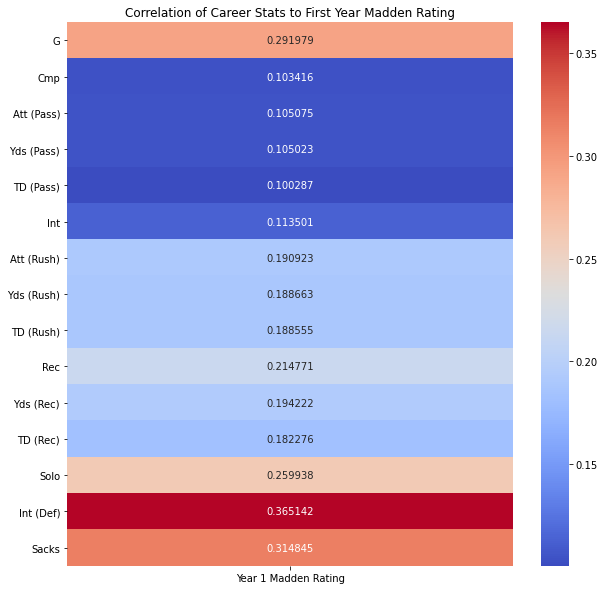

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(rookie_corr, annot=True, fmt="g", cmap='coolwarm')
plt.title("Correlation of Career Stats to First Year Madden Rating")
plt.show()

### 2) Does early round selection affect the likelyhood that you will appear in at least 1 Pro Bowl and 1 All Pro Team? 

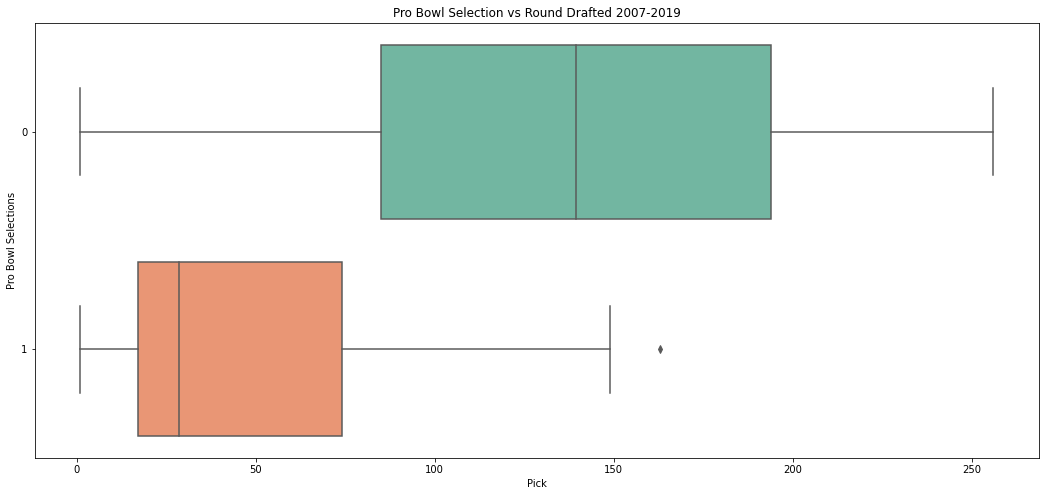

In [ ]:
plt.figure(figsize =(18,8))
sns.boxplot(x="Pick", y="PB", orient="h", palette="Set2", data=rookies[rookies["PB"]<2])
plt.title("Pro Bowl Selection vs Round Drafted 2007-2019")
plt.ylabel("Pro Bowl Selections")
plt.show()

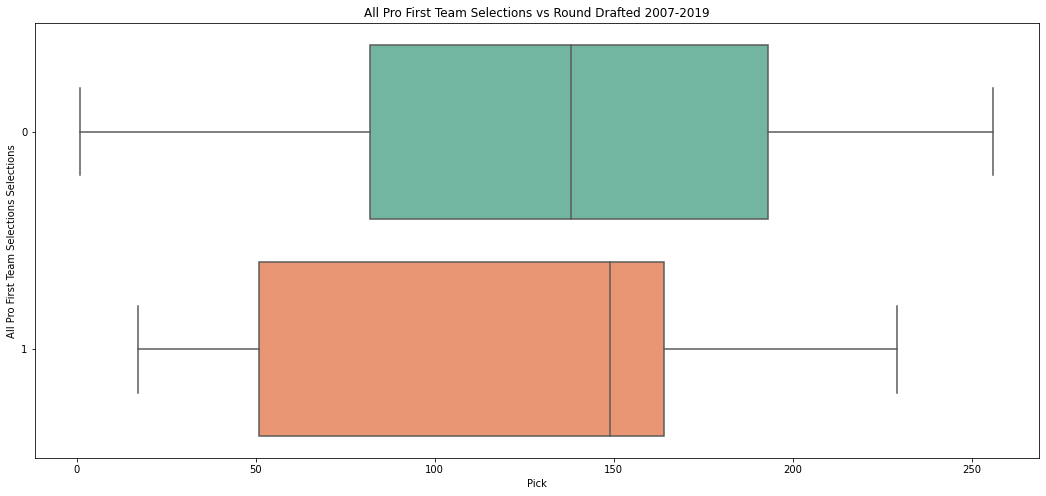

In [ ]:
plt.figure(figsize =(18,8))
sns.boxplot(x="Pick", y="AP1", orient="h", palette="Set2", data=rookies[rookies["AP1"]<2])
plt.title("All Pro First Team Selections vs Round Drafted 2007-2019")
plt.ylabel("All Pro First Team Selections Selections")
plt.show()

🏈  Pro Bowls are the All-star games for the NFL. It matches the top players of each season in leagues two conferences (American Football Conference (AFC) and  National Football Conference (NFC)) in a once off game. Players are selected based on fan votes as well as their performance in the season

### 3) Is early draft selection correlated to first year madden ratings?

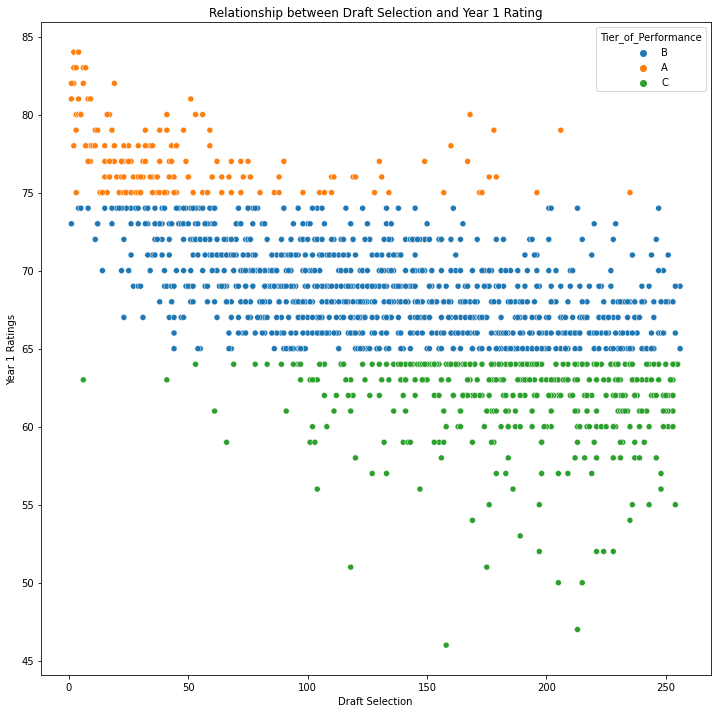

In [ ]:
plt.figure(figsize= (12,12))
sns.scatterplot(data=rookies, x="Pick", y="rating_1", hue= "Tier_of_Performance")
plt.title("Relationship between Draft Selection and Year 1 Rating")
plt.ylabel("Year 1 Ratings")
plt.xlabel("Draft Selection")
plt.show()



How likely is a low draft pick (After Round 5 or Pick 160) to have a high performance rating for year 1?

In [ ]:
plot_data = rookies[rookies["Pick"] > 160]

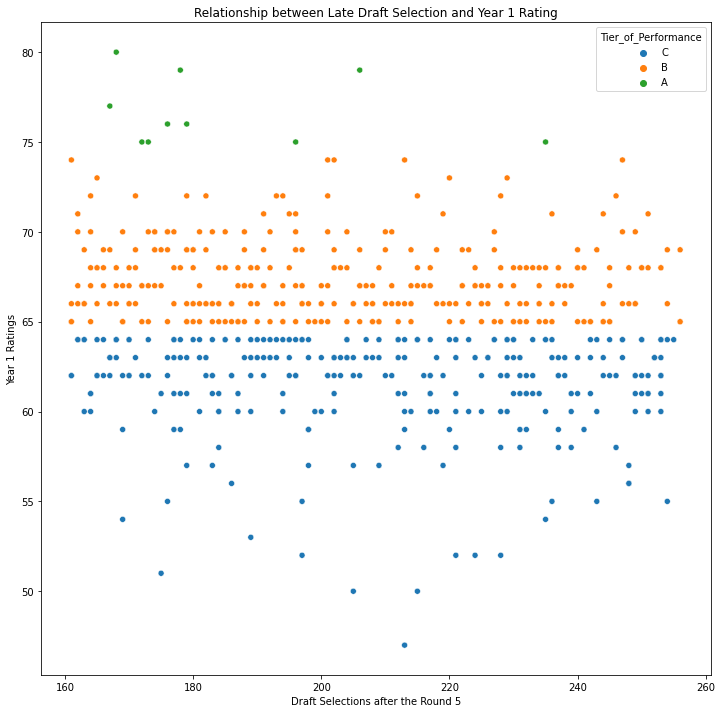

In [ ]:
plt.figure(figsize= (12,12))
sns.scatterplot(data=plot_data, x="Pick", y="rating_1", hue= "Tier_of_Performance")
plt.title("Relationship between Late Draft Selection and Year 1 Rating")
plt.ylabel("Year 1 Ratings")
plt.xlabel("Draft Selections after the Round 5")
plt.show()

In [ ]:
kickers = plot_data[plot_data["Tier_of_Performance"] == "A"]
kickers

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,rating_1,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Tier_of_Performance
414,5,167,MIN,Daniel Carlson,K,23.0,0,0,0,8.0,-1.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,NaN,Auburn,2018,77.0,77.0,213.0,9.75,32.00,NaN,NaN,NaN,NaN,NaN,NaN,A
419,5,172,GNB,JK Scott,P,22.0,0,0,0,6.0,6.0,48.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,NaN,Alabama,2018,75.0,78.0,208.0,9.13,33.13,4.83,NaN,30.5,114.0,4.41,7.28,A
420,5,173,OAK,Johnny Townsend,P,23.0,0,0,0,2.0,2.0,17.0,0.0,0.0,0.0,0.0,0.0,1.0,42.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Florida,2018,75.0,73.0,210.0,9.50,30.63,NaN,NaN,NaN,NaN,NaN,NaN,A
930,6,179,SDG,Drew Kaser,P,23.0,0,0,0,5.0,5.0,36.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,Texas A&M,2016,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2473,6,206,SFO,Kyle Williams,WR,22.0,0,0,0,6.0,6.0,39.0,0.0,0.0,0.0,0.0,0.0,8.0,76.0,0.0,47.0,574.0,4.0,NaN,NaN,NaN,Arizona St.,2010,79.0,70.0,188.0,NaN,NaN,4.40,11.0,33.0,118.0,4.19,7.00,A
2920,6,168,WAS,Durant Brooks,P,23.0,0,0,0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Georgia Tech,2008,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2928,6,176,MIA,Jalen Parmele,HB,22.0,0,0,0,1.0,NaN,36.0,0.0,0.0,0.0,0.0,0.0,48.0,187.0,0.0,7.0,60.0,0.0,17.0,NaN,NaN,Toledo,2008,76.0,71.5,224.0,8.88,32.25,4.55,19.0,34.0,125.0,4.29,6.96,A
2930,6,178,NOR,Taylor Mehlhaff,K,23.0,0,0,0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Wisconsin,2008,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
2948,6,196,IND,Tom Santi,TE,22.0,0,0,0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,171.0,1.0,NaN,NaN,NaN,Virginia,2008,75.0,75.5,250.0,9.38,33.25,4.81,14.0,36.0,121.0,4.27,7.08,A
2987,7,235,SEA,Brandon Coutu,K,23.0,0,0,0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Georgia,2008,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A


Interestingly, of the players who were picked after the 5th Round were recieved a A Tier Player Rating of over 75%, 7 out of 10 of them play on Special Teams as either Kickers or Punters. This makes sense as these positions are seldom drafted in the 1st round as they are not deemed "game changing" positions but could be given a good rating on Madden as they may excel at their specific position.   

In [ ]:
kickers.to_csv(r'C:\Users\Admin\Desktop\Kickers.csv', index=False)

### 4) Which teams have the most high performing athletes (Tier A)? Which have the most low performing athletes (Tier C)? Does there appear to be a connection between the team you are selected by and your year 1 rating? 

In [ ]:
plot_data = rookies[rookies["Tier_of_Performance"] == "A"].groupby(["Team"]).size().sort_values(ascending=False).head(10)
plot_data2 = rookies[rookies["Tier_of_Performance"] == "C"].groupby(["Team"]).size().sort_values(ascending=False).head(10)

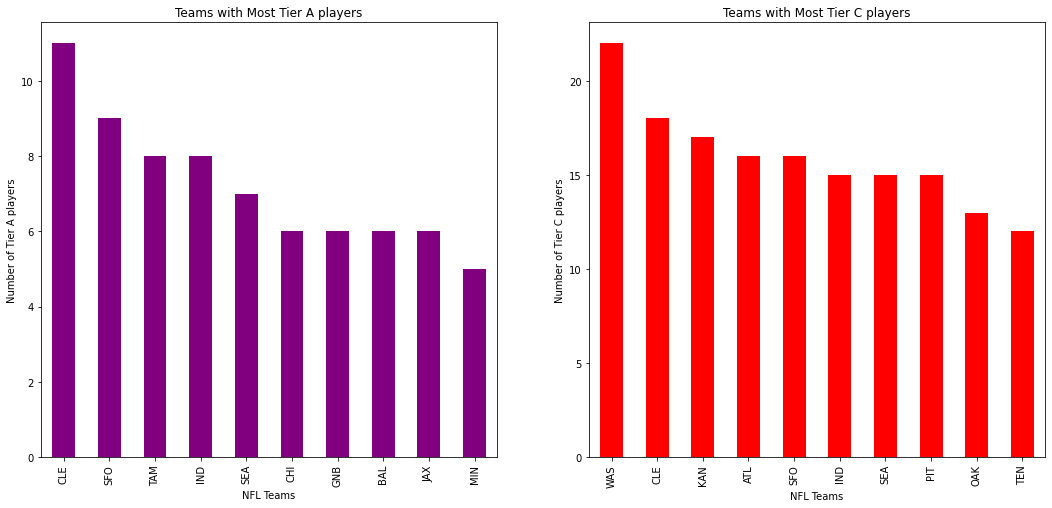

In [ ]:
plt.figure(figsize =(18,8))

plt.subplot(121)
plot_data.plot.bar(color = "purple")
plt.title("Teams with Most Tier A players")
plt.xlabel("NFL Teams")
plt.ylabel("Number of Tier A players")

plt.subplot(122)
plot_data2.plot.bar(color="red")
plt.title("Teams with Most Tier C players")
plt.xlabel("NFL Teams")
plt.ylabel("Number of Tier C players")
plt.show()

### 5) How are certain combine events correlated to performance? How do combine performances for Tier A, B and C players cluster together?

In [ ]:
combine_event_stats = rookies.iloc[:, np.r_[33:39]]
column_rating = rookies["rating_1"]

In [ ]:
combine_event_corr = combine_event_stats.corrwith(column_rating)

In [ ]:
combine_event_corr = pd.DataFrame(combine_event_corr)
combine_event_corr.columns = ["First Year Madden Rating"]

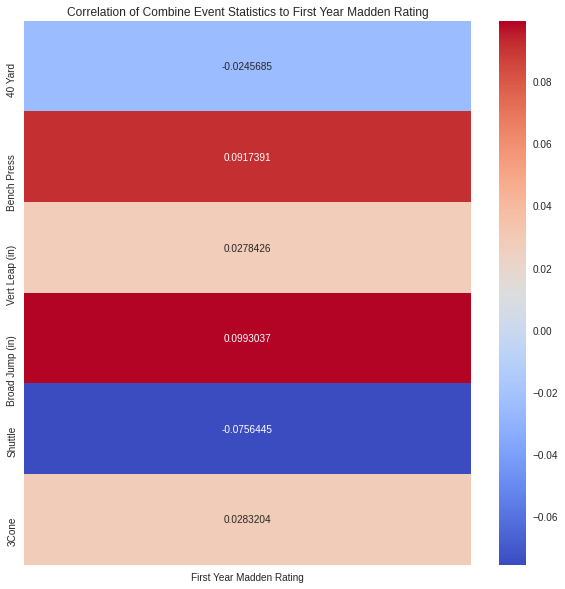

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(combine_event_corr, annot=True, fmt="g", cmap='coolwarm')
plt.title("Correlation of Combine Event Statistics to First Year Madden Rating")
plt.show()

These numbers dont seem to indicate much! Lets try impute the missing values using a Baysian Imputer to see if we can get as accurate as possible measurements. 

In [ ]:
# summarize the number of rows with missing values for each column
for i in range(combine_event_stats.shape[1]):
	# count number of rows with missing values
	n_miss_combine = combine_event_stats.isnull().sum().values[i]
	perc_combine = (n_miss_combine / combine_event_stats.shape[0] * 100)
	print('> %d, Missing: %d (%.1f%%)' % (i, n_miss_combine, perc_combine))

> 0, Missing: 396 (26.5%)
> 1, Missing: 627 (42.0%)
> 2, Missing: 524 (35.1%)
> 3, Missing: 549 (36.8%)
> 4, Missing: 646 (43.3%)
> 5, Missing: 666 (44.6%)


🏈  Define Iterative Imputer

In [ ]:
# define imputer
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.linear_model import BayesianRidge

imputer_model_combine = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

🏈  Fit Imputer

In [ ]:
imputer_model_combine.fit(combine_event_stats)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


IterativeImputer(add_indicator=False,
                 estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                         alpha_init=None, compute_score=False,
                                         copy_X=True, fit_intercept=True,
                                         lambda_1=1e-06, lambda_2=1e-06,
                                         lambda_init=None, n_iter=300,
                                         normalize=False, tol=0.001,
                                         verbose=False),
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=None,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

🏈  Transform Imputer

In [ ]:
combine_transformed = imputer_model_combine.transform(combine_event_stats)
combine_transformed

array([[  9.99      ,  33.99010854,  19.16172754,  81.88140448,
          9.99      ,   9.99      ],
       [  4.79      ,  29.        ,  33.5       , 116.        ,
          7.1       ,   4.14      ],
       [  4.83769678,  20.90766738,  32.84854388, 115.23000636,
          4.98291714,   7.01860923],
       ...,
       [  4.59      ,  16.41336069,  36.        , 129.        ,
          4.19      ,   6.69      ],
       [  4.49      ,  21.01468734,  31.5       , 115.        ,
          4.69064013,   6.96218763],
       [  4.76      ,  19.        ,  30.        , 108.        ,
          4.53      ,   7.25      ]])

Put array back to dataframe

In [ ]:
combine_transformed = pd.DataFrame(combine_transformed)

In [ ]:
combine_transformed

,0,1,2,3,4,5
0,9.990000,33.990109,19.161728,81.881404,9.990000,9.990000
1,4.790000,29.000000,33.500000,116.000000,7.100000,4.140000
2,4.837697,20.907667,32.848544,115.230006,4.982917,7.018609
3,9.990000,25.000000,23.223651,90.688259,7.260000,4.400000
4,4.837697,20.907667,32.848544,115.230006,4.982917,7.018609
...,...,...,...,...,...,...
1488,4.740000,21.859976,34.500000,111.000000,4.310000,7.210000
1489,4.837697,20.907667,32.848544,115.230006,4.982917,7.018609
1490,4.590000,16.413361,36.000000,129.000000,4.190000,6.690000
1491,4.490000,21.014687,31.500000,115.000000,4.690640,6.962188


Get Correlation

In [ ]:
combine_transformed_corr = combine_transformed.corrwith(column_rating)
combine_transformed_corr = pd.DataFrame(combine_transformed_corr)
combine_transformed_corr = combine_transformed_corr.rename(columns={0: 'First Year Madden Rating'}, index={0: '40 yard', 1: "Bench Press", 2:"Vert Leap (in)", 3: "Broad Jump (in)", 4: "Shuttle", 5: "3Cone"})
combine_transformed_corr

,First Year Madden Rating
40 yard,-0.053170
Bench Press,-0.034081
Vert Leap (in),0.025298
Broad Jump (in),0.054855
Shuttle,-0.036844
3Cone,-0.008824


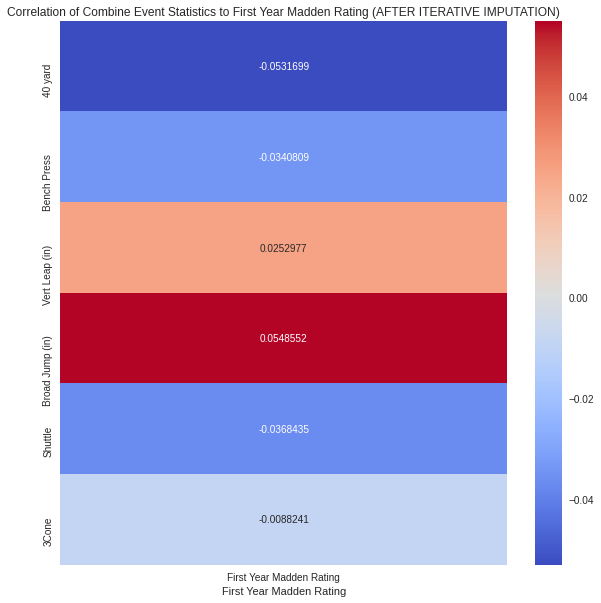

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(combine_transformed_corr, annot=True, fmt="g", cmap='coolwarm')
plt.title("Correlation of Combine Event Statistics to First Year Madden Rating (AFTER ITERATIVE IMPUTATION)")
plt.xlabel("First Year Madden Rating")
plt.show()

After imputation correlation decreased. The results are still quite inconclusive but an atheletes performance in the Broad Jump (in) and Vertical Leap(in) have the largest effect of the the combine events on athelete first year performance and rating. 

### 6) Which positions have the most high performing athletes? Does your position influence your first year performance rating?

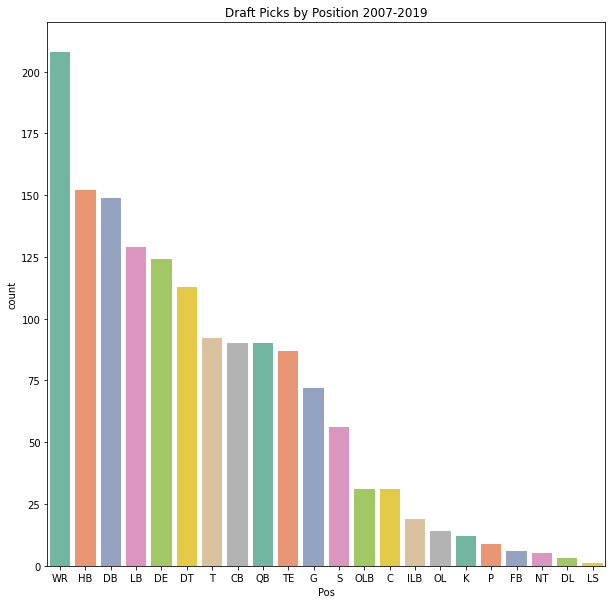

In [ ]:
plt.figure(figsize =(10,10))
sns.countplot(data=rookies,
              x='Pos', order = rookies['Pos'].value_counts().index, palette="Set2")
plt.ylim([0, 220])
plt.title("Draft Picks by Position 2007-2019")
plt.show()

From the information above one can see that the most coverted or most populated position is Wide Reciever followed by Runningbacks (HB), Defensivebacks (DB), Linebackers(LB) and Defensive Ends (DE). Lets take a closer look at these 5 positions. 

In [ ]:
plot_data = rookies['Pos'].isin(['WR', 'HB', "DB", "LB", "DE"])
plot_data = rookies[plot_data]


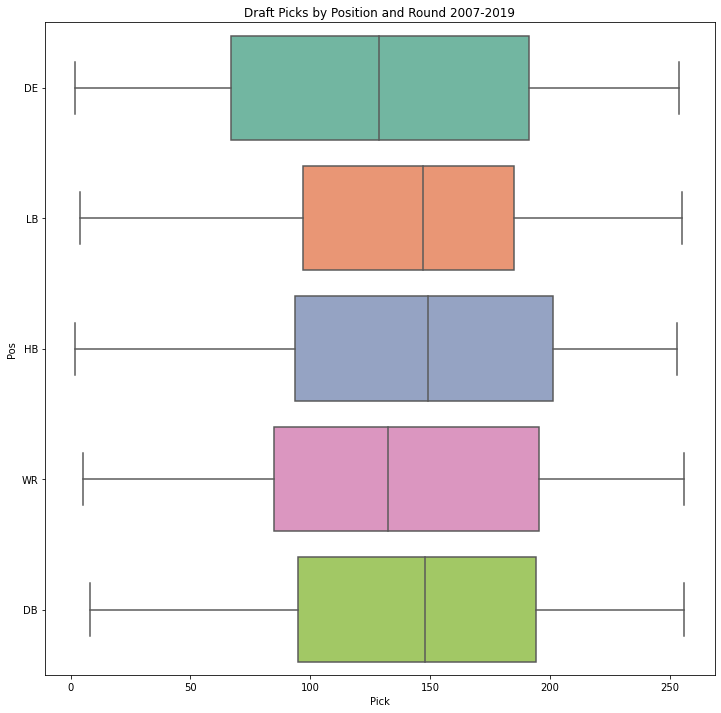

In [ ]:
plt.figure(figsize =(12,12))
sns.boxplot(x="Pick", y= "Pos", orient="h", palette="Set2", data=plot_data)
plt.title("Draft Picks by Position and Round 2007-2019")
plt.show()

The results weren't massively interesting. Each position has been drafted in the beginning of round 1 on least one occasion. Defensive Ends slightly edge out Wide Recievers with the median of this positions picks sitting at around the 125 mark (or halfway) through the draft. The Wide Recievers data seem to be more positively screwed than the rest and the Defensive End data seems to be the most dispersed. 

### 7) Which physical measurements have an effect on your success in the league? Lets break this down by three main types of position: 

1) The Quarterback
2) Running backs and Wide Recievers
3) Defensive players

In [ ]:
rookies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1493 entries, 0 to 3218
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rnd                  1493 non-null   int64  
 1   Pick                 1493 non-null   int64  
 2   Team                 1493 non-null   object 
 3   Player               1493 non-null   object 
 4   Pos                  1493 non-null   object 
 5   Age                  1493 non-null   float64
 6   AP1                  1493 non-null   int64  
 7   PB                   1493 non-null   int64  
 8   St                   1493 non-null   int64  
 9   CarAV                1493 non-null   float64
 10  DrAV                 1359 non-null   float64
 11  G                    1493 non-null   float64
 12  Cmp                  1493 non-null   float64
 13  Att (Pass)           1493 non-null   float64
 14  Yds (Pass)           1493 non-null   float64
 15  TD (Pass)            1493 non-null   f

In [ ]:
position_options_w = ['WR', 'HB']
position_options_def = ['DB', 'LB', "DE", "DT", "CB","S", "OLB", "ILB", "DL", "NT"]

rookies_qb = rookies[rookies['Pos'] == 'QB']
rookies_off = rookies[rookies['Pos'].isin(position_options_w)]
rookies_def = rookies[rookies['Pos'].isin(position_options_def)]


In [ ]:
rookies_phys_qb = rookies_qb.iloc[:, np.r_[5, 29:33]] 
rookie_phys_off = rookies_off.iloc[:, np.r_[5, 29:33]]
rookie_phys_def = rookies_def.iloc[:, np.r_[5, 29:33]]

column_rating = rookies["rating_1"]

In [ ]:
qb_corr = rookies_phys_qb.corrwith(column_rating)
off_corr = rookie_phys_off.corrwith(column_rating)
def_corr = rookie_phys_def.corrwith(column_rating)

In [ ]:
qb_corr = pd.DataFrame(qb_corr)
qb_corr.columns = ["QUARTERBACK: FIRST YEAR RATING"]
qb_corr

,QUARTERBACK: FIRST YEAR RATING
Age,-0.319950
Height (in),-0.059798
Weight (lbs),0.192573
Hand Size (in),0.216853
Arm Length (in),-0.063200


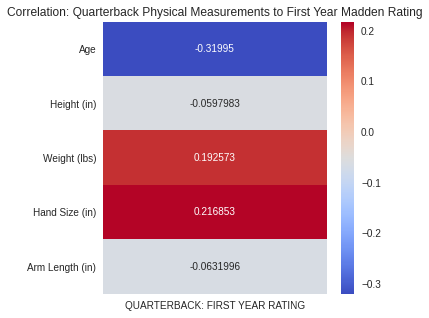

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(qb_corr, annot=True, fmt="g", cmap='coolwarm')
plt.title("Correlation: Quarterback Physical Measurements to First Year Madden Rating")
plt.show()

At the quarterback position the data tells us that both Hand Size (in) and Weight (lbs) are resonably highly correlated with high performance in year 1. 

This is interesting and makes sense for two reasons. First the quarterbacks main job is to throw the football. Bigger hands may mean a better grip of the football in cold weather games and fewer bad throws for interceptions from the other team.

Secondly, a quarterback is the most important position on the field with teams placing a huge amount of value at the position. As such, it is incredibly important these players stay injury free. A thicker-set quarterback may be able to absorb more punishment on the field and stay injury free for longer. 

In [ ]:
off_corr = pd.DataFrame(off_corr)
off_corr.columns = ["RB/WR: First Year Rating"]
off_corr

,RB/WR: First Year Rating
Age,-0.270380
Height (in),-0.033865
Weight (lbs),0.118673
Hand Size (in),0.047100
Arm Length (in),0.005104


Weight seems to play a big factor in success for running backs and wide recievers while Age is negatively correlated which is unsurprising as we have seen from previous analysis. 

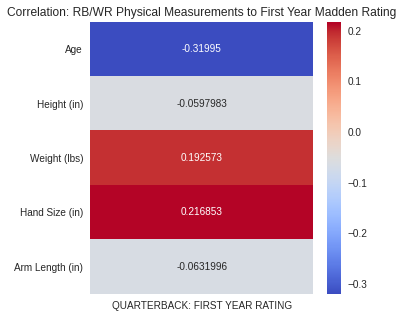

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(qb_corr, annot=True, fmt="g", cmap='coolwarm')
plt.title("Correlation: RB/WR Physical Measurements to First Year Madden Rating")
plt.show()

In [ ]:
def_corr = pd.DataFrame(def_corr)
def_corr.columns = ["Defensive Players: First Year Madden Rating"]
def_corr

,Defensive Players: First Year Madden Rating
Age,-0.195435
Height (in),0.026016
Weight (lbs),-0.008322
Hand Size (in),0.023346
Arm Length (in),0.108070


On the defensive side of the ball the most important physical feature seems to be Arm Length (in). Again this is interesting and makes sense as defensive players need to make use of there arms to get past offensive players whose job is to block some of them from tackling the quarterback. 

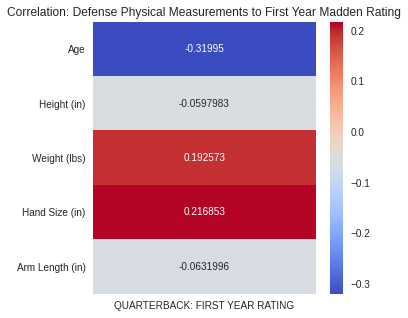

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(qb_corr, annot=True, fmt="g", cmap='coolwarm')
plt.title("Correlation: Defense Physical Measurements to First Year Madden Rating")
plt.show()

🏈  Are older players more likely to be picked in later rounds?

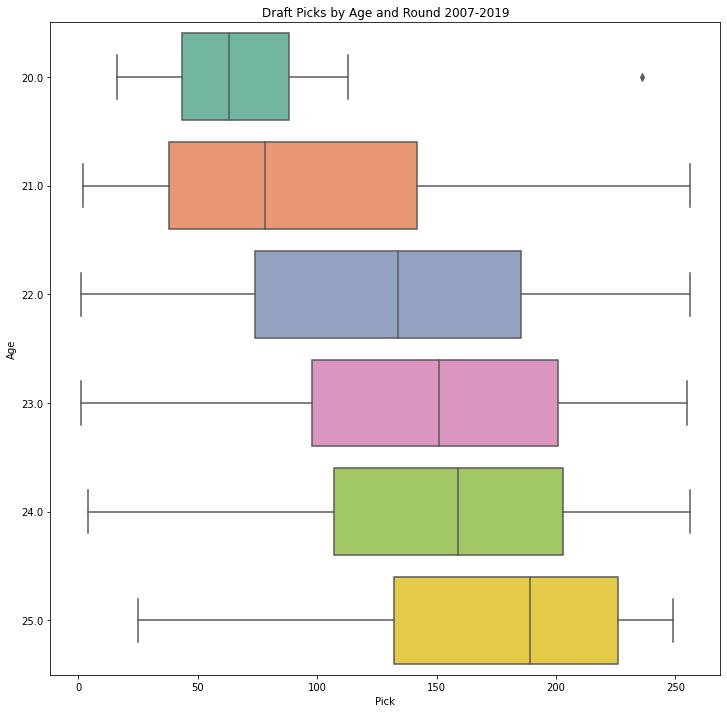

In [ ]:
plt.figure(figsize =(12,12))
sns.boxplot(x="Pick", y="Age", orient="h", palette="Set2", data=rookies[rookies["Age"] < 26])
plt.title("Draft Picks by Age and Round 2007-2019")
plt.show()

There are two players who were selected at the age of 28 (as of the 1st of Sept in his draft year).

There is one player who was selected at the age of 27 (as of the 1st of Sept in his draft year)



### 8) Does your college team play a role in where you get drafted and in turn what your player perormance is after year 1? 

In the NCAA (National Collegiate Athletic Association), there are five major conferences (known as the POWER FIVE). The Power Five encompasses 65 schools, those that make up the five largest and richest conferences in college athletics (ACC, Big Ten, Big 12, Pac-12, SEC) plus Notre Dame. These schools are widely regarded as the upper echelon of NFL pro ready talent.



In [ ]:
colleges = rookies["College/Univ"].value_counts()
colleges = pd.DataFrame(colleges)
colleges

,College/Univ
Alabama,46
Ohio St.,43
Georgia,36
Oklahoma,35
Florida,35
...,...
Marshall,1
West Georgia,1
James Madison,1
Nicholls St.,1


Sporting News ranked all the FBS programs by their past 10 seasons with a statistical formula that bridges the Bowl Championship Series and College Football Playoff eras to determine the top 25 college football programs.  

Here are the categories we used:  

National championships: 10 points each  
National title game appearances: 5 points each   
College Football Playoff appearances: 5 points each  
New Year's Day Six/BCS bowl appearances: 3 points each  
Heisman Trophy winners: 2 points each  

https://www.sportingnews.com/us/ncaa-football/list/ranking-top-25-college-football-programs-2020/10fxo966wm2uq12926io6e4m37

For the sake of my analysis I will be looking at the top 15 Schools from this list over the last decade vs the rest. 

In [ ]:
SportNews_top10 = ["Alabama", "Ohio St.", "Clemson", "LSU", "Oklahoma", "Florida State", "Georgia", "Wisconsin", "Auburn", "Oregon", "Stanford", "Notre Dame", "Florida", "Michigan State", "Boise State"]

rookies_college_top = rookies[rookies["College/Univ"].isin(SportNews_top10)]
rookies_college_other = rookies[~rookies["College/Univ"].isin(SportNews_top10)]

In [ ]:
rookies_college_top

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,rating_1,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Tier_of_Performance
0,1,1,ARI,Kyler Murray,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2019,73.0,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99,B
1,1,2,SFO,Nick Bosa,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,2019,78.0,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14,A
2,1,3,NYJ,Quinnen Williams,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,2019,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A
3,1,4,OAK,Clelin Ferrell,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,2019,74.0,76.00,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40,B
4,1,5,TAM,Devin White,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,LSU,2019,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3182,6,194,ATL,David Irons,DB,24.0,0,0,0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,NaN,NaN,Auburn,2007,72.0,70.25,190.0,9.38,32.38,4.50,11.0,29.5,111.0,4.30,7.18,B
3185,6,197,SEA,Courtney Taylor,WR,23.0,0,0,0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,136.0,0.0,4.0,NaN,NaN,Auburn,2007,66.0,73.75,204.0,9.50,32.25,4.52,NaN,36.0,122.0,4.28,7.22,B
3204,7,227,PIT,Dallas Baker,WR,24.0,0,0,0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,NaN,NaN,NaN,Florida,2007,70.0,75.13,208.0,10.13,36.50,4.59,NaN,36.0,129.0,4.19,6.69,B
3205,7,228,GNB,DeShawn Wynn,HB,23.0,0,0,0,3.0,3.0,23.0,0.0,0.0,0.0,0.0,0.0,64.0,332.0,5.0,14.0,122.0,0.0,2.0,NaN,NaN,Florida,2007,72.0,70.38,232.0,8.75,30.50,4.49,NaN,31.5,115.0,NaN,NaN,B


367 Players come from the top schools

In [ ]:
rookies_college_top["Top_15"] = "Top_15_School"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
rookies_college_other

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,rating_1,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Tier_of_Performance
5,1,6,NYG,Daniel Jones,QB,22.0,0,0,2,18.0,18.0,27.0,564.0,907.0,5970.0,35.0,22.0,110.0,702.0,3.0,0.0,0.0,0.0,NaN,NaN,NaN,Duke,2019,63.0,77.00,221.0,9.75,32.50,4.81,NaN,33.5,120.0,7.00,4.41,C
6,1,8,DET,T.J. Hockenson,TE,22.0,0,1,1,8.0,8.0,28.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,99.0,1090.0,8.0,NaN,NaN,NaN,Iowa,2019,77.0,77.00,251.0,9.50,32.25,4.70,17.0,37.5,123.0,7.02,4.18,A
10,1,12,GNB,Rashan Gary,LB,21.0,0,0,0,5.0,5.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,NaN,7.0,Michigan,2019,73.0,76.00,277.0,9.63,34.13,4.58,26.0,38.0,120.0,7.26,4.29,B
12,1,14,ATL,Chris Lindstrom,G,22.0,0,0,1,9.0,9.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Boston Col.,2019,70.0,76.00,308.0,9.50,34.13,4.91,25.0,30.5,117.0,7.61,4.54,B
14,1,16,CAR,Brian Burns,DE,21.0,0,0,1,11.0,11.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,NaN,16.5,Florida St.,2019,75.0,77.00,249.0,10.00,33.88,4.53,NaN,36.0,129.0,7.01,9.99,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,6,196,KAN,Herbert Taylor,T,22.0,0,0,0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,TCU,2007,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
3191,6,207,BAL,Prescott Burgess,LB,23.0,0,0,0,3.0,3.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,NaN,NaN,Michigan,2007,64.0,75.38,240.0,9.50,34.50,4.88,19.0,32.5,106.0,4.31,7.01,C
3194,7,212,DAL,Courtney Brown,DB,23.0,0,0,0,2.0,2.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,NaN,NaN,Cal Poly-San Luis Obispo,2007,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
3195,7,215,ARI,Ben Patrick,TE,23.0,0,0,2,4.0,4.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,446.0,4.0,1.0,NaN,NaN,Delaware,2007,72.0,75.13,252.0,9.88,34.00,4.74,NaN,34.5,111.0,4.31,7.21,B


1126 Players come from outside these top schools

In [ ]:
rookies_college_other["Top_15"] = "Outside_Top_15"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
rookies_college_final = pd.concat([rookies_college_top, rookies_college_other])
rookies_college_final_A = rookies_college_final[rookies_college_final["Tier_of_Performance"]=="A"]
rookies_college_final_B = rookies_college_final[rookies_college_final["Tier_of_Performance"]=="B"]
rookies_college_final_C = rookies_college_final[rookies_college_final["Tier_of_Performance"]=="C"]

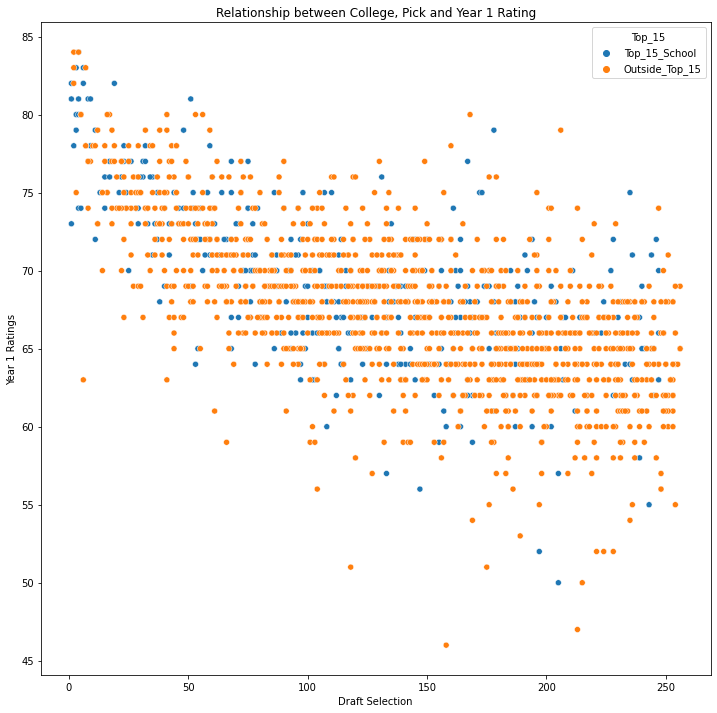

In [ ]:
plt.figure(figsize= (12,12))
sns.scatterplot(data=rookies_college_final, x="Pick", y="rating_1", hue= "Top_15")
plt.title("Relationship between College, Pick and Year 1 Rating")
plt.ylabel("Year 1 Ratings")
plt.xlabel("Draft Selection")
plt.show()

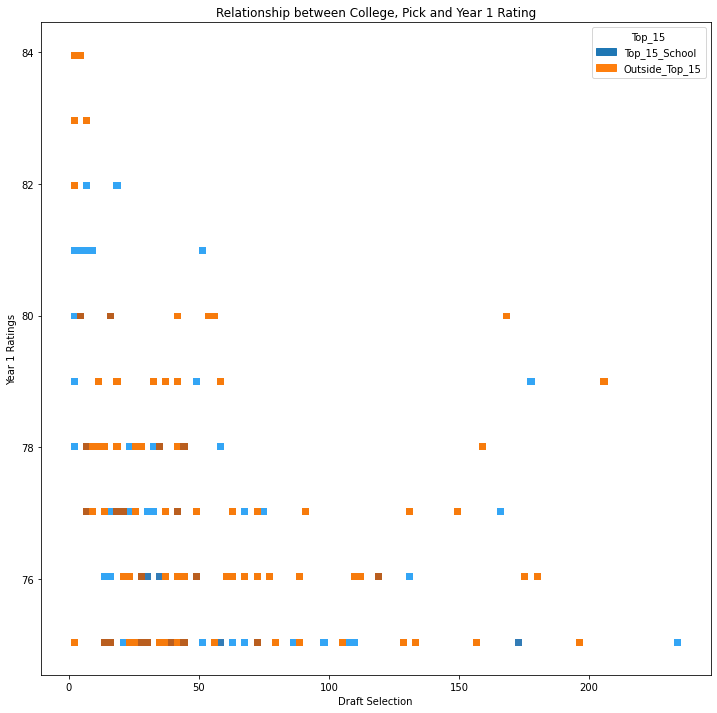

In [ ]:
plt.figure(figsize= (12,12))
sns.histplot(data=rookies_college_final_A, x="Pick", y="rating_1", hue= "Top_15", bins = 100)
plt.title("Relationship between College, Pick and Year 1 Rating")
plt.ylabel("Year 1 Ratings")
plt.xlabel("Draft Selection")
plt.show()

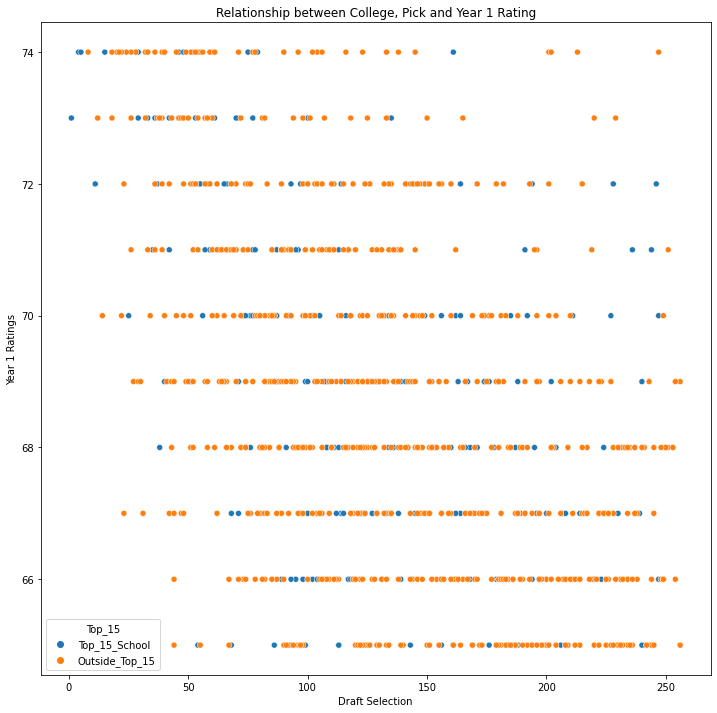

In [ ]:
plt.figure(figsize= (12,12))
sns.scatterplot(data=rookies_college_final_B, x="Pick", y="rating_1", hue= "Top_15")
plt.title("Relationship between College, Pick and Year 1 Rating")
plt.ylabel("Year 1 Ratings")
plt.xlabel("Draft Selection")
plt.show()

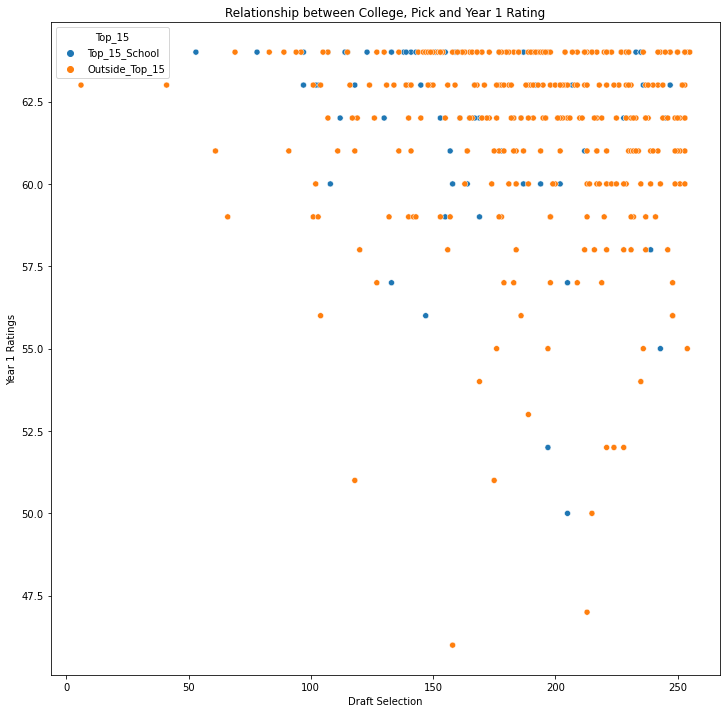

In [ ]:
plt.figure(figsize= (12,12))
sns.scatterplot(data=rookies_college_final_C, x="Pick", y="rating_1", hue= "Top_15")
plt.title("Relationship between College, Pick and Year 1 Rating")
plt.ylabel("Year 1 Ratings")
plt.xlabel("Draft Selection")
plt.show()

In [ ]:
rookies_college_final_A

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,rating_1,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Tier_of_Performance,Top_15
1,1,2,SFO,Nick Bosa,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,2019,78.0,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14,A,Top_15_School
2,1,3,NYJ,Quinnen Williams,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,2019,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Top_15_School
11,1,13,MIA,Christian Wilkins,DT,23.0,0,0,2,12.0,12.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,58.0,1.0,3.5,Clemson,2019,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,Top_15_School
23,1,25,BAL,Marquise Brown,WR,22.0,0,0,1,17.0,17.0,30.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,104.0,1353.0,15.0,NaN,NaN,NaN,Oklahoma,2019,77.0,69.00,166.0,9.00,30.50,9.99,NaN,NaN,NaN,9.99,9.99,A,Top_15_School
251,1,1,CLE,Baker Mayfield,QB,23.0,0,0,3,30.0,30.0,46.0,932.0,1506.0,11115.0,75.0,43.0,121.0,437.0,4.0,1.0,6.0,0.0,NaN,NaN,NaN,Oklahoma,2018,81.0,73.00,215.0,9.25,30.25,4.84,NaN,29.0,111.0,4.28,7.00,A,Top_15_School
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,3,72,MIN,Marcus McCauley,DB,24.0,0,0,0,5.0,5.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,NaN,NaN,Fresno St.,2007,75.0,72.75,203.0,10.25,32.25,4.40,17.0,36.0,129.0,4.17,6.61,A,Outside_Top_15
3086,3,88,NOR,Andy Alleman,G,23.0,0,0,0,4.0,NaN,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Akron,2007,76.0,76.00,305.0,9.50,31.25,5.08,27.0,30.0,106.0,4.65,7.80,A,Outside_Top_15
3114,4,120,SEA,Baraka Atkins,DE,22.0,0,0,0,2.0,2.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,NaN,2.0,Miami (FL),2007,76.0,76.50,271.0,10.25,35.25,4.70,22.0,33.0,111.0,NaN,NaN,A,Outside_Top_15
3124,4,130,CHI,Josh Beekman,C,24.0,0,0,1,9.0,9.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Boston Col.,2007,77.0,73.63,313.0,9.50,32.50,5.40,24.0,25.5,93.0,4.81,8.24,A,Outside_Top_15


In [ ]:
a = rookies_college_final_A.groupby('Top_15').size()
b = rookies_college_final_B.groupby('Top_15').size()
c = rookies_college_final_C.groupby('Top_15').size()

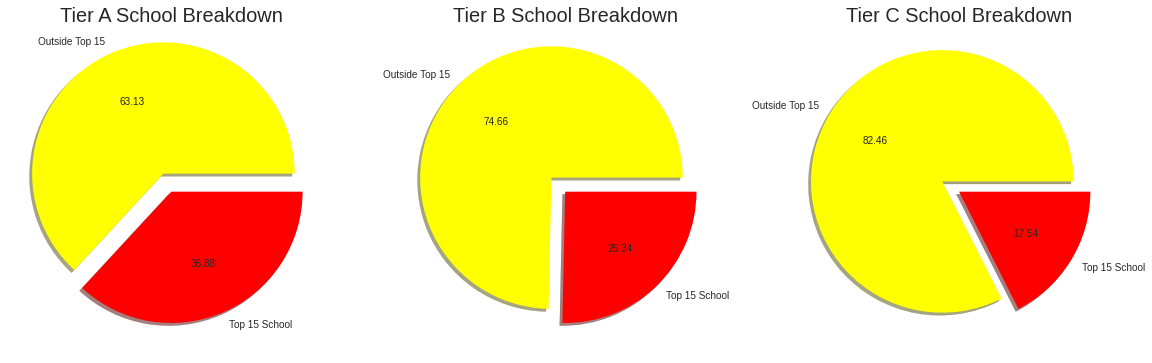

In [ ]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show

mylabels = ["Outside Top 15", "Top 15 School"]
myexplode = [0.15, 0]
mycolors = ["yellow", "red"]

plt.figure(figsize = (20,20))
plt.subplot(131)
plt.title("Tier A School Breakdown", fontsize=20)
plt.pie(a, autopct='%.2f', labels = mylabels, explode = myexplode, shadow = True, colors = mycolors)

plt.subplot(132)
plt.title("Tier B School Breakdown", fontsize=20)
plt.pie(b, autopct='%.2f', labels = mylabels, explode = myexplode, shadow = True, colors = mycolors)

plt.subplot(133)
plt.title("Tier C School Breakdown", fontsize=20)
plt.pie(c, autopct='%.2f', labels = mylabels, explode = myexplode, shadow = True, colors = mycolors)
plt.show()

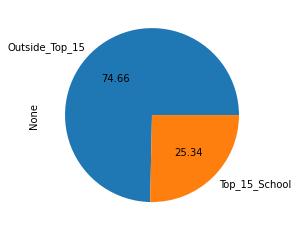

In [ ]:
rookies_college_final_B.groupby('Top_15').size().plot(kind='pie', autopct='%.2f')

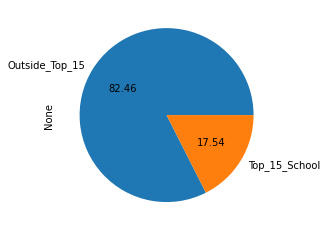

In [ ]:
rookies_college_final_C.groupby('Top_15').size().plot(kind='pie', autopct='%.2f')

### Vets and Rookies before Cleaning for Rating Nulls

In [ ]:
combine_college_madden_final_vets

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position_x,rating_1,position_1,rating_2,position_2,rating_3,position_3,rating_4,position_4,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Name ID Position_y


In [ ]:
combine_college_madden_final

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position_x,rating_1,position_1,rating_2,position_2,rating_3,position_3,rating_4,position_4,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Name ID Position_y
0,1,1,ARI,Kyler Murray,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2019,Kyler Murray QB,73,QB,NaN,NaN,NaN,NaN,NaN,NaN,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99,Kyler Murray QB
1,1,2,SFO,Nick Bosa,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,2019,Nick Bosa DE,78,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14,Nick Bosa DE
2,1,3,NYJ,Quinnen Williams,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,2019,Quinnen Williams DT,80,DT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,OAK,Clelin Ferrell,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,2019,Clelin Ferrell DE,74,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40,Clelin Ferrell DE
4,1,5,TAM,Devin White,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,LSU,2019,Devin White LB,74,ILB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,7,246,TAM,Kenneth Darby,HB,24.0,0,0,0,4.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,95.0,408.0,2.0,49.0,356.0,1.0,18.0,NaN,NaN,Alabama,2007,Kenneth Darby HB,72,HB,NaN,NaN,66,HB,66,HB,70.38,211.0,9.00,30.50,4.76,19.0,30.0,108.0,4.53,7.25,Kenneth Darby RB
3219,7,249,STL,Derek Stanley,WR,22.0,0,0,0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,6.0,119.0,1.0,2.0,NaN,NaN,Wisconsin–Whitewater,2007,Derek Stanley WR,NaN,NaN,NaN,NaN,55,WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3221,7,251,JAX,Chad Nkang,LB,22.0,0,0,0,1.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,NaN,NaN,Elon,2007,Chad Nkang LB,NaN,NaN,66,S,NaN,NaN,NaN,NaN,71.50,220.0,NaN,NaN,4.52,23.0,36.5,118.0,4.34,7.10,Chad Nkang SS
3223,7,254,OAK,Jonathan Holland,WR,22.0,0,0,0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,NaN,NaN,Louisiana Tech,2007,Jonathan Holland WR,NaN,NaN,NaN,NaN,NaN,NaN,56,WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#corr = .corr()

In [ ]:
# Group two sets of features to be compared

#group_features_1 = ["Rnd", "Pick"]
#group_features_2 = ["rating_1", "Pos"]


In [ ]:
#corr = corr.loc[group_features_1, group_features_2]

#sns.clustermap(corr, cmap = "RdBu", figsize = (20,10))

## EDA by POSITION

🏈  Which rookie position has been selected the most between 2007-2019?

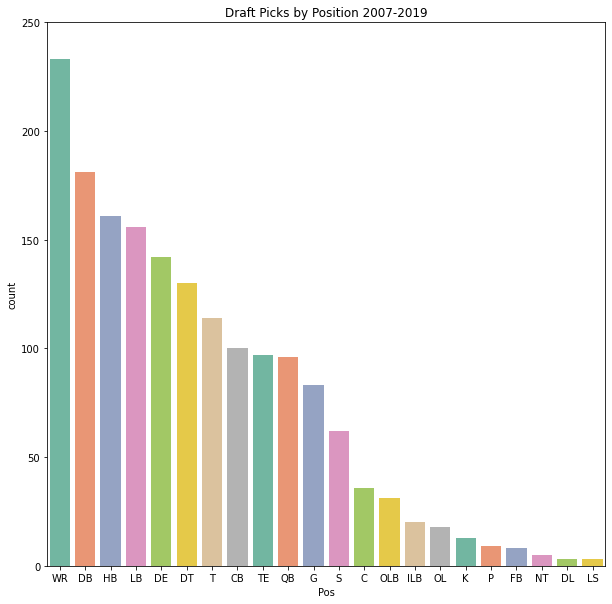

In [ ]:
plt.figure(figsize =(10,10))
sns.countplot(data=combine_college_madden_final,
              x='Pos', order = combine_college_madden_final['Pos'].value_counts().index, palette="Set2")
plt.ylim([0, 250])
plt.title("Draft Picks by Position 2007-2019")
plt.show()

🏈  Which rookie positions were picked in which round between 2007-2019?

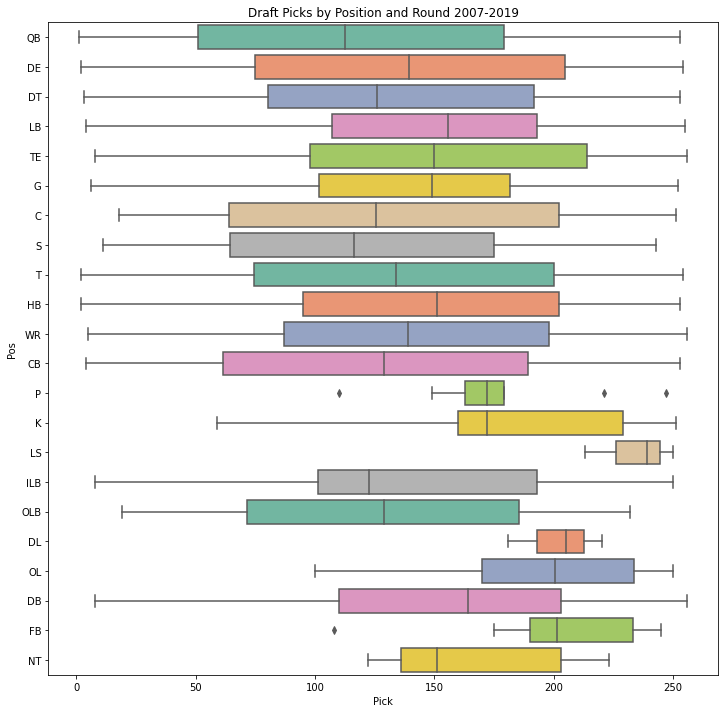

In [ ]:
plt.figure(figsize =(12,12))
sns.boxplot(x="Pick", y="Pos", orient="h", palette="Set2", data=combine_college_madden_final)
plt.title("Draft Picks by Position and Round 2007-2019")
plt.show()

🏈  Split Player Positions into 3 Teams: Offense, Defense and Special Teams

In [ ]:
position_team_dict = {"WR": "OFF", "RB":"OFF", "TE": "OFF", "G": "OFF", "QB": "OFF", "OL":"OFF", "C": "OFF", 
                "FB":"OFF", "DB": "DEF", "DE": "DEF", "DT": "DEF", "LB": "DEF", "T": "DEF", "CB": "DEF", 
                "OLB": "DEF", "S": "DEF", "ILB": "DEF", "SS": "DEF", "NT": "DEF", "FS": "DEF", 
                "LS": "SPECIAL", "DL": "DEF", "K":"SPECIAL", "P": "SPECIAL", "HB": "OFF"}

combine_college_madden_final["Position_Team"] = combine_college_madden_final["Pos"].map(position_team_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


🏈  How many Rookie draft picks have come from each Position_Team between 2007-2019?

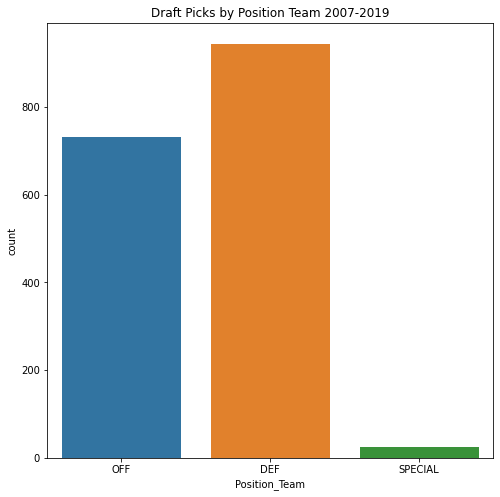

In [ ]:
plt.figure(figsize =(8,8))
sns.countplot(data=combine_college_madden_final,
              x='Position_Team')
plt.title("Draft Picks by Position Team 2007-2019")
plt.show()

🏈 What is the distribution of draft picks by Position_Team look like from 2007-2019?

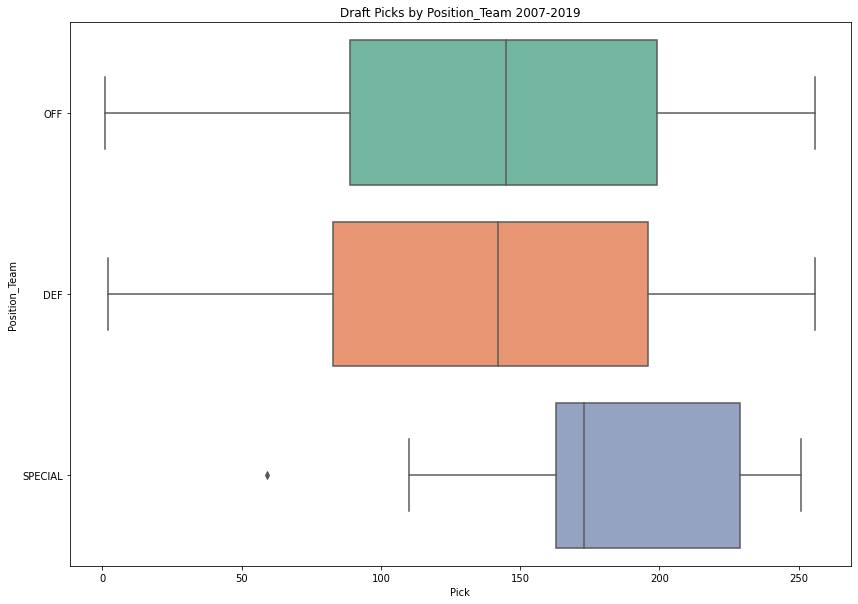

In [ ]:
plt.figure(figsize =(14,10))
sns.boxplot(x="Pick", y="Position_Team", orient="h", palette="Set2", data=combine_college_madden_final)
plt.title("Draft Picks by Position_Team 2007-2019")
plt.show()

## EDA of NFL TEAM SELECTIONS

How many rookies has each team drafted over this period?

In [ ]:
combine_college_madden_final["Team"].value_counts().reset_index()

,index,Team
0,CLE,68
1,SEA,68
2,IND,67
3,SFO,63
4,WAS,61
5,GNB,59
6,DET,58
7,MIN,58
8,CIN,57
9,NWE,57


Over this period, which teams have drafted rookie players in which round?

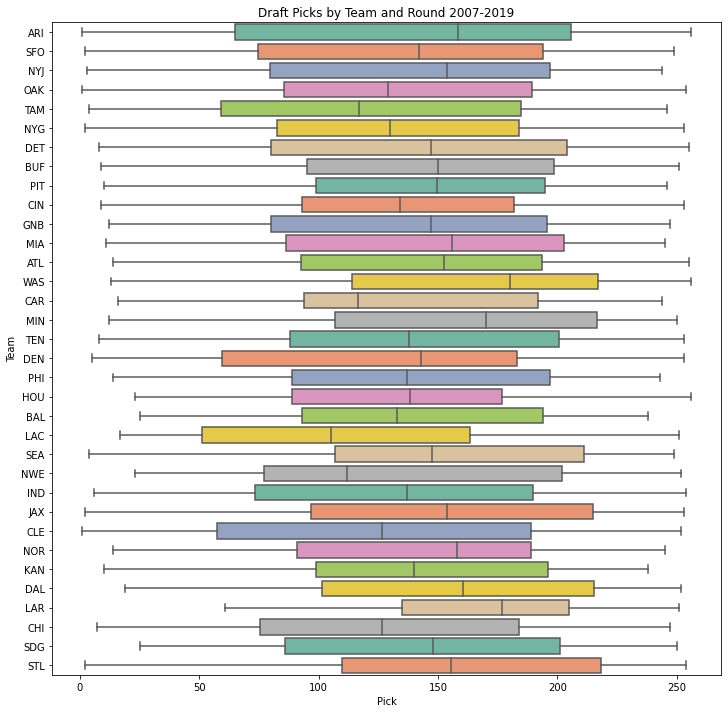

In [ ]:
plt.figure(figsize =(12,12))
sns.boxplot(x="Pick", y="Team", orient="h", palette="Set2", data=combine_college_madden_final)
plt.title("Draft Picks by Team and Round 2007-2019")
plt.show()

Which team has had the most 1st Round Draft picks over this period?

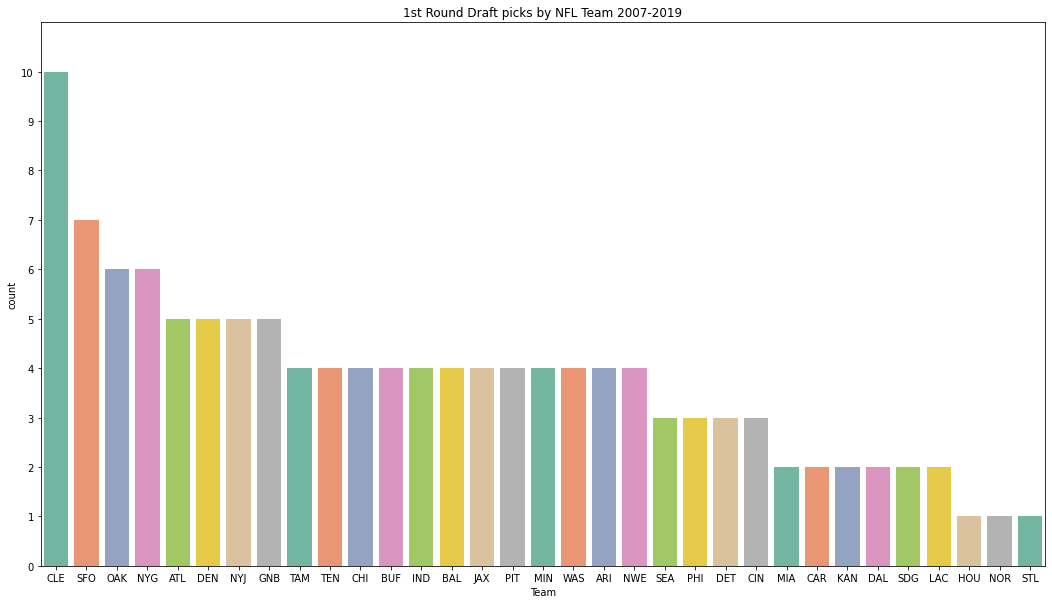

In [ ]:
plot_data = combine_college_madden_final[combine_college_madden_final["Rnd"] == 1]
plt.figure(figsize =(18,10))
sns.countplot(data=plot_data, order = plot_data['Team'].value_counts().index,
              x='Team', palette="Set2")
plt.title("1st Round Draft picks by NFL Team 2007-2019")
plt.ylim([0, 11])
plt.yticks(np.arange(0, 11, 1))
plt.show()

Which positions are most likely to be picked in the 1st Round?

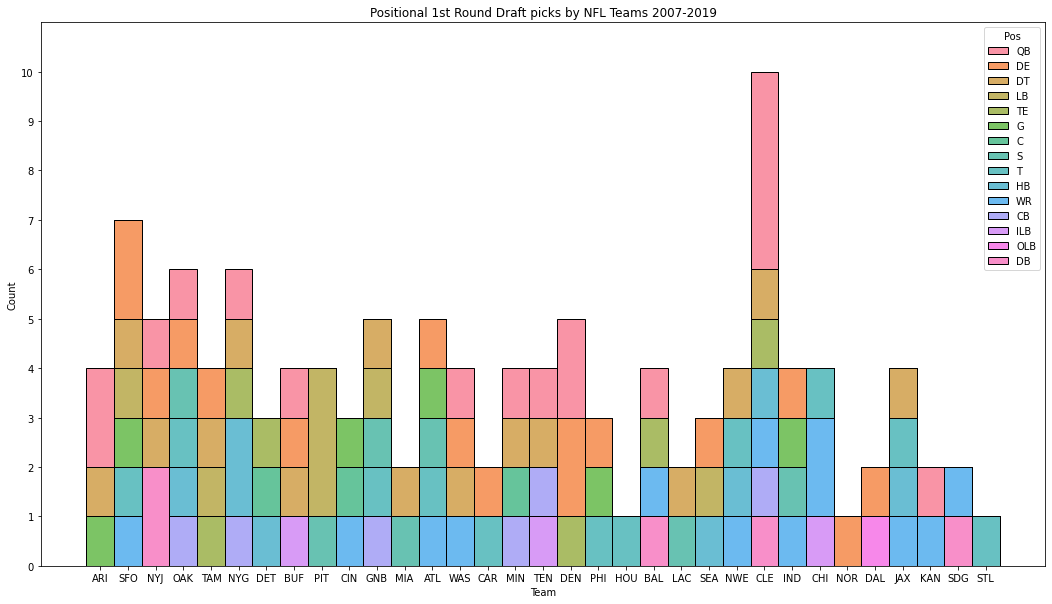

In [ ]:
plt.figure(figsize =(18,10))
sns.histplot(data=plot_data, x="Team", hue="Pos", multiple="stack")
plt.title("Positional 1st Round Draft picks by NFL Teams 2007-2019")
plt.ylim([0, 11])
plt.yticks(np.arange(0, 11, 1))
plt.show()

## EDA of Rookie Player Stats

| Stat Type  | Description                                                     |
|------------|-----------------------------------------------------------------|
| Tm         | NFL team selecting player
|Round       | Round Selected in Draft (1-7)                                   |
| Pick       | Overall Selection in Draft                                      |
| Position   | Position on the field                                           |
| Age        | Age                                                             |
| AP1        | First-team all-pro selections                                   |
| PB         | Pro Bowl Selections                                             |
| St         | Number of years as primary starter for his team at his position |
| CarAV      | Weighted Career Approximate Value  (See Description Below)      |
| DrAV       | AV accumulated for team that drafted this player                |
| G          | Games Played                                                    |
| Cmp        | Passes Completed                                                |
| Att (Pass) | Passes Attempted                                                |
| Yds (Pass) | Yards Gained by Passing                                         |
| TD (Pass)  | Passing Touchdowns                                              |
| Int        | Interceptions thrown                                            |
| Att (Rush) | Rushing attempts 
| Yds (Rush) | Rushing yards 
| TD (Rush)  | Rushing touchdowns
| Rec        | Receptions (Catches)                                            |
| Yds (Rec)  | Receiving Yards                                                 |
| TD (Rec)   | Receiving Touchdowns                                            |
| Solo       | Tackles                                                         |
| Int (Def)  | Defensive Interceptions                                         |
| Sacks      | When a defender tackles the opposition quarterback                     

🏈  At what age do most players declare for the NFL Draft?

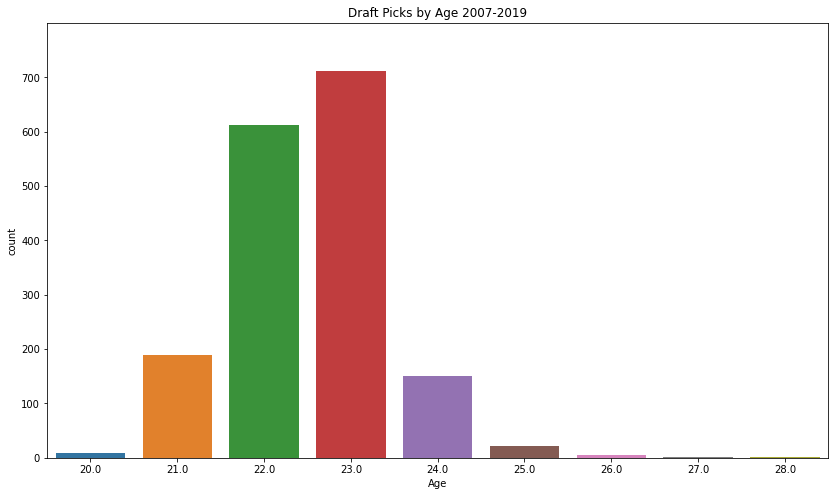

In [ ]:
plt.figure(figsize =(14,8))
sns.countplot(data=combine_college_madden_final,
              x='Age')
plt.title("Draft Picks by Age 2007-2019")
plt.ylim([0,800])
plt.yticks(np.arange(0, 800, 100))
plt.show()


🏈  There are two players who were selected at the age of 28 (as of the 1st of Sept in his draft year)



In [ ]:
combine_college_madden_final[combine_college_madden_final["Age"] == 28]

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position_x,rating_1,position_1,rating_2,position_2,rating_3,position_3,rating_4,position_4,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Name ID Position_y,Position_Team
1787,1,22,CLE,Brandon Weeden,QB,28.0,0,0,1,14.0,11.0,35.0,559.0,965.0,6462.0,31.0,30.0,62.0,200.0,1.0,0.0,-9.0,0.0,NaN,NaN,NaN,Oklahoma St.,2012,Brandon Weeden QB,74,QB,76,QB,74,QB,73,QB,75.5,221.0,9.63,31.75,4.89,NaN,NaN,NaN,NaN,NaN,Brandon Weeden QB,OFF
1993,7,228,JAX,Jeris Pendleton,DT,28.0,0,0,0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,NaN,Ashland,2012,Jeris Pendleton DT,60,DT,64,DT,62,DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEF


🏈  There is one player who was selected at the age of 27 (as of the 1st of Sept in his draft year)

In [ ]:
combine_college_madden_final[combine_college_madden_final["Age"] == 27]

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position_x,rating_1,position_1,rating_2,position_2,rating_3,position_3,rating_4,position_4,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Name ID Position_y,Position_Team
106,4,110,SFO,Mitch Wishnowsky,P,27.0,0,0,0,4.0,4.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,NaN,NaN,Utah,2019,Mitch Wishnowsky P,68,P,NaN,NaN,NaN,NaN,NaN,NaN,74.0,218.0,9.25,31.25,4.63,NaN,32.5,117.0,9.99,9.99,Mitch Wishnowsky P,SPECIAL


🏈  Are older players more likely to be picked in later rounds?

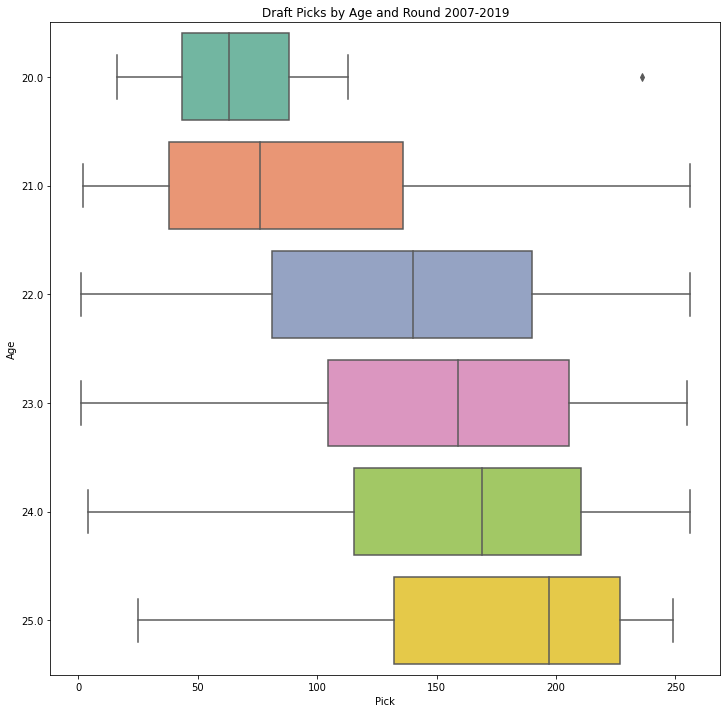

In [ ]:
plt.figure(figsize =(12,12))
sns.boxplot(x="Pick", y="Age", orient="h", palette="Set2", data=combine_college_madden_final[combine_college_madden_final["Age"] < 26])
plt.title("Draft Picks by Age and Round 2007-2019")
plt.show()

🏈  The three players who were selected when older that 26 have been removed.

🏈  Does getting drafted early give you a greater chance of at least one pro bowl selection?

🏈  Pro Bowls are the All-star games for the NFL. It matches the top players of each season in leagues two conferences (American Football Conference (AFC) and  National Football Conference (NFC)) in a once off game. Players are selected based on fan votes as well as their performance in the season

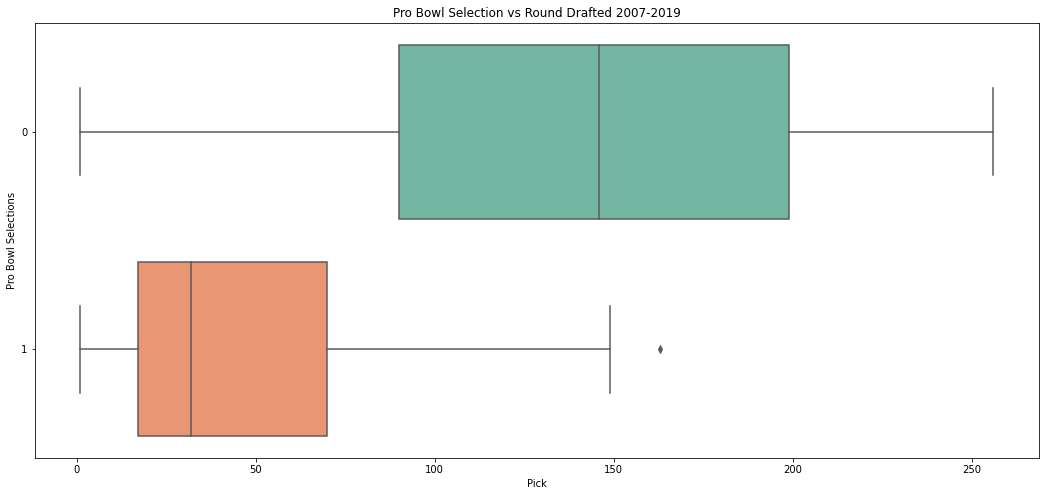

In [ ]:
plt.figure(figsize =(18,8))
sns.boxplot(x="Pick", y="PB", orient="h", palette="Set2", data=combine_college_madden_final[combine_college_madden_final["PB"]<2])
plt.title("Pro Bowl Selection vs Round Drafted 2007-2019")
plt.ylabel("Pro Bowl Selections")
plt.show()

Can the said for All Pro 1st Team selections?

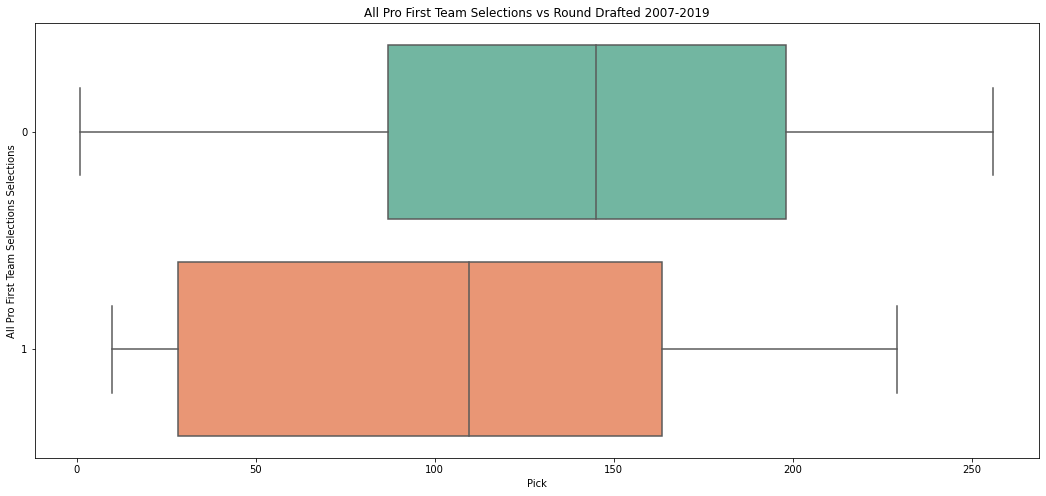

In [ ]:
plt.figure(figsize =(18,8))
sns.boxplot(x="Pick", y="AP1", orient="h", palette="Set2", data=combine_college_madden_final[combine_college_madden_final["AP1"]<2])
plt.title("All Pro First Team Selections vs Round Drafted 2007-2019")
plt.ylabel("All Pro First Team Selections Selections")
plt.show()

🏈  **Approximate Val (AV)**
Approximate Value (AV) method is an attempt to put a single number on the seasonal value of a player at any position from any year. 

Reference for calculation of AV: https://www.pro-football-reference.com/blog/index6b92.html?p=465

🏈 **CarAV-- Weighted Career Approximate Value**.

The career AV is computed by summing
100 percent of the AV of his best season,
95 percent of the AV of his next-best season,
90 percent of the AV of his third-best season,
and so on.

As such it is an attempt to put a single number on the value of a player, regardless of position, for his career to date.

Reference for calculation of AV: https://www.pro-football-reference.com/blog/index6b92.html?p=465 

## EDA of Combine Stats

In [ ]:
name_columns = combine_college_madden_final.copy()
name_columns

,Rnd,Pick,Team,Player,Pos,Age,AP1,PB,St,CarAV,DrAV,G,Cmp,Att (Pass),Yds (Pass),TD (Pass),Int,Att (Rush),Yds (Rush),TD (Rush),Rec,Yds (Rec),TD (Rec),Solo,Int (Def),Sacks,College/Univ,Year,Name ID Position_x,rating_1,position_1,rating_2,position_2,rating_3,position_3,rating_4,position_4,Height (in),Weight (lbs),Hand Size (in),Arm Length (in),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Name ID Position_y,Position_Team
0,1,1,ARI,Kyler Murray,QB,22.0,0,1,2,31.0,31.0,32.0,724.0,1100.0,7693.0,46.0,24.0,226.0,1363.0,15.0,0.0,0.0,0.0,NaN,NaN,NaN,Oklahoma,2019,Kyler Murray QB,73,QB,NaN,NaN,NaN,NaN,NaN,NaN,70.00,207.0,9.50,28.50,9.99,NaN,NaN,NaN,9.99,9.99,Kyler Murray QB,OFF
1,1,2,SFO,Nick Bosa,DE,21.0,0,1,1,13.0,13.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,9.0,Ohio St.,2019,Nick Bosa DE,78,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,266.0,10.75,33.00,4.79,29.0,33.5,116.0,7.10,4.14,Nick Bosa DE,DEF
2,1,3,NYJ,Quinnen Williams,DT,21.0,0,0,2,12.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,NaN,9.5,Alabama,2019,Quinnen Williams DT,80,DT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEF
3,1,4,OAK,Clelin Ferrell,DE,22.0,0,0,2,10.0,10.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,6.5,Clemson,2019,Clelin Ferrell DE,74,DE,NaN,NaN,NaN,NaN,NaN,NaN,76.00,264.0,10.50,34.13,9.99,25.0,NaN,NaN,7.26,4.40,Clelin Ferrell DE,DEF
4,1,5,TAM,Devin White,LB,21.0,0,0,2,23.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,1.0,11.5,LSU,2019,Devin White LB,74,ILB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,7,246,TAM,Kenneth Darby,HB,24.0,0,0,0,4.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,95.0,408.0,2.0,49.0,356.0,1.0,18.0,NaN,NaN,Alabama,2007,Kenneth Darby HB,72,HB,NaN,NaN,66,HB,66,HB,70.38,211.0,9.00,30.50,4.76,19.0,30.0,108.0,4.53,7.25,Kenneth Darby RB,OFF
3219,7,249,STL,Derek Stanley,WR,22.0,0,0,0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,6.0,119.0,1.0,2.0,NaN,NaN,Wisconsin–Whitewater,2007,Derek Stanley WR,NaN,NaN,NaN,NaN,55,WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OFF
3221,7,251,JAX,Chad Nkang,LB,22.0,0,0,0,1.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,NaN,NaN,Elon,2007,Chad Nkang LB,NaN,NaN,66,S,NaN,NaN,NaN,NaN,71.50,220.0,NaN,NaN,4.52,23.0,36.5,118.0,4.34,7.10,Chad Nkang SS,DEF
3223,7,254,OAK,Jonathan Holland,WR,22.0,0,0,0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,NaN,NaN,Louisiana Tech,2007,Jonathan Holland WR,NaN,NaN,NaN,NaN,NaN,NaN,56,WR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OFF


### COMBINE RESULT DISTRIBUTIONS

In [ ]:
height = name_columns.iloc[:, 37]
weight = name_columns.iloc[:, 38]
hand = name_columns.iloc[:, 39]
arm = name_columns.iloc[:, 40]
vert = name_columns.iloc[:, 43]
broad = name_columns.iloc[:, 44]
_yard = name_columns.iloc[:, 41]

Combine Result Distributions (Physical Attributes)

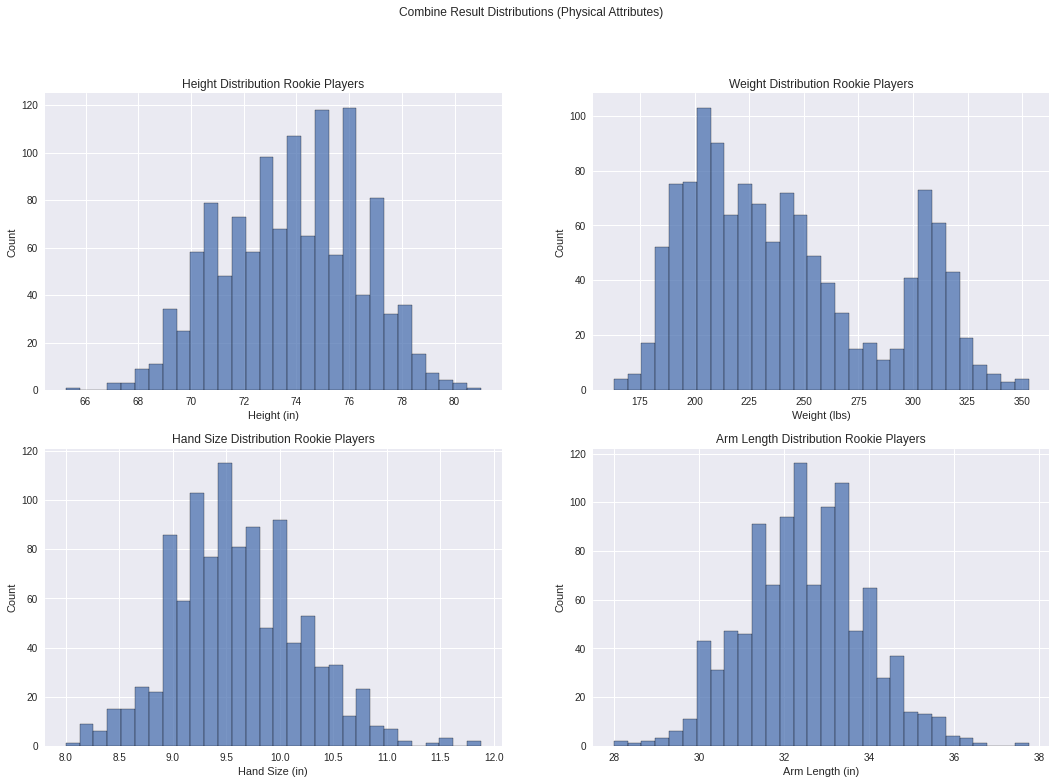

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(18, 12))
plt.suptitle("Combine Result Distributions (Physical Attributes)")

plt.subplot(221)
sns.histplot(data=combine_college_madden_final, x=height, bins=30)
plt.title("Height Distribution Rookie Players")

plt.subplot(222)
sns.histplot(data=combine_college_madden_final, x=weight, bins=30)
plt.title("Weight Distribution Rookie Players")

plt.subplot(223)
sns.histplot(data=combine_college_madden_final, x=hand, bins=30)
plt.title("Hand Size Distribution Rookie Players")

plt.subplot(224)
sns.histplot(data=combine_college_madden_final, x=arm, bins=30)
plt.title("Arm Length Distribution Rookie Players")

plt.show()


Combine Result Distribution (Athletic Feats)

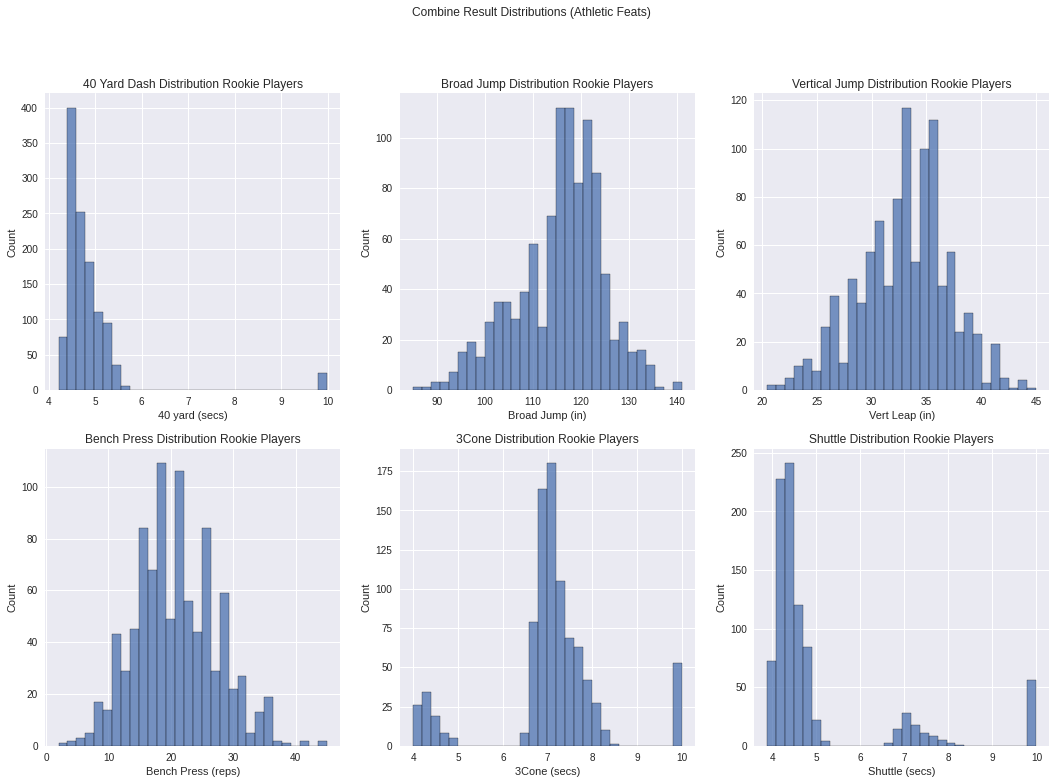

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(18, 12))
plt.suptitle("Combine Result Distributions (Athletic Feats)")

plt.subplot(231)
sns.histplot(data=combine_college_madden_final, x=_yard, bins=30)
plt.title("40 Yard Dash Distribution Rookie Players")
plt.xlabel("40 yard (secs)")

plt.subplot(232)
sns.histplot(data=combine_college_madden_final, x=broad, bins=30)
plt.title("Broad Jump Distribution Rookie Players")

plt.subplot(233)
sns.histplot(data=combine_college_madden_final, x=vert, bins=30)
plt.title("Vertical Jump Distribution Rookie Players")

plt.subplot(234)
sns.histplot(data=combine_college_madden_final, x="Bench Press", bins=30)
plt.title("Bench Press Distribution Rookie Players")
plt.xlabel("Bench Press (reps)")

plt.subplot(235)
sns.histplot(data=combine_college_madden_final, x="3Cone", bins=30)
plt.title("3Cone Distribution Rookie Players")
plt.xlabel("3Cone (secs)")

plt.subplot(236)
sns.histplot(data=combine_college_madden_final, x="Shuttle", bins=30)
plt.title("Shuttle Distribution Rookie Players")
plt.xlabel("Shuttle (secs)")
plt.show()

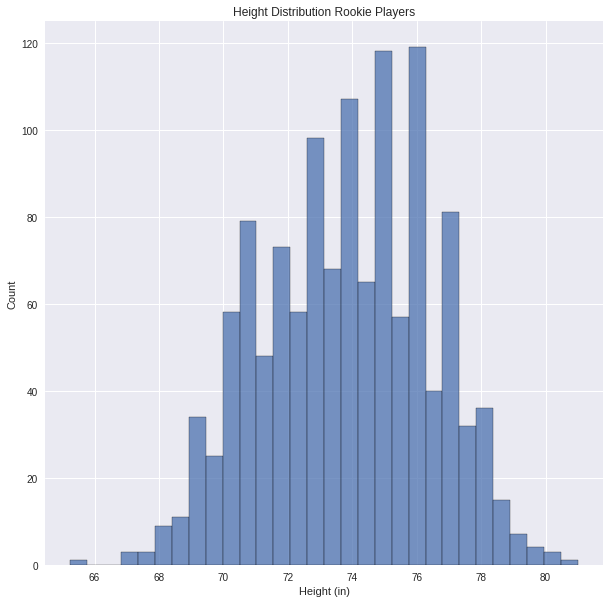

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=combine_college_madden_final, x=height, bins=30)
plt.title("Height Distribution Rookie Players")
plt.show()

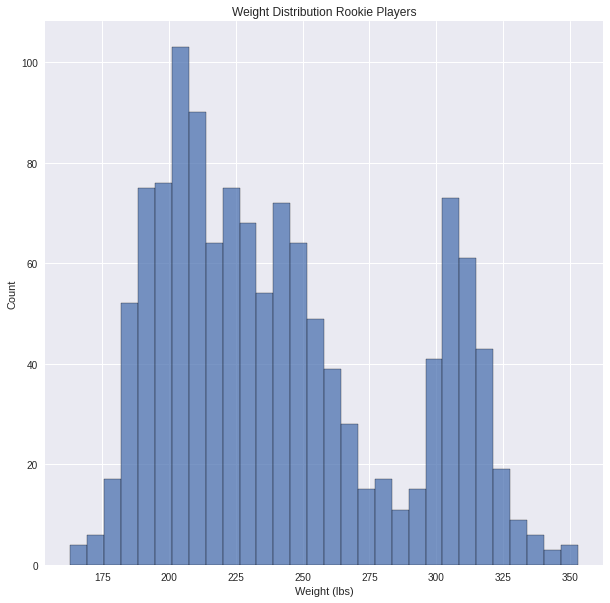

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=combine_college_madden_final, x=weight, bins=30)
plt.title("Weight Distribution Rookie Players")
plt.show()

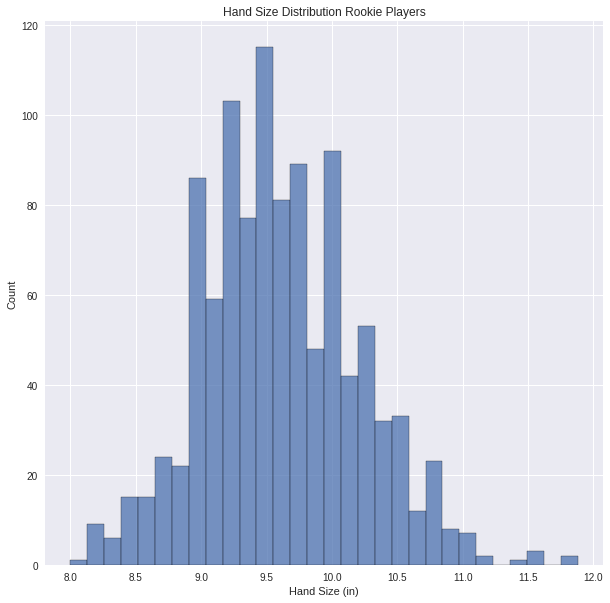

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=combine_college_madden_final, x=hand, bins=30)
plt.title("Hand Size Distribution Rookie Players")
plt.show()

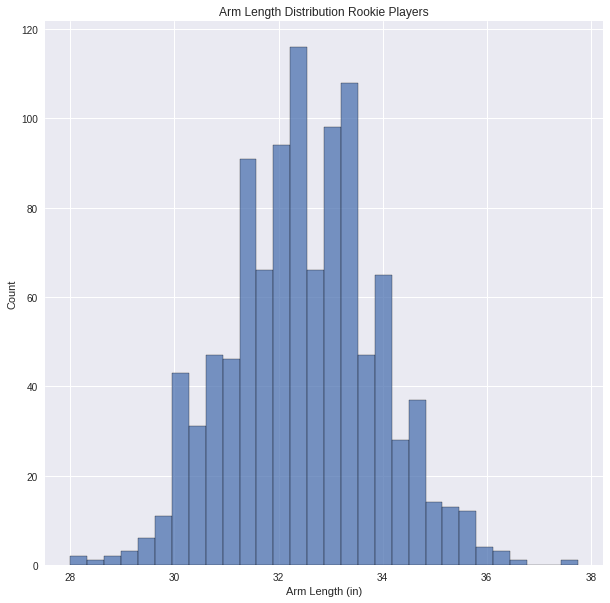

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=combine_college_madden_final, x=arm, bins=30)
plt.title("Arm Length Distribution Rookie Players")
plt.show()

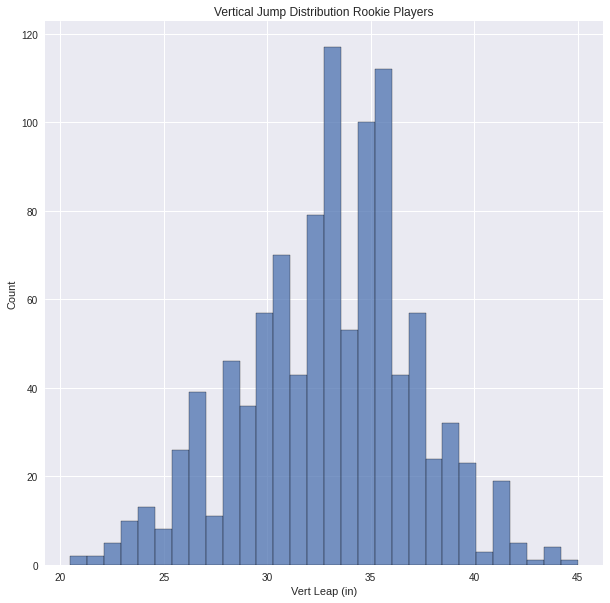

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=combine_college_madden_final, x=vert, bins=30)
plt.title("Vertical Jump Distribution Rookie Players")
plt.show()

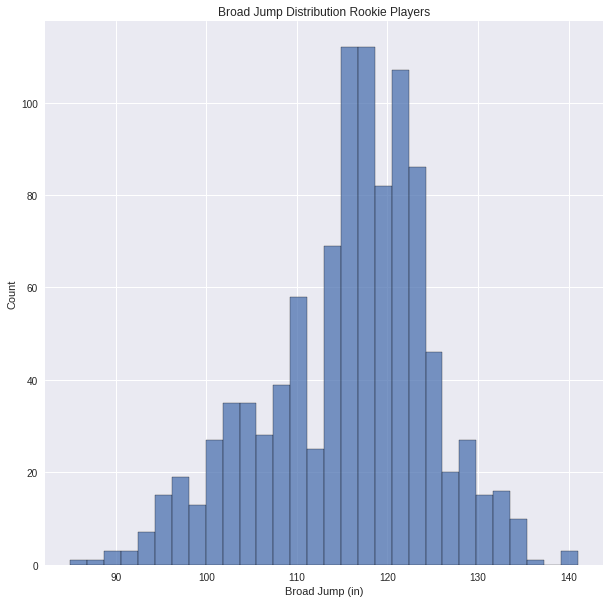

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=combine_college_madden_final, x=broad, bins=30)
plt.title("Broad Jump Distribution Rookie Players")
plt.show()

# Exporting and Saving Final CSV

In [ ]:
combine_college_madden_final.to_csv(r'C:\Users\Admin\Desktop\Final_NFL.csv', index=False)